# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

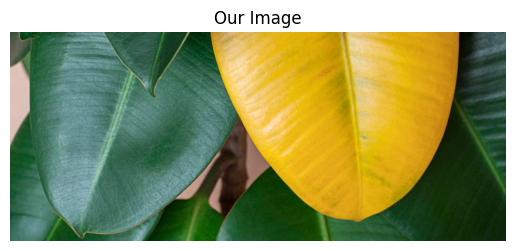

In [44]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



(np.float64(-0.5), np.float64(426.5), np.float64(639.5), np.float64(-0.5))

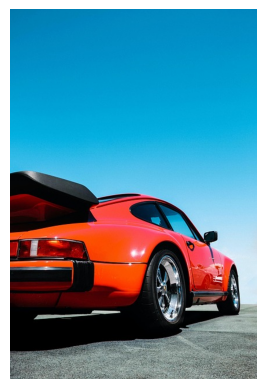

In [45]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image ="""/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAKAAasDASIAAhEBAxEB/8QAHgAAAQQDAQEBAAAAAAAAAAAAAgABAwQFBgcICQr/xABVEAABAwIEBAMFBAYIAwUECQUBAgMRAAQFEiExBhNBUQciYQgUcYGRMkKhsRUjUsHR8AkWJDNicpLhgqLxF0NTssIYJZOjNDVEVGSDs8PTJkVVY6T/xAAdAQACAgMBAQEAAAAAAAAAAAAAAQIDBAUGBwgJ/8QASBEAAQMCBAMECAMFBgQFBQAAAQACEQMEBRIhMQYTQVFhcaEHFCKBkbHB0TLh8BUjQlJiFjNygpKiQ1Oy8Qg0g5PSJETD0+L/2gAMAwEAAhEDEQA/AOOBHzowI2FEBoNKIJEgd697hfKOZCEnc08QAd6MAE7aU+Q66bVINUSVHGtElJNGECYM0QQneSPnTDYUS4BCEdd/SKIIjWdjvRROvang7VJQzIMvWadIMdKIpk04B60KJMoQDsdqeBTxHWn0AmhIlMADoKeNO9OBvpT5Se0TQlKGJ6608GP9qJIJPXSn1jTemASlKGO8gelKO23wo46wKQSoE5iNNKeQpSgAHQ0caf7UjMnQRTxI2/GnkKRKYAetPEadt6IJMaD1p8unl796kGAKMoCI0NPl2+FEEnUxThB36/GnlCJTZTPf4UiiDsaPKQYmnAg7aU9EpUeUj1p40gD1owBEntT5YNGiRKA6SBvTkaSIPejg9SaYSOnwpSlKEDWBpG9OEiNev50RGv5RSg9aESgj85ou0g08dtfnSidOtCUpidZFPHrpT5Qd6QGtCJQx3GtPl02ou80iPWPnQlKHSYB2pACP4U5HoZpZSBmiDQiUxEGlESKOIPxpsoOojWiEShpR0g0QA6QRSI060IlBHpSjWRrRETqJ1pAHpQnKEDTagIOx61LEH4UxTGwk05QCo4E6Uso209aPKZmiiImiU5UQAjU9NdKeDpGlHl6mkAZ1pIlRlIKtzrQEAnUfhUxTAInank9hQnmhYbsSNqJIJ+dEEmOtFlmqAFnFyYDTXr6UspkamjjbWnA+fSmq8yb7000EdfwogNd6eJkgUKKGNKKKcAaSaeOtOEpQxOnWKfckUSU6ATT+lMNlKUM+vxpATRwCaUTsdakGdqUphSoiB896IJgfZqQbCjKGD2kU+UjcUQT3A1p8sgEyalCUoQnXQjtTjrG+1EE+U6gTRRrMGiUpUYTA3MfHSnIMQDoKPfQACO4pwkkwRNCUoYnWZHekUg7bmiiNYmn1iNKUpShSIMiKLUdNKeOkfOnjSZ1pJSgjXb8KePnRACZj8KQ3mhKU2TSZ3pR1mJ/OnjTQ08bRRCUpiB0n6UiFRM/Snn0pDsJ+lOEJvWkR6U+9KDrr8aAESmiBMiaUH+NP12pbGCBQiUoJNIHUd6ffXXanHcRHSmlKHprtT69N6fpsKQ3GkGhCYfGkNqffrTwNzQhDtrJE03Tv8RRQd5FPH+9CEMGdqXpvTwPgKQg9KESmgA/Kl10+NP8ADal60QhDEGlAI160XSaRAjrvShEod6QiJkU4SIzRTgb6TFOEShpdfhRRrOlPShEoIpR3mi0mfzpss7xRCCVikpI6U4HSngHcCiAM6DbrVCzCUwA3/GnCdNaLLrSCep3qQaSlKGO1FlO3WiCdYkU4RPT1qYZCjmQhOs0omjKIG8imCeh/A1ICEpQkZelPlMSQTpRhOoAmdtetEBlMSKaUqMJkmdx37U4T6a0eQxB37U6QNzFCRKbIOgJ6jWlHTSjygQRttTwQOmppSoyhy+g9aePNEDenj+FPBilKUoQIHSDtSPqN6OIgdqUaECKEpQAT0MDeigRsaQ16UQSddaEEoYBOlKNelHHppSAO9OEpTRvFOO0HSkB1ilHxppJd9JpR84pwIG3rrSgkfvoQmjee1IiPjT/WnAoRKbXYCKR20j508emnx2p4PahKUMdwNaXwospjuetLptQiUMTMikN96MJ6TS9NdfShKUMHYmnAkdaf5U+o0jahEoYG1LKNqITGop9jrQkgiQIG9KBtFHGv2dKRHfbahEoDM08dYJotZj8abLpqAfSiEIY13EUgNxtrRhJ7Ugn/AHpwiUBSaUJ260WUx0GtIgyZBpJyhA7GSaQEdYmi33EmkRBmBp+FCJQgdaQ+lFBnaTS7xr60JJiNdO31pgOkb0Y9dYpwCTBFOESgidgDTFCT1j5UZA0OkU+U96SJWJSnWR0oojQxrUgTAFPkA0AmoNaAsrMownTQnUfSiyaan60eXT8p7UUa5TtUpSlRlMmB0NPlhQyzpRkaTJ7aCkR/tRKjKDIQmT3pynUyNKMAikO8ad6UolDAjTpt2mnIk7bUUDcinAHbrQlKCNd4+VOASaKB2+dOB6fGhKUMGNqeNIJogAaRHSOlOEpQwdiflT+naigbRSAAiTFEJIfiSacDsBBp47H8KWw/maaJlMdO/enIg7ad6eNjFKOkUJSmpRHlk6fhRADX0pERqdZoRKaNqRA21PU0Rp411G9CUoYAkn40iJ1B0NFttSiBMGhEocp07mJp06b6UUdt+8Uo32pwlKEgnQfKnj6g08aT12p+k9KISlCBJ1kUsskCjiTt0ilvoYIpwiUBGmhp4IEiigTuKQH4b6UQiUMb9BTkSac9CfjrTxRCUoQDvrr6Ut9z1ooPQUo7H1+NCJlME6namG0/QUYGux9KUftCI9KaUoYMaA6UiN6IA/jTZRMUIlMQNdKRGuv40RB7Gm3760IlNBVoOtLLB/OiPaNaQjUH5fGkiUEbaU8fKnidNaRn11ppyhUkTJ2FOBJIp8ukGnCZnSPjSSmEwTMA9aW560WXbePhSyxsTP5U0swQxrqdKXl6qoynr1mmAMUIBlY8DQSNafrIowBHwpRGtVLJzIYpwJ+lOBHxp4nQxRCUoSNacp02j40UQNKWWdJinCUoIAp/ht3ogNdtqePlNEIlBGvWn13ogmdyKQREn99OEpTQZiNKaJOtGU9/zpwj1BpwiUGXoBTxrHej0+EelKDprRCUoQDvlpyJM08bk9afLpJppShI21po6nvvUkfGl6UQlKGPQUo6DeigbilHTWO9EIlMAPnSielP8o+FOBO1CJTR0IpAbR0pwD3ielOBrt9aEpQEeh3p46HtGlFG/fekO800Sm+HSl2A+dEQYkRvSykaTQlKGPX60gCD8KPKYmnjU6a+tCUhAB1inCZ0/AU8ebWnywNvWhLMmA10mmKTtuaMpOkHQ/nT5dDEA/nQlmUcHWKeIGid6KNxrrSjT8qEZkITpB60gJ16UYBFLKZ01FJGZDGtKImOtHER66UgO2hoSzQgT2FIAzRwd4pZY600syHfeINKI20osvQbUso2nekiUBBIPekEj02o47zpSIg0SnKAJA+fWnykaKEjvRgT0mllGogyKJSzIInfekEnvRwYginCSAZ3FNGZBHptTgT/ABiiIgQTvThBjsKSjKDLHShyipSDMdfWlHx+lNErGhMinAgnrRpTpvSy6SQZqELLlBl0OpogDtRAbCKKNJn0pwlKjKYME0+mmn1o4iO1KNNt6IRKCCdiDSA7HejgTp86WXTfanCUoIOnenInSfpRR1E08EHQiiEShgzp0paaknSNiKMgwIpo6fz86aJTAGfh3pQfpvRRpv8AjTxGkGDQlKADdQ170RCo2M0UCYM0gnTQA0JShg9qaCRvpG00YTp1mnAgzJ+tCUhBEQTr1p4EydJogiD1p8sHUnWhLMgymNRPzpRpRZQTJp8mvX50IzIcqtBMUxToOw9KkjeKUQKEsyApmOvrTwR6d5pwI3ooBGms0kFyGN9flTgT1ogkRHfSkB2nWiVAlCB0pa+tHB7UxTGmxoRKGNZk0+XrRDUaSacCNQSZolKUOUx60hPSiIg5RqafKNwDQiUA16Uon1owjoR9aUeh2g0JSg+JNIAn51JkgidKRSTMTprRCJCGJ0BA7U2SNZo8qToNRSKAIgabR2oRKAJJOXenKVRHQUeUQAJp43MmhLMowDMx6UsqhvG/apcuvWKbSfhrS8UZpQZTGUEn40huR9aMDb8KaOh1polDlKZHb1pZVaAbdzUiQdtdNqQAEb0JZkGWNzNFCyCDGnajIAiBTR1oSzIYOonX5UoVqCaOKQFEJZkJTO9CUq7T6zUhGvxpUTCJKxwTrP1pZdaIJ121+FFk6b0AQswuhR5Rr3pwAJIP+9GUkamny9RTSzKONI7UiDtFSZZ6aUspCpOk9KEsyCDvvSg/s0cHWBTwSNqEZlGEzuNelIDUkmKkA76n4UgDvt0oSzIAmftdacJ2GmtGB3FKOv4Uki5BGugnXtSImYOlSZY1pgnWD9KEsyHzEwflTgRR5TMemlIgDp0oSJQDeYp4UJG9EEnsdOlLKRvNCCUJnQ0gkUZECI1mkBQlKGDvSiN50osusR/tRZdND6GhKVGUk/OlB9RUgSTG89opspka/OhGZCRoetIDTfajyRtoKRQYGtG6JQgGPWnyEaTtR5emtKCUwVag70tUpUZBOk/jT6jTMRUhTJkaU2WTPx+tPdGZCEj50+8kafCnCSO9PlA1MamiEiUMaaaetPBmKIRrp0k0o9fhQlKDKBO8dqID+HeijQmkZmiEpQwTrrSy9O9FHrSgzGtEIlNlAT8NKYiYBNFl6U8dIohKU2uw69aUR8RTkdaQB3mmiUMdDTxuaKO1KO4pJSgInSTSymRNGRNKI+FCMyEADSlHWij19aUU0Sh19TRRRAH19B3pQexoSlDE6mlTwafL6fKkhDHamy0eXrTBIOs0SESqJTprvRECYAj5UQT007UQTp9nehZEqMJkH+ZpASTrUgSCfhThIBMD50SlKiKRt0p46ipSlP7P8KYAiBv+VCMyjCZO5pBIOpM1JGoMb670+UTEfOlKUqKBppB3pwnXQ71LCRrFJKR2pozdVEEyIFPl0kmI71JAJ1PpTxpAoKRco8npFIInfTSjG/pSiRt0o1RmQkAT0+NNlBjvE1IQNj9aWwEChLMgKZiJmnyjpRx6a0oNCWZAAIgAelIJA1jbWjMdDSjXShEoQNZmlFFA36fGiAme9CUoI0melKPoKICnyjrRCJhBA3gzSCdZn5RRaUoncUIlMBrSgdaedBTwN6aUoQO9KiA7U8T0oRKGKbLRR6RT5esUJShg/ClG2tHGu1KB6UIlDlEfGlHeiidRSIFCJQx3pRO+9ERGv76W1CEMDoNDSA1+VFHanG2m/ehEoemlKPx1otPhSgfKhJDFPRZZ6GDS2mhCCO9OU6aGaMwf53pgB1kHrNCJQx16b0o7DaiyjbfTanjff5UIlBAPWKLLrtRRlzETv0FLSJ2NCUpgD86WXtOoo4joJFKNfMKilKGOnTamyE6gaVIewiR60JSJ1SfkaNkSqgR126aU4SQNKOOutLKKcK0uUeWNaIiiCe1LLvNEJTKGINKNN6IAAT6UgBTRKEAHp6Uo+FFlnpSgTrRCJQRp0pwnqDRZRvpJpQNpohEoQIpAaATRwI/jSjfSiEShiR2p4Mx+NOBJp4ESKISlABuPpTkGijSTr6Uo6TRCEOUTMHtTxrNPE6xRZdJka04SlR7elKDpRxM0o7UoTQ/KlH4dqPLrJpQAdzrThKUEAdKRE0ZA0M0gAOlKEIdD6Uo6j6URTrAk9qWTSiEIY1jUUiBtNGABpOg6UgncdKIRKCPnSjSpMsjfT0pwBPoaISlRhIPpNKNhUmRI9PhSy6z2pwiUBEyI60o00Mz0qQJAJP7utME6bUQlmQZQRt/tT/eI2Ioykb96QTtNKESgAn/anKdSDRCDpT5QRBohGZRADfWniB/CpAkDSdKWUa6HQU4SzKMjQRrpT5ep1o/QmKfL/M0QiVGEnYnp0pynpMGjIpR01ohEqPKdR19afJ19Zo4B7U5E/CiEZkAEHca0gAQOvSpAKWWd9xtRCUqPKDqTHanAI0IETvRx86ciBtRCUoY3iny9J+dFl1/OnA7daISlR5Z0Ex+dLKe5qTKRoJpg2giT+VLKjMqkR86QAGpo8s6KJpwBMkb9KFbKjIGkGRFIAjoRUmQfSkUxtA+FSRKjjqN6Ua7CpIiJ1pECdN6ESowNO3zpQOtSQAMvpQxAiaE5QwY0M0gB30owmJB+E0o6zINCUoMtLKZntUhQNppZdDJ70IzII20kzSCdOtHAinA67dhQjMo8sT6ingbQNKkgzIpvj+VCUyhy6jWR0pZT6fKjiemlPlnoIoSLlGE6zpThv1GtFExNPlAEa6GhGZDl19B6U0E7ijyx3+lISB21oSlBEbU4E6kRpRwNiKUdutCJQRJ0/wClLL+I71JH1psvehGZDCjtSyyY0owOgpadooRKCNYJinjTXr3oiADvS+dCUpoEbU0TG+vWjjXTpSA2/KhEoIHz708RrRQNCTJ2pQPXWhKUASJ119aciQQJNHETFNA+XehEoYGg+lOUgUUT00pa9aESggTB1p41iaIDvSKaESh300pdYijynekU6z+6hKUI7UoAHejy9jTREa60JShy6x+dPlB2GkU+UzRZYMSYiIoRKCNYGvb0pBI1I/OjInT50gJ/MTQlmQwdz19d6cD4eoowJ1AGlPlmdxQlmQZRHSTTxGulHl1ingTqdqFGVHBIB7ikEiP96kKRoPnShHVIoQHQqmX0pZe4ijgqmllPQ7UK3MgykilEiIosunwpFMbSaE5QkAUxH8aMJJ0017U+UnpQiVGUwYpssmpIO9LKeunyoRKAgdacAHWKLLr+dIpjXehEoY9KUaUWUkSBPxpRrpQiUMdKUDeaMJnTQfxpFBNCJQZQe9PlHaiygfCnA12oSlDl/wClIJ+lFEjUmll11NCMyHLS0679DRwY26a0omTQo5kITpIA+Z3pQNOkUWX404T6/jQjMFHAA6UQAjUCiyQdzT8uSPrQjMEAG8AetNEbVJl3ApwI0HShLMotjMU5CSRAownSZ1oiD1oRnUUCYnTanjr06UWQmJPWnybQetCMyDID0pQn1n41IE9dTpNLJJA70KMoCkRSgdKkgR86RSRt+NCMyjICdOnakBO4EVIEaSRT5egoRmUWXSCKfKNjNSQB9aRSO5M7UIkqPKntT5Y6GpCNZIM02Q7zQlKDKTFOEyCB0osonWZnpRQOk0JSggSCdQaQRB16UYSY3mkExIjfpQiUAQJ+NPlkRHzo8oEfWnAkUIlRlMCAZ110p8muoBFHEUgIoSlDliQAKQT22oz2mnyknfehEoMv59tqePTXeiykakEU+2p/3oSlAR1P4Usp7ijKaUChEqtytJFNEb7VKEnYa0svpQpZp3URRQwZiKny6imKY37daE8yiy6700K7VMECYjWkU9zpQjMoSkGnI6jpUgQJ2E705Tp0oRmUOUTM0iknWN+lS5BSCJ0nU9aE8yjyydKYJ6ampACPtflTkJmOlCM3RRlOlOEHejCNI/2pwJGvwoSlAESJpssabDvU2UwKaCYoSzKPLO/40suh02qTLG2lORpHShEqIJMQBPrT5R1NGEgTrTjvQiVHkHQ0soHrUgAjUa08d+tCUqIpM/PpT5dSIo4pR6UJygCd5/OllnSNJnSjA+HypwNZNCUqPJtHSllnT61IUxrTwB2FCJUWWdpFPkmNOlSQOtIjTUfhQiUGUjWdqWVJO+ho41/Kll17UIlAB0pQOtSQBEGlE696EkBGu3xpZYVIijCRA+FIpE7xQnKCOu1PlkA7zRddNaRSNtfWhKUGWeu1PGkz8aOCTEGlEHWhEoI9PpSy+sUZGvaaWWZyihEoAB86fKI3/wBqON5pEGB0ka6UIlBB79KcJ+tEUnoelPl6j86EpQECTr12pCdTOsa0aQfx7U5A0ABmhEoANDrpSjrrRhJ3Ap8og6zNCSHLoYOgFOUye3X40YAEEHX0pAaDYnvHWhIlBlI3p8vrRhMaRPypQobIn1oTVeCRA60oO2tSAEgdNKUSdaEZlHlA7x+VNl9KlKQANKbKTqTQgFRAajSnAPWjKfhFIADWNKE5QQCZpikfCpI70iBQgFRx2HzpEaE99KkyyTTZd4jvQiUEdDSyifwowmTO89aRSBoPyoTlBB70o6VJl7gEillGwoSlBH1pZevbvUmWe3amAHahEoADvpPrTwJgjTpRZddBT5dhO1CJQRImmifU6VKQI0HypZRQlKjyjsYp47fOjyifU0gmfKTrQiVHlA0pwnpM0eUDQU8djsKESospPUGaeOlSZRoSKYIihEoIM79KWWfWpSnrA9aaND+VCJUcGP5iniNT0qTKDuBtSgCSIHShEqPLG80+UgbegqTKddqWSBAB07UIUYT8dfzpZRpP0qQpEQYPw705TrtrQiVERA36dqRGhgVIUfCaLIDAiaEgVFlAj8JpATIMVIRoRO004SSCDGp10oTURQRqdhSCTGgPy2qXIOpgUsoIB2+NCJUYST8+wpBMbDUVKUjeQD0mllgwCJ9KEKEJAPYfWiKY6CpMk6kADtTkbebbb1oQoYnpA2+VIATqdKmyAq123kdKQQI9PhQhRAQYIOtEEgHTqPrUgSehEfupBAgdI1EihJR5I0Gh+FEEAaVIGxAPfUwKLLrsFdvShOCosqZ0FLKDrHWdtKscuB9kU6EQCRlB6f8ASiU8p2UBSUnLGvSkWxJlOvpNWVITAkQANqItq+7lj40symKZWOyyZ+Zp8g2NTBuY2+e5pZNCABr601RqoCkdCafLBAGtS5RGsD91IJ9PqaEaqDKd+1OU7aa7CpcmYap9PnSyxGlCFDEDWNKYpB6Cp8kdPxpo16ydqESoSnYRSgAxGtThJI1GtCU9ToD0nWhEqLKOg3p8mh6/DSpQnXakU7yNu9CJUQSY101pZYOh+cVLlMgAfhNIJ2A3j8KESoshJOX5zSCNNdxUuRQMgafGnyzsnbrrQmoskxp8aLlnXbajCNPsx39acJ6yNqEaqLKrtqJ6RTBCu8wdamykgkp23pZAdR1j50IURRuI170ij/pUpTtKYJ+tPkhIzA/WhPdRBJI16ntSyEb/AI1MUEHIQSImlyyZEEUIhQhvQaf7U5SJ+PrtUpQANo7fCnDR1IA09aEQoCB307f7U5R0jrrUwQdSRpEbnvS5WsnXeaE4KiyaxGuhPSlkgxlMnep0NkjVP8aQbJjKiCd9elEphpUOTQmJJ9adKCdhPXapuUfsmPl0M6U4bzapTPz236UpTyFVynykAad5p+XCuwI6VYKQTJj6705b1OmhEnWjMnkVblkaDqOnX50/KOwn1NWOWVCFJGsmJpw0AqSQCIiTSzJimVWCFToDrpETSygRlSQQdhVoNz5dZSDOv76QQQPvE9iekb/WjMnyyqpTqABB6ab0/LA1B37VZDRAlQAnWdxFLIBIKpnpO/rRmSFMlQcswCdj1PSmyd0iCJANWcgj7JJOw7d6ZKJ1ykEQI2mjMpcuFXAiNpHbpSDY1EzvJPWrGQgkEp0313osk/didYn+f5FGZHLKrZARr+P8/CnSlQ7mOw3qxyukGCDI706UEkgozAiZilmRyyVAloq13/jThuQDrCj86nDZOkQQZ1FJTZUmAU+kUsynylClKhEkfGZNFyjGZQMTVlLcahBGk69vXtTpbEJVB+v4Ui9TFJQZAoSE6fDpRBoggEFOmgOn0qdTYOpSQBpM7EVJyvtAAkkiNd6gXqwUZVbJkWUK3jcH8BRFpKjJCPrFWOWAR3OulJSFgkIGnwNRD5VhpQFj+QeiQegjan5EZklPpvNXEtIEKAHr3+FOloJIiNTO9T5ip5EKipnL5lCCKYtgpMo7xpV7lARA8wmAe9CWQACo6d+sVIPUDQVEsg6BMnQzNNyc0xGk9avqaTmScpIIjXp61GG0yMidd9T9aeeVE0IVTliJgaRuYpBvUDXuRtFXFIQpQSQd/np+VItnVKhoAeuu+tGdLkqjyoE5TH402RWmdMCr4bHWNdaDlAJgjSBt00ph6RokKpygDMaq/Gm5Ss0HfqO1XAganKB26zSDY0IHr8KMyiaSplvNoBpRBsA/ZmdJ6fCrJbMGU6KMT2o8gncHMPgIozpijKpBkyPKYnQU4aJBBEjermUEEZYgAkxqDQhtMTmOUdY3pZ0+Sq6UE6lAMHSiLZggJj51Y5SSYBAMzrRhvoUdI2pZ1MUlT5R1SZiKSWQRtCjoAP59Ku5EqB0Hl2k6CnUhJ84ywOhETpQXqXICpBoDUJJjSPWg5RUZCZ/k1fDWbcDMdCB/OtMhgKkK0zdQNfSgVEjQlVUNBRg6qH40kteUnTTWN9KuBjKkDTpoB9Zp0tI0gnQDX8tKjzOxTFBVEsq+0UgxvOwjpTcoJChB0npvVwNiQognYgAafCiLYgkEDSRS5iYoBUS2SgSBMdJ0pw1urIZ11+dXSzqACqdIIG1Py0pCQUEHY9etLmKQodqp8nUJToesUixmTIQCAdddPxq4GwHDoD89QaJLScsETBPTpRzFIUOipBqZTBGsAzvRlkkgkFIP1q5ykf8Ah69ppBtMgRtv3qPMUxQVJLRK9UkAbAUSWjKQUDTc9Ktpa10BTOnqaYta+XQkgE9v50o5iBRhVeVKQkpMHWBRBpR2BynvsKtcvyjy6du9INRl11BGp1mlzFMUlVS0CIMafgOtEbciAR0gSCNat5OpET+G5puWkk6Edj3pZymKIKphlSREDzTp3mj93EpBRO1WkpSRmj4T+/6UwbkQI7fAijOUCgFU5OUZjoVCNtvjT8rScpVprP7qt5Y+0nQ6fKmLYC4667xQHlBohVVNJhRjcwCT6b03J7iTr8xVrlJTmGQafhT5QNQkBMxOpiO9AeUuSCqhaJHcfHakETKggaaTPr2q2pvpAP8A1pKbiARG34UZ0cmFWDZJEkA7mDpT8sBRSpPTp0NWiiSJTHrG2lJKAADljuKA8hPlQqwZSBomTrNGhlIIGUj8KnhI8qvjE604QJylGwkGolxUxTCiDUCCAATpvI+NHlIMlMkmpg3qUQNNv4UXLSUjQfGajKtFOFAlvKPs+nwFPykkzlA9CTVkI/4ok0+QDrHpFLMrW01X5eoGU67aU2QnQSAqNqs5EgAgkRqaQRGxkSDTzKOToqhbgGRsBqBrQhogkFJSB1FXeUrKAZkaaHrTcokASJ/KnmUOSqRZOYnLEdtzrQ8okka69jM1d5QzESI/mKYtHTL1melMOUDQ6qmWpAlOm2vX50ghSdUjU7gHQ+lXS1lSTr6+tNygmFag760ZkciFULYUTLZ0/ZO38/uoC1AGZI21MbVd5RUkgEdZHx7U3JkbHuYFPOkaKp8qTHLEmJO3wH404byq0Gg02iIq5y84EdddD+c0gycwIPTUnYUZ5RyFSLUDPl27jSnLIJjIQCPtfDWrZaCSdcojeZpi2qVGI2kd6M6RoqolrMoqyGYFFyyTBGp19BVosxJESNYnSkWDEHVJEeg7iKWaUCjoq4aMHykkHt6dKIoGciDO/wDP0qxyk6aq01kU/JTmiVCBA1mlmVgoqsGQSNkncRpTllaplOp0NWks5DlB8qvMfX4/jS5RzGEKgncfGlmUhR7VU5QyEKgT5Qe1IM5QCEkfOrZZHlOYgT86LkkaqJ6TAHyoLk+TGyqFsEApB01APWmDSvLKNIjTpVnkhWiiRG3r/Cj5QA2Pl0mjMmKSplowCUmTpMRRBrLvpEz009atlskazI0jSmDKdSTBPfr60sylylW5ZSrUEmD/ANTTBs5RCT29athoqCQdtwTsfWiLAJEEH5UZk+UVULZgEfeMzpvThCtSlMpnWrKWgDm0M9AKINyYB2OumwoLlIUlVDRziEDvrTcsqEBM5tQY6VaDYzAqOp1p+WPsCYggUsyOWqxaPVBIG4+VMG1BJCRrprVpSIMDMSOw1pBsHQ6x9B9KJT5SrcrUnLHxpcqBEROpq1ygRmgjSTp0pctUTKiY6jUUpQKarJQCfKkjWdt/jRKaIGWCdZ0+NWC0CJO22lINAEfahInTtRKkKarlrY5SqNu4pi1IBgCP4datBsiI2A7daYtGIBn0AiaMyOWq5bPlBGx2kaUJaUZ0J06gTVosADSIjtsJpuVCQU96MyXLVXlKI2k9KJTYKgNR6dutWA1IzAkTB26U5aUZQfj3ijMlyiqvLPlKdRqdt6flHLGSeo+X5VY5Q1CpEU4ROvX6waJT5arlsqghJgGdKSW5MqSAKs8uDBk9R9KcNEbEaiJijMjllVkoUT5hoJ33o0oVOqVEJPTaKnLQiFA76mi5OoI77aTRmUhShQJQdISNZ26GiDZKDKdANjvUyWk5YE+s60aWgQPLMaRHTpUZVjaSrpSJBjr9mi5K+h/Cpy1pER6d6LKn1HprSLlMUlV5YnRIjfvT8vJIIiBRjrprFGDIJMmOh6U5UA0FQ8lWhA2n+Ypi3ImJ176/WrGRMR1OtOERCiDA6R+NLMpcpVS3rJGh7Gn5ZB0iemnX0q1kBg5ddv8AekGc26QTHTffpRmCBS1VPk9MpjcgU4bKhISR86uBrWdAJnUd+tOWTslP40ZwnyOqp8lUQE7a5QaZTOwA317R6VdDQ3yx00py1qFayOwozp8hUFMiDprMaDakWlAlQSTrrrV4two6HsY3oQz1EbyTHSjOlyFU5SQSBsPXenDJJEp8x9dIq0WoEBOsbb9aRa6EaxM9I/maM0pchVOWQSSDPXL1/wBqXIAGw2nUTVzlCOkHX4UuUNTB7fZ3ozp8jRVORGsCPSnLIMDyxvqKtlgnRPbeNqfkiR3/AH0Z1IUFT5WgjTXSPWlyohQGg6A71cLWWQEkgnXTrSDMnQfE/ClnRyVWDQA3iT9aQbOUyBEdashkTt8aINAAZvhpQXKQo6Kny5kRE/On5XmmInv+VWg3CZHXrFGlgjQjc7TPzpZ0CiqZaUNIAjSOs0i0Va5Rr22q4Wlbx8PSn5WXYbHT4Us4UhRVNLSgqQmelPyR0RBI09Kuckx0kbd6flafY0Os9qM6kKCpFnqEzB0IFPy5ERqdPSrnKk6CSNdqZTMD7JPr2pZ0+QqZbKiRlGuh19dqXLkEo2jpV0MjQdJE0PKChMSYIMijOjkqpygR5k9fpS5OhKwNB+FXCzJOsHfan5QAylO32es0Z0+SqYb8sSR2HXSnSkyVAR8/pVpTYjNl+utMWtIAHfajNKXKhVuUqQBCp3P89aRakjNG38irIaUZOUnSNelOGtUxtH8ijOmKSrZFakRPTpSU2YEDQ6jtNWcgk6AkiSSdqXK2BSZiPlSzo5SqlnUwNZ2puXMdz3q3ySegPwH8aSW9jE/KAKedI0QqgaiFEDUQf4URbXMkQBvrVotCZG389aXKSVbCNYn8qM6BSVTlK+zAE/jS5O6giJ0PrVsNxl+9GkRSDU7CI2ozoFFVAyZIDfSN4Apw0ZmPSat8kRJ0FEGfLOU9OlLOpCiqgbKREAkdKINHtoOutWuWYKSNvnS5II0kzuI3pZ0+UqoaBCRl1EVJyjulMR3qwEAjTbcUQQdBqZpFysFLRVg2CYImewouUOunyqwEGQNdtKcMkiYGvca1HMO1MU42WFKjE5oJ0ielMlSSoJQddoma8XcT+39jbri2+D+CsNsUAkIdvVuXbnxyyhA+EGud4n7ZHjXijhK+LLi1bP8A3dk01bJH+hM/jWhr8WWFLSnLvAQPOF1Vp6OcYuIdWys8TJ8pHmvpAhh9YCuU5BEHymIqQIEkKcSFTOqhXzXwf2kOMXboO4njF9eKmf199n19AtMV6q8CvaM4Jxq+s8D4jvP0Ze3biW2XLlpLSFLJkDPmLZ1JAEj0Fa1/GTSfZo/7vyXQUfRm4f3lzr3N/wD6C9ABkTo4DBg6zBNSm2PUHXbpPpXSLhnD04eHri1t3kkAqeU0gpJJB7dAdtN64xx5id/gbZcwZwslsycq5C0QSPKSUjWJOmmlTpcXUnmKlMjwIP2SuPRtXpCaNcO8QR8i5bByCSQBO9Lkkjy/WOsVxw+O3EGFXKm8Qwuwv2WyUqUMzLiY0E5dP+Ws/hftE8CXSUDGbfEsKUv76mhcNA/FHmH+mtrRx+yr/wAcHv0/LzXPXPCGKWok0sw/p18t/JdDDJTE/idDSLQJ+MHbYVWwLivhHihKDw5xNhl8pWobZuEhyO3LVC/wrMuWrjZCVIKCZ0Ig1s2V21BmaZHctDUtKlF2So0g9hEFY0tnU5dBpFMlojRI2q9yiSAUiI69KEsqAgD6VPOFSacKmEACNzOhNItJEDr8d6tlGn2dKbIonbbt1qWZR5YVUtKUdCfSD1p+XAzAqk6+hqxy1DWAY+tJKSAIEA/lQSjIoOWYOup0puWnoSB+QqzkOUkSSdPnRBsgjpI76UZwnkCqhowDGmpimLISYA6z8KuJbI1jffsaZLRB/neo5wEctVigazPpS5YHlA6fSrfLJM9dqdKDPfrApZ1LlqoGtZjXsdaflgKmCNOnxq0WyQM3brThBjbbqKXMTFPRVuWCkDKY3+NOG9IMkHsas8snWCDv8KQbIETOv0ozlSFNVsgBAjQdOx7U/LkEAE9gasFHlA12n+NItGeh9KM5TFNVg2QCQTqdI6UxbzRpB3OlWynXbY99qHlHbc7TSDyny1WDe0EnsO1ItbDoO5qyGzOokGPgaRSoA7TNGcpZFVLcCfwn0py2en4GrBTJ1GgpBspMGT1+VPOjlqtyjMyQB33IpskRMz6VZKDJzAkdaflkEHp/OlGdR5arBAIkjcjY0skSRqd+lWggn7Wvr6UwQrQpg+nWjOUxTVfICCNf4UktQJkx2qwEKB66UglWhj570Zyly1XCNJOnUelJLepCiT+dWOWSQYEAzT8tUx+VGcpimq3KMjcRSyBIgE+mu9WUoVGg0/KnLao0MmO9LOUZOqrBrWAdR1nWkG51B26mrJQT/wAPrSDaux/dRnKfLVdLYiCZI0p+WZEyNPxqxkOk/L50wQTqdZ/OlmKBTUIb0JAj5xFOGySEwTuYjepw3IHY96cNKVqRHrFKSnkVcoA3JjQUYTMdR8ZFTBoiQmPQUaULBB06fyKRdKYpqtyxEgETtT8s/dCo+NWOWob9N4O9ItGfhSlWCmviR/0pRHzp6VePL6VTZR8zWUwriPFcIUEsuofZBGZh9OdCh29KxlKjZESvZ3s3e2vf8JJtuEeI3XL7CVENpw++fGZkax7rcq2En+5d8h6FO9em8f4w4f43wn9I8P4kxctLTDqVJLT9uZ2cRukgHrI6pJFfJUwdDrW3cIeKnHHBLzbmC43cBtsZA04sqAR1SCdQn029KAYMoIMQvZvE6FWzykpRClCSV7z3+NahclqFBJkCcoUBG/b5VpWB+0XgnFihbcT2wwu+WI5rerLh9Run5T8K2dx+1umU3thdMvsLSAVsuhaZnv0+YFXtcCsctg6qB1lsKSQTn6QPMBGhB6fKto4f8WfErhcIGC8Y33KSR/ZrhYuGSP8AI5IHrEVrDbjhQpsKzBY20nTXT4VW5gT51LRoQR+6rqdWpROak4g9xWPXtaNy3LWaHDvErvGBe1fjlqoM8W8IWV+mY51g8bZwiN8qsyCfhFdF4e9onwj4g5bL/EDuCvr0DeKMFpObtzU5kfUivINwsOKzBJPWP96qZWZ8yN9yTp/O1behxBeUdHnMO/7iFzV5wfhtyJY0sPcdPgZ8oX0PtF2mJWqb3Dbli7tl68+2dS83/qSSKdTObUSQY+FfPzBsSxXAH/fOHMZvcLugQQu0fUyT80ET866Vw77UvingZQxjKsN4jYTuL1nlvkejrUE/NJrdW/EtCppVaW+Y+/kuVvOBrmnrbPDh36H6jzC9blqSSN4pFIG8x0/hXGuGfa08OcYLbXE2G4pw48dC4tHvdt6nO2M4HxRXXsCxzh3iuxOJcMY5YYva6S5ZXCXQn/MAZR/xAVu6F7Quh+6eD+uzdcreYTd2Ji4plvfGnx2U+UAxv2706Wzt2MVOW5GXID1pw3qITqNPnWTKwQxQZBAVJGsifhRFoHUTp2NThBUAnKAKIN7yOsATM0pUwxQpb102PWkluUwEk/HrVlLemqdd6cNTBCY/dUcysFNVeVlmDpEnWlyiBtIHUVbKB0T0nWnLJOoG3SjMny1U5Q7byBTqaJ2TPc9qs8oa+SetItaAhBI9RRmRy1V5W9LIJylMEbdqslojUpmm5QMzA02G1Eo5arlAOwkEbnrTZEmTG2vWrPKG+XYxp9ablAg6aToelEoyKvy9gdB1g6UuXAmYG1WOVroEwNBrtSKJJEbdBTlLIqwbTMdwDPekGx0n5fuqzyiTKU9I1pBv70z0160pRkVXIPh070+TYyRPY1a5ZjRG/SJpcoEZj9aJRkVUMpCgOh13pFuCRGo1q1yso+yMw3FIMkJkpBnejMjIq3JMgyJ7U/KImBpr61Z5Q2y/ZnpSLWqfLr3jrRmT5arFoSQQQDsBQ8oA+uoA71b5JkAAdelPydYAn1jSjMjlqsGvNMb9dppuV0106H8KtBoxJT00py1JHliKJRkVblehj47UymzI0P76s8ry6D59qIN6hRTruaWZHLVXl7RPx6Ug1pInT03q2GwBBGm3zpBsaSnTajMny5VYNAiIkdqLk/Lt/CrIbMAKG57U4aHRIBFLMpCkqobBAgH4elElok7TA71ZCEp2AgdQfSiS0Nso06RRmUhSVQt+YAggzPpSLZnRwgdqtFuUzHypJbEdPnpSzKQpr4a0p9KY/Cl0ryDdfRaXzFImhJSPvD60ioRMifjThKU8nekdDqaYqnbT1ptQfhThKUQMgjcba1lMH4mxvA3Uu4dfut5SDGbSsSSRrr9KQPyohLfddawPxxfS2m2x+zUtOUJ5jJAVA29DEnoPjW7YNxlgWOJAsMQadWo/3aiEufNJ3+U15wziBprTpWUqCkmDvI0M1MPI0USwFenffAZPMJO8Aaio3LpBJCjrofLt/O1cHwfj3iXB0hpq+NwwP+5ufOn67j5VuWFeK+F3CgjGLF21UQAVNnmIJ+G/51IPCgWELoyrxL6sq3ABmKYmNf40yrpSGyha0qSrUEDUelYG0xfDsTTzMNvmbgET5FSR8RuPpUinFxIEpO+vWmHQq4grJm7bKAUpM/xp7LF8W4fxBvG+HcVu8NxBgjJdWbxZcH/EncehkHrWJXcJSmVEjSZiah95lCsq5HY6DWrWvgy0wVF9NtQFrhIK9e+B3tUM8TXdtwb4ov2llij6g1ZY0lIaYu1nQNvpHladJ0CxCFEwQkxPpAtOIVCklKhIIOhB9a+VVwttaFIIEKTBSRoodjXqr2Y/aaBXZeGHidiQObLbYLjNy5sdkWtys/6W3D6JV9011mFY0XEULk69D9D9155xFwq2mDd2Q06tHzH2+C9V8swAPprUiW9NjrppU3IyEpcSpJSQDI1SakQ0SrzAbzFdKXLhm01CloSFQBPXrThBJ2071ZDQTqR8poVJCdIBI0+IqGaVby4GqgyHqiD/ALUsqIzCNtfWnW6hHUD5/SnaQ65AYt3HJ2yNlQH0qWqgYBgbpoEamPUGhyRGYgHr6inuT7qnNdqSwkdXlpb+uYisY5xTwuwuHuK8AaV+y5i9qk/i5VT7ikz8TgPEhZ9HCb+41o0Hu8GuPyCygbMyIPoP96blydvnWNZ4r4UdUEt8X8POHsnGbUn8HKzFmprEgV4e8zdpOpNs6h4R/wABIqAuqDzDXg+BCvqYHiNJuerbVGjtLHD5hV8hiI36EUikaafPWKulgglKkFBGhzCKYsCIAgelXZ1rjRjRUyiN+u9Ll6aAp1jerKmwOgmdv53psmWIRPTfenmUOUoSiANBrvTFsncH0qcoSQkRJjcU+TXfb0ozIFMKuUCQYPoT1pJb00BMCrORIEwKcNaAmCY3mlmUhTCr5BBBjbUzSKBoMoMj03qyGdYKR8d5pw1OqUxrqaMyfKVYo2OXrprSS3B16VaS0kKnTUn/AK0izBJIA6UsyfJVXlmT07A7Ui2eiY116yKtloDUDfYgUi1qQkAkDY0ZkcpVQ2okbCe3WmyEQBHXrVvlCIUnQHTrTFlOoy7aAz3ozI5KrBvXTTvS5Qy7xvqd6tBqfujeN6Llegme2lGZMUVV5auo0pBvp31+NW+VKZAA6melLlBX3R8KWZS5Kqhud++w6UuTGkCNyTVzlDoNPh++ly5gfXXWjMnylWSjKQonKdo3FPyZ0MHNpH8KscsbE6R1FEG4JlO3akXJ8tVuVJkA6Uiw31Bn0FWi2c0GB8KcIEfZTSzKXLC+Ldt4fYU3lVdXty8RrCcrY/eay1rwzw3aAFOFMKP7TxLh/wCYx+FY1zGblepdyjsmoFXylGStR+Jr5/f63V/G8+79Bfe9uMAw8/8A01q3TqQCfiZK2gP4XbeRlhlOXohlIj8KidxC2eTkVaMrT2cQlX4RWue/Hor50QvgfvVR6oRqVs3cQB4yNAA7AApMQ4fwK/JUbBFss/etjk/Db8K1++4Lu2yVWF03cJ3CV+Rf8D+FbALwdVUXvQPQVm0bi4obGR36rmsQwjCMUl1SmGuPVvsny0PvBXP7qzu7JzlXdu40rspMT8O9Q10hOe7SWhbl5B3SUZk/jpWKxHhS0cBWm3es190plH0P7jWxpYmw6VRBXGX3BFdgNSyfnb2EQfjsfJaZSrJ3fD2I20qbSl9A1zN6mPhvWMUClRQoEEbg6GtiyoyoJaZXHXNncWbstdhae/6dqQMbU+ampVYsZStPusLC2VqbWDIUhUEVsuG+IOPWYSi4dRetp6OiFj/iGtarMUp6ijUbIIB3XUMO4+wS9ATdKXZuH7QdEpPwUP3isy0+2+yXLd5LiFfeQqU/WuL51AROnrVi1vrqzc5lncusr7oUR9e9MOKgaY6LrjrjhQExKdInvUDq0KlpSQEmUrSr8q0mz45xRqBdpauk9TGVX4aVlbfjDCX0hD6XrdX+NOZIPxFTbU6KJpkL3h7KHtNW+NWrfhl4mY2yzf2TB/RGM31wltF0w2mTb3DiyEhxCUylaj50pIJzJGbpfFftaezpwYVtYl4r4RePpkFjCA5iCz6AspLYPxXXzQGI4fcoKWrq3ebUCClSkqB01BB/Ku7cFcC+yne8F4Hid/wVxZi+Jv2wXd2ts4+pCbn7LiApltOZGZBKQXDAVqZmujtMWun0+W1zBA3eY+oXKXfDeHCsa7qNV5cdGUgXa94a0ug+IC65xL/SU+GFglbXCPAPFOOrToF3bjGHtn1gc1cfIVy7H/6SHxYxdarfhHw14XwtKpyquDcX7o+q0oP+itmwvhDgZKgOC/ZMw9KEnyXPEd4pI9CUqW4s/hWfXh3EWFN/2/GvDrga3EfqsH4dtlvAdYeuyrX1CK1t9jjKA/fXoPcyfmAB5rucA9HOK4lBssFcxv8ANWDQPGKrnO+DVwm89p72yuLsxtOKMSw9lewwvCGLMJHosNg/81afi2J+0RxQ4WeJvE7iW6KzCmrriI/TJzvwivQONcUeDlgCOJuLsZ4pdSf7t94hk+nLbSyz8oNDhfitaIRy/DLwdu3Wzol1ixyJ+am0R9V1ytzxHQcZGZ/e79OHmvV8N9FN7RAbdXdOh/TTBPl+78guCYV7NviXxL/aFLdcCzJW8+tQP/EUkfjW14f7FPElw2ld9xFgtss/abU444ofNCK64vFvaKx8xb4Jg2AtnZd08gqA+Eun8BS/7MfFTGxPEni+8yFbs2DCyPqVIT/yVrXcQD/hsA8/lK6m39FmFTmrurVT7mD/AHAHzXPGvYnwi3AVi/iFaWyQJK2rVY//AFFJFXML9nPwi4Xvmrx/x3xS0fZOZK7G8t7ZxJ9CkqUK3tn2d+EVLS5jPEPEWJOn7RXdIaCv9CJ/Gmxbw49n7gtAd4ltbC1URKRiGKvLcX/lbK8yvkmqDjFeucobPu/MHyW8o8DYNhTee22DQ3+J9Vw+UhdO4X9orhDgnA7Th5Pi1d4qiyTkFziVwu7fcE/fUG4MbDTYVsNp7X/h1mCbzibC3vU2zzZ+qUCvMuIcaezXh6lN4V4aqxkgaKawoNoJ/wA9wpJ/CtSxXxY8JW1FpjwE4fSOhucQbQR8Q02r863FrcY2wA0WFo94+ZC5zHcT4Lrg08RNtUPgah+LWOK944P7SvgrjRS2eNsLtHFaDmXaQmf+PKRXQcJxLB+IWE3PDuL2WKtK1CrR9LpPrAM18qLnxF8K7glbnhDw7bz/APdeIL9o/wDKmPwrHtcUeH/vybrh2z4kwd1CAtRwfiPnOtrKoEIfZQVAejkyR610drj+N239/SDx4tnycT5FeN41wl6PcXk2VTkPP8nNy+8VKeWP8zfFfXBQAUUqGVQmUkQR8RSnUJ3Hfavmvwn7V/ijwkWbXB/HJ/EGUK8uGccYSrUfsh6XQn48xFd64L9vPCCli38W+B3sGbdhIxrAHxiGHqPcoCipI/yrWf8ADXR2fFdncEMrg03f1Ax8fyC8yxb0W4natdXwyoy5pj+UjMB3gFzR4Zye5esAECdupHpRIQFid/wrB8I8ZcJce4OMe4J4kw7HMPIGZ6yez8sn7ridFNnbRYBrYUZREKH5yK6NtRtRudhkdoXnVW3q21Q0a7C1w3BBBHuKQQkpnL0jSnLSTMJ20+FSoAnfbejDcyRp3IqJd2KQYoMk6iD1NOGwNRB9JqyG+wGnrT8vTTvSzhS5aq5Bt0jUClytAdu0Vc5RB/23pBtOhMA9qXMCfLVTJBmKXLRvOh6xVvkwZGnWBS5UEyQBt8aXMRylULYBjuTuaRbgAyNtutXOSBMdBEClyQnRI17ztSzo5aphrvAH5UXLEA+sGrYbHVIiKQbBVCk6HSKOZ2pimquQH1PxouWmSZTNWgz6COvrT8rURHalzE+WqnK1HlBPTpT8uNhBPSrYaA2T0+NOlo/ZGvX50cxMUlTLcdo0IouXGgAj41a5ZKRBk/lT8o9CPpS5iYpL4Um5OutN7ySNzUIS4syEzHYGpm7G5WZKSgdCvy14+WtG6+p23Fep+GU4uD1NEi4O8kfOpU4YkCXHjGs5daL3K1QJBWqO5qByrMptuNzp70KLiTAmavsuMW4BeHNd/wDDmEp+Pc+lVUtIRq2EpjsNamS2yuZTrGhql7AVtLZ76epIJ79lmU4s6ppIbaQhMD7NUr7F7llHlfXmUdidPpUTJIKkKjymqGLK1bIEaGKop27M8Qtpe4tXFsXZzPw7uil/TSXDF3bNrP7aDlV/A1HcCwvxCloXP3XhlUPgrb8axS16lRNRl0b9KzhbBurNFyFXG3vBZXAeO/8AWvvlSXeCsJ1bK2SdgrzD61jnsOuWiYSHB3QZ/Derybt1AISsgHpuPpTLu09UAH00rKY+q3cytDc07Cv7TG5T3fqPILEkFJhQIPY0qya1tu6KyqnooVXdtmwdRkVvvWQ2rO4WoqWpbq0yFUpUSkgGAsH4UMdqsBlYhEaFOnett4C4C4g43vRb4Th71wgKynIkqk9gBWpoyg+eflXs72Y7Hgfi3w8OEPKxH37CHFN4hh6b1duytDiipt0pZyFxKh5TnUrzJI2itVjFzWtrbPRGsxPZ39/l4ruOAMEs8bxYUb06AEhsxnI6TBgRJMAkx4kaZb+y7gOA4UeJfEnFnMKsGnA0be1HOunXSkqS0lP2UqMHUnTfpXU8B404vscDs+F/Cjwou7TCrFvlWrl3mQgJkkqKnC2kkklRIzSSa69YM2eGWLeGYZbItLRkAIt2RlQmB2HXXejUuSSTJ7nWuFqX108RVeT7z8hHzX0zYYBZYY4usaLKU6EtaJ+JnzBXKFcG+M/FIJ4n48tsGYXqWMPCnVgdvLy0j6qq1Y+AnBDDgfxq8xfGXjqo3V2WkE/5Wsv4k10hSlbTQmN/3Vhmu4HT9e/fzW29UY/+9Jd4nT4fh8lhcJ4M4O4fyqwXhbC7RadnG7VPM+ayCo/Ws0464o6qJB0idKAzsRuaUkzFVmu4GeqyKdJlIZWAAdyEk94HSobm8t7C1fvb65Rb21q0t551wwhttIJUo+gAmpdJjtWF41sLfFeEcasLlu4dbcsnVctgAuLUgZ0pAO4KkAEdQTVtCsKlVjKhgEgE9gndU4hWq21nVrUGZnta4hvaQCQPedF508TPaO4gxm8uMK4OdfwjDUlSUutHLePpHVa92h/hQQRPmVOg4s/iN/cPLeDxDjhla80qUf8AEs6qPrr8ak4otrW24nxizw27duLBq+uE2q3UhC3WOYotLWkEiSgpJAJGulUm1ACCIr2yxsLe1YG0WwPM+J3Xwvj/ABJiePXBrYhVLzOgP4W/4W7D4eKJdq9cn+03y1ydgSfzqVvCLIAZ21K+JqNCxOhmrTTo2V1rZso0urVzVSrV6ORfoXClwFWqPWZrDYzh9vgl6zcYeHuStAzBSvvfeSD26j/as80oAjoO3SjvbJvELVy0d2UJSY2V3FSr2jK1MhgAd0VdC6fRqAvcS3qrWCYBhHE2ElTWI3dtdt6LQTzmlAyUuZFzAOoIBEEEVh8S4M4kwDmXFqw44wqcz+HrJBH+No61T4Xxe7wDF+S6lWdpSklH7afvJ+Y8w9R611+zu0uJS6w6FtuJCkLTspJ1BqVpaW2J0crxleNDH2WNeYhfYJc56LszHaifoRr4brlnB3iHxbwJjTeP8KY/e4XiLBEXWHOqadidlo2UNNQQQa9veBv9IPhuKC3wHxrtGrZw5WhxFhzRDU97q2Tqj1W3p/g615rxfhLhziMZ76wDb/S4Y8jgPxGh+daNjPhhxDhS1XmDrOKsI1zMeS6QPVP3/wAaqOGX+FO5loZb3be9u/vE+K2Q4iwriCmLbFma9CdHD/C/6GJ719nMJxTDcaw21xjBsRtr+wvWw7bXdq8l1l5H7SFpMKH8mKySAkgEbdq+QfgV7THiN4EYotXD90L3B1OBWI4Hd5hav9CSje3d7OI02mRpX098FPG3gPx04W/rLwXfqzslLeI4Y/AusPdI0S4Buk65XE+VUHYgpG0ssVp3v7t4yv7O3w/UrmMZ4Zq4WPWbZ3ModvVvc4dPHY90gLoYSkEgD404QASAN/zqRKEmSBttUgQNogRHyrYStA1ihyJ0I/hSDYMmN6sckmZG/pS5Ud46CJqOZS5ag5Y7ADcUxTIkdT8KsBvWQnTv1pw1CtQRp/O1GZAYq+VIMkad41pBtI7g/GrAbMCafl7iIO5jrSzJ8tV8vmnLIiDSiYhInrVjlJkEDbanDUdd9tKMyOWq+QRokU5QM0ATO4AqwlEGfrSDYSRqBRmCfLVfJoTr8KfJMgbz3qwUeaQRrvSyCfMT8tKJT5arlJPRXzpZEH7SlT8KscudNT36UWWev4UpT5a+EKrptIIFwgf8QqJV8wJm4BPcA1iJiRBFLMdpmvKxRX0S7FH9B81lv0iz1UZO5g04vmV9jp3rEFZHWkVCnygo/tWqN4WbFw0oApUZ+NEl0zKVBQHrWAzgGSY9alauXCofrwkdZUDUTRV9PGDMOHmthZdhUyBMflVDF3czrfSUmNfWgbvGGic901r/AIxVPEb21cylFyFqQCAAJmlTpHNMK68xMOoFubz71E47MgVCpc1Cp7N9kE/GgJWdJrMFNcvUucx0U/NKTObUVGp4TIEmajy6604TrUsrQqDUeU5ecny+X4UJzEyST8TNFHpQkdKkI6KDi4/iTHbalr8KUztHyp8pnQfSmownQnMpKe5iuj+FniBf+GPG1lxPbBblqP7NiFuk/wD0i1URnT/mEBaf8SR3rQLG3XcXbLKEyVLH51sowt5SpCDJgCBJJ7RWTSsDf0ntiW7FZFniT8Luadei6KjSHN93626r6L4ff2WK2FtieGXTd1Z3jSH7d5BlLrahKVD4g1OUmZI9dK8zezR4hYrgWLp8KcbZubqzdcWbFbTS3fcHiMy2lqAKQ2oz18i5ncx6jShKkg5HSdx5a8xxDDmWVc0H1B3a9PcvsXhzHqePYcy9a0tJ0cCNnDceHYeoVMg9RTKSQYmr/u8yeWv0BA/jQm1AGra4nfT+NYwsmO2d5H7LeisAqEEnppQnbXXoO9X1W3/+pWvXKP40Jtj+y5/p/wB6fqAOzgpCs1USme4oJIOZJPcVeNqCZAX21Qaa4slW6y28UhW8FXcVW7Di0SSI8VMVmExK8xeOPs+4hc39xxtwBaJuA6Cu+wlAhebUlxjvPVH000HnZCVOZw3mzNnK42oFLjZG4Uk6givo+bVyJTrHZU1oXiB4HcD+Ia1XeNYSu1xKITiVieTcT/iMZXP+IH4iutwbHrqxYKNy0vYNiNx914vxt6JLbG6r7/B3CnVdq5p/C49o/lJ8IPcvD6XABtrPWpmXJMEEV17i/wBmLxB4fLlxgK7fimyTJAbi2vUj1Qo5V/IkntXKbnDLiwvlYbeMXFjfIPms79k2zwPwXAPyNd3ZYpa3o/cvE9nX4L53x3hPF+H3Ft/Qc0dsS0+BEg/FSscvTO4ATpEgVlrRhp2EoczEyISZP0FdI9nN2zXiuK8O4lhVsu5dZTfWq37ZC1jlnK4lJUJiFJVp2Nd7Yw+2ZVmYsrdlRMktspST8wK7TD8K9apCqH7935rxfiDi79kXjrN1EkiCDmiZHgfDxC8N8W4Q80oX7SVNvW5hzSFADY/EGtv8J71/Hrpvhq2QhVxcZ3LRJWEgqSJcaBOn+JI7EjpW/wDtCYDYYfxFa4s06zzcWtyq5t8wz5kEJ5hT+yoaT3Sa4NZvXvDOPtOWFybd1t1FzZPA/wB26kyg/CZSfQ1o7umcJv8AmDVswY/XUea6vDrpvEmDjLo4tls9CPhIB+I2henbPw14mIHMt7NsH9u4Bj6A1mbLwyxEOJNzeWLfctBSj8tAK3Dw+4htOP8AhXD+K8PbCPe0FNwz1YuEaOtn4K29CK2lOEukfZPoOteg29rRqMbUp6giQvCb/iG+t6z7etDXNJBEbEaHclcN8SfAmyx/C1YlgqiMZtW8zL6kgLWobBUfaSdiDqJ0PSuH+Fnitxn4E+INnx3wsDbXFq6q2vrB0nk3DcjnWjyf2TEjscqkwU17nTg7oGbIRr2rzZ7TXg27hanvEjCbVRsLgobxptKNWFEw3dD0BISr4jvXN8T4GHU/XLYQ5upj5+I693gu99HHHb6d1+y758tfo2dpP8B6Q7oNp06r6U+FHiZwn4w8DYbx/wAGXJdw7EkkKacMu2j6Y5lu6Oi0E/BQKVDRQrdUpnoO0DWvkT7IntIYh7O3iCqxx955zg7HHUW+N2yZVyFAw3eND9tEyY+0gqHYj654fd2V/aW+IYfdtXdpdsouLa4YWFNvNLAUhaD1SUkEH1rS4ff+tsyv/G3fv7/11Xd45gow6oLi3E0X7f0nq0/Np6jtIdE+QgwPvUQRpprEad6kDYKQCNjH4b1IlHlEiO47Vn5lpRTVYtxEGOmpog0QBNW1tQYSZnaKFI7g6jao8yVLlAKsGTPqe9LlmNAD8KtZZEQZA0JpsqREQTt8aM5T5YVcNEg9AB2pBtQ1kiRFWClJ0jcUgIMgfI9KM5Rywq3KVO256ii5cjoCD01qxkEAEDsJpZRE7fGjMjlhV+XA2A1py12Ez36VOUCdDI2pw2ACDSzJ8sKuWgIgCD604a00T+NTcvMnqesTS5YOpGtGZMUwF+e9btwr7iR60MvE/bA+FTlJOgPpS5SokJrzuQvXzScdSSoId6un5UxQvqtZ+dT8pyNj9KEhI+0tI+KooDlE0lDy09Umm5Y6VsWEcC8acQgKwHhDGcQQrZVvYOrT/qyx+NbzgvsveM+MZFOcLt4c2r7+IXrTMfFIKlfhWHcYtZ2n/mKzW+LgFsbXh3E77/y1u9w7Q1xHxiFyTInbLTwBsADXprA/Ymxt3KriTjvD7TqUYfaLuFfDMsoH4V0HBPZE8JsLyrxMYzjSwPMLm85LZP8AlaCT/wA1c9dcdYNbbVC8/wBIJ8zA811dj6LuIbvV9NtMf1OHybmPkvEhAR9qB8TFZHCeHOIOIF8rAsBxLEVnTLaWjjp/5Qa+hWB+FHhnw3l/QnAOB260bOqs0uuT/nczH8a2pJWhsIZUUIAgIR5QB8BpXO3PpMpjS2tyf8To8gD8119n6GHmDeXQHc1s+ZI+S8BYT7OvjRjCQu34BvrdG5VeuNWsfJxQP4VtuHex34oXcG/xPh3Dwd0ru3Hlj5NoI/GvZ3LJIga/nT8kzr19a0df0h4vW0pMY0eBJ8z9F09r6I8Bo61nVH+LgB/tA+a8sWHsUXBCVYr4jsoPVNrhal/8y3B+VbDZ+xlwE0B+kOLOIrkjflJYZH4pVXocW50Ovan92BVHfWK1lXi7iCvpz48A0fRb639HnDFvtag+Jc75uK4jaeyb4P2wAes8avI/8bEiJ/0JTWXtfZs8E7YJKeBWnT3evrlyf/mRXWk2pIgoP+1ELXYmBVXr3EFzrz6nuc4DyIC2lLhfh+h+Czpf6Gn5haNgng54SYNdt3DPhtgkIJBlgrVB0MFZVXQMP4B8KrYe8YXg2F2xJ1P6PYC/gSUSKi93SN1D5CklCEGZ17zXTYBfX9ocl/7bN5c4lwPcZO8CQf8AvlfsmzpkOtmCmf6WgfRZa6t7c3Trtri1o0hwhUBjIdgIOXQ7b1HymgnzYuyfgyr+NYwGBqof7UjG8zW6FfDGOLmtOpn8b+v+ZZDLcsaGh2g02H2WUyW5JnFWtevJV/Gn5TMf/Wluf/ylD99YmRtmigKgD2qwYhYD+E/6nfdS9XJ/iPwH2WW5SdhiNr6SFin90UdBdWavg6R+aaxGYlW+1LOe+o7VIX9idACPf90/V3dCsubO6+6bdU9Q+n94FFcWN0VD3WzUUx5gpxC9esRH5Vhw4RrJ+NGHnB94j4GrOZZ1hAc4eBH2UTQeDII8/urirO6SBzMLWQBvyT+aZqHNaIXC0ONE/sulJ+ihSavrtBht9aSOxq2jHb5Ahb3MT2WJHzmpMtLcmWVPi0Hz0SLao6A+8j7quLe1ejJdrCT0daCh9RIrH47wFgfF9mbDHsBwzGrYj+7dbS6R8PvJPwrNpxHDnVH3vB7ZRJ+02nIf+WKsIYwC5H6q4urVR6lYcA/1CfxrMba15zMcD7z9dPNY1YlzSyq2WncEAj9e5cCxf2XcPsLwYl4b8WYxwnfskqaYUtVzbonoErKXUA9YUfgarDH/AB08N1ZfEDw9RxdhTcZsUwJWZ9Kf2lNgZtu6PnXpZNljIRkssXtL9oj+6ukwD8M2YfQimWAyc+JYFf4fG79oPeGfmASUj4K+Vb2w4lxfBj7LiB3iW/HUea8h4u9EHB3GLT63ahr/AOan7Lh7tD7mheGPGHjvAPEbFxecMMPuWVmyyGFOtBF0zKP1zDzYUSIc8wV6n4VyLHcP9+sVONiXWCVp+HUfT8RX0K4y8MuB+NQu9xzh7A8fLeovrQFi9ZgaStspeQfjIrl/EXscYleWzeLcH4s8+w+gLaZxEouDH7IfZhzTaFoWfWtzb8ZW+MOey8Y5rjuQCR4yJ0XlN76EsS4apMGC1G1aTNACQx/gQ4gT26yexck9kbxMZwTjL+p2MvJ/R3FKg02pZgM4mkfq1T0DqfKf8Udq9zotEoAhgBJ1kDQHrXgDH/Zq8SODLx24uMGxBhlGZ03Fuyu4DJScza0KaGYKSoCCpKdCZivavgL4g/8Aap4c2fET6wjFrVSsPxpkbtXrYhZI3AWIcH+Y9q73hjFOZQNs5wMajXp1+/v7l86+k3g6vh163EKlB1MvgODmkGRsdRrI0kaaDXVbSq2gQEK2Gw6Gsdi2EWOK4fc4bidm3d2V2yu2uWFiUuNKTCkkeoMVtC7QgiR9rWd/x+VV1WZKSATOmldaKojVeUPs3NMt0IXzK8ZfC6/8MOMb7hW4LjjFugXWF3Cx/wDSsOUfIT3W2ZQr4dgK9bf0d/tPqt32PZ68QMRysvKP9Vrt9Ucp1RlVion7qyczfZRKfviM77S/hG74i8CKvcEtkr4k4bz3+FkJkvoj9dbEdlpGg/aSO5rwLilg9gxw3irAn3WrG+POtXkqIctbhsjOyojULbVBHdJSa80xmxqYVd863/DuPDqD3dPgd19IcF47R4hws29+ZP4XjrI1D29/8Q78w/DK+86ZCuo6GalyaR/MV5+9jH2krf2hvDnlY7dIHGvDSEW+NNEwq6Rs3epHUL2XGy9dM4r0OlI9dDWfQum3NMVWdf1C1l/htTDrh1tV6bEbEHYjuI942OoKgKO8gjpTpbg6D4RVjKB9r8dKIWdyRnFo8U9VBtUD51bzFicsBQcozoNPjS5RO4qwhtWqikhIOUmNAfjtRlKUqjMSOtRL+ikKYVTl6CBInTSi5KtI0BParOTQGYPSKWQa6kkbijOU+WFWU3v+NOW09xI9KshOkHftNLIDp2NGYp8sKtyzqRv8KRbCRrP0qzlnYHXoetNk0iCKiXoFMKty9swpghJ1M1YKBAH10qJSRmOn4ioF8K5tGdl8u7T2RvCljW4ueILtWkhd+lCf+RA/OszbezH4L2/2+Enrk938SuFT9FAV0V/inhGzH9r4hwpjqeZfNpj6qrCYv4x+EuCN86646wBxxS0tNst36XCpajAzcskpQN1K6AdyK+S2XXEF26G3Lz4F30C/QR2C8NWIzPt6Q8Ws+qxtt4C+EeGMtXLXhlhakOLU22p1lb2daQCQCtRGgIk9JFZyz8POA8PLbtnwLw9bONqC0KawxkFCgZBByzIqtw14lcHcQlX9V3se4nuVEB1/DcCunkGJgBWQIQga5U5oHqSSdnDmOFnnq4IxhhsH7d7e4bZj5866SRt1FWVMH4hujoys4dpza/HoqG4zwxYaGrQae4sH1UpW4QAVqIHQnT6UyWxIy1WcvsUSkqRhGDheUKCHuMsKQozt9hxY/GsddY9xrbDO14b2twgpzBSOLrRYI2+42ajT4Kxp/wDwCPGAirx9w7S3ume4z8lng0raQD++iSwVDvXObvxwxXBrhy3f8J8Ju7hnQ26uKFrcKv2cqAiCOxIqBv2o8eSQwz7PHC1sp08sPXOMJXlkb/rn1AfHKYrMp8C4nu9oHvH681hP9IuBTFOrPuMeQPyXUGrMLUQlaUQCZUoAf7mj9ySpKcra5jzSI19K5DaeP+MquTbXHCPDVpDhbzL4xt4md/KgmNq7V4B+JGAcRcaWFlxbwpwze2r7waIY4rW7BVok8tu2JXqdpFZ9nwRXc4NrjL36H5E/JSuePcJp0nVqVQvgTAa4E+9wA+JVUWLgPmQZOuvanNsEiCZ6bVc4z4wxBeO3iMH4J4Yt7cPrQhpjjaxCwkHTy3ZZUD6RWJa/r9ep5tr4W47dJB//ALfiOE30/AM3iifkKyLjhl1mYpW76neAfyVtrxtg9w0OqXLGE9HOAI8dYVjIhJgCYpitKNiBHYVisVxHHsEQXOIvD7jvCEAZi5d8K34aA78xttaP+atdZ8VPD68dUwjjjBm3kKyqZuLtLDiT2KHcpB+VaK5rXtjMWjmjvYR9Fv7XFMOvP7i4Y/we0/Ircy8B971oC6MuhFYy2vmb1sP2dyzcNq2Uy4lxJHoUk0ZKgfMCD66Vo38Q180Oaty2kO1XFOp6gTQl1M6a1UK1dT8aYriDOoNQdjLn6qYpKwp0Ax060Cn5BV61XKwBApitW5/Kqzijz1UxTVjnEDfprS5s7kTuKrBR3M04V6zE1JuIOJ3TyBWAswfQa0WbqDpUAVO9SI2kA61n0ronqolsKVKjO+tSJJG21RJMHTX+FTAk6CJrZ0L9oMSqnIh0jr61IlJ0BmiQkq2jX8KMIjWa6S3qFzQVSXRoocpGknTTWkmRoNtxUxT0I2oS2VaxGlbGlcOZ1SDkbN3csmWnlCOk1lbPii+tCFFaiesGKw+SDJOhqB5xIk5jWUcZdbiSVU+3pV9HNlbLccV4XeEKxXAre5UNQspCXEn0WmFfjVjBuJuHbBxTbD97bMOmVsP/AK5ue6VDzJPrrWiP3CRqDANVVXaJy6Ce5j8TWK3iWX5wwE9vX4pHBKFRmUSB3H6bLrd/id0zZqxPCrlvELFIBcyEOFv/ADDcD1isXYY/w07eru3LBNndv5ebc26cqnQnYLO6o6Se9aPhl7ithdouML57b6RIUwQqUjeY3Ebg6VlHha8QoVeYa0m3xFAKnrVoQh4DdTQ6K6lHxI7V0FljpquFSiS1/Z9j9Fpr7huwvKJtMQptq0jvIBH+Zpke/wCIG66c1f4VdA3Cri2Ztm2luuPl8JS2EiTmQvXWI8qjr06091ZFtAUgNqSvzAg6KG4P86etcjssSuLYy24QfTY1k+HOM8S4euDgxc51iU861ac1SlE+ZsT+ySI9FDtXU2HHNxQcG1vab37/AB+8rxbiz/w38PYwHVcNm3qdMn4T4sMj3NyD67u5yQftFJBmRqRHWvE/jf4U4bwn4o3HDriE2/CHics3OHugQjDMbTpA/ZClKHxS5H3dPa9rjnDGPjK+lyyfIgONL2+R/jXKvHP2e+IuP+CMXwzCLlWP52/fMNLK0i7trtsEtqynLmB1Qco2X6V2Yx7D8VoQ85XDUA7HtE9ARpJjt6L50xD0NcXcFX3Mt2CtROhczR4E6OyHctMOytL5AI6kLw14U+JfG/sx+MFpxPYMqRiGB3CrXEbBxRS3e2p0dYX3SpOqT0OUjVIr7NcP+LPAnEnhWnxlwPE13PDH6HuMaU4gAuttMtKcdaUNg6jIpBH7Q7EV8lvFLg3iXjngRrjbHOH7/DONuG4sOI7K6tVNPvQJS+UqAJC0+YESCQ4O1XvZb9pN7w64Q8QfBjia5eXw1xxw7ilvh8En3LFnLNxDRT2Q6SltXqUHoa0emG1wWmaNQS093b4jZy2TS/HbU0K7clzQJaWncEfiZrrDvxU/GP4iR1DxJ9urxvx/gZrihjxJsOC7ziIPOYFwtwnYNO3jFoHCgXOIYg/mWzqhWVDYC3IzQ2kifL2J8b8a8WtpPGXHHEuOlxRUs4jjN0+CSeylxWrWNmLVrlONpS4kZXc3QjQg+ulTlxwOwlBUlAkqjQfOscVXu9p5Vb6bAeXRER2b/FervY08e+OmvF/gHgO/xVb+H3WI2+AgFeRaWEqKW0kpgLGWEKzA5gB1ANfVRsFQB9OtfFH2P0XeL+1T4ZWFrbOvJ/rTb3SghEnlNlS1r/ypSkqJ6AGvto0glObeekVm4fVLmOk9VhYpRAczTWEwQQBG/qKLJMb/AEqdDcbgnqO804bSevz9azS9YAp9ygCVEnQ7aUuVA0A7a1Y5Y2nfalkmRNLMjJ3KvywACB1pi3oMytOtWSjQdaYtiYO3SjMmKaqLb1y5gP41EWyT9uPjVtbUnXf06VCpsTrE/CqXvWVTpkhfCW18NOGEZl3isQcBHlylCPN6yk6Vbe8O8Aa4cxfF8LadtrjDLZLhU64l3mlT7TaEhOQZZU4nUa6HvWwoUp+EganrWQvmnGOAb1YAT+ksXsrKVJg8touXThnbTkIma8ipXt1Ursa551cPn9l9kYrw3gVlhFzXo2zfZpugxrMaamToSFzU8dcWXuJXvvPFWLqQ5cOoCBeKQhInXQEAfhHStit2W8Xs0P3jSb53VRcdeddkid5XArm15YYjhV1c4biLD1pfWzy27ll1BQttwHVJG+lX8ExR61uDzVZ/LoXFnT4ZlQPpW9v6NSsCWOIXmPCmJ2Vg5lO5oB2YRJA08ivVXsV8CYXxB4j429eWFioWeEtsoL6VKbacdukGYziTkaWAJ67V9CLTw8wPD8O99f4fwZ9pn9YSLTYASYlZ6AGvEfsKrDDXFeNBwhVziWH2TeVeTMUM3CyJStudVpO5Gm1eveMscRg/CeL3VqblRZwq4eKuZnAUllRkAuqgzuY+FbCwLqdqC7vK5/ikUq2LvbSEDQCPD818reIrpjFuLMb4hatGAMUxG5uiFtIIGd1SokjpIFU2EMh9Fw5bM5W1AEctEE+sAaVIvCfdbi2aaufe1v26XnQ20QGVqIIQVEQSUkEwPKdNar3TSwnXKVaCAc37q5SpOaCd17dYNZToAsYQGkiCCNWmOo+HbuvRPg74h+HuD8tjFuCsAxC4bcDhW/YlLeWJhUKkwR869F2Xjf4WPoSHfBrgZ8BIEtW1w2fjOtfN8v31q4Hba55Sh3UBWfw7xC4ls0gLfU6kD70R/wCWuUxDhg3DzWpP36FdCMWwu/IZiLKjHDq1zgPgD8gvTfi7huA8b2zzmBcN4Rh627lN3bLbtkvhkpM5YWkFaSkqEEnf0rzlxRgdza41cN2t02w55VKVZMuWaEGNIQkgDarVt4rNtvBb60WzqdsrhH/pioMW8TrfFVlbzmdaUlIcKUSfjqCev1q7CMPxDDDkGrdfdP07gQO5bPEKvDV9bBjqjTsNSSTHbPXvInvTscb+KfCViX+HvEjiqxdR+sb91xdwoUOuhKoJ3ipLr2o/HS+s27HHeKrfia3JhTGPYexeJj1zpO3wrUMZ4lF2oqaBjLlhSDB/PT+FY3C8MTiLanW3U+QhJyj7JM9P+ldrbXdxRp5qrivIsbwLCcRvBRsKYOnSBMdQtnR4icN3F2u/xzwawJdw8QXHsFvbjCymPvIbZUltKvgIParKPFPGcLxCzuuAOIuKMMCnMq7DHsSF9aOK+62CpMpB1GYn6b1g1cNXjDbT11bllt8Fba1kpKwI1E/HQxBrW8Xtbhm3fQ2mQIWjqQUkEVM16F/+7uGNeDvIBWruMAusCpGvZ1KlNwBIyuIEjUabEHZe6uD+K7LjHhfDeKLFJQ1iNul0tk6tL2Wg+qVAj5Vms6dI2O1cD9mfiRRwy/4acfbUlaU4vZhJ2bdUUOojpldQTH+MHrXckO5kxO3pXg2P4V+ysRq2o2B08DqPJfQnDOJjH8It8RG72ie5w0cP9QKsk/xphr161CHFZoo0rkxMCtPELe5cqOO9IbzBM6U42npTjTuRSBjZVko0kdfnRhZOidBUSQSJJ9DpUyEyRFTNd59kFQcpW9NelWm0SNRJqFtOogHXWr9uyVkQDJNb/DqJcQFiVXholSM28jY6VKpkp+7161sFhgNy83zEW6yI6CaWIYI7athRQqVnZSYI7zpXpFKye2nIGi0jsQpGpknVa0psglMExvGpp+V5dU1nbLBX7x1LTYJU7oJ0k9v3VBxPYKwR/wBwcAQ4lIKhMwSKK1J1Cg6u/RoVrLtj6wotPtHX3LXrh1KcwBBj0rWuI+IsOwOyexPFLxu3t2EFxbjioSkDUkk1kMTv0WrC3VrgeteHfHzxduuPMedwTC7tQwOxcywg+W5dSdVnukHboftdo0eFWlfiG65bTDBq49g+56LE4o4mteD8ON7XGZ7tGN/md9Gjdx8BuQtn8R/anxnEbl2w4FbFrapJT768nzuDulPQfH6CuPX3H/GmJvG4v+Jb19xRmVqB+kjSsCBOpPpS0Bj4a16vZ4VaWLAyiweJ1J8SvlrGeM8bx2sat1cOA6NaS1o8APrJ7StxwHxb454fcSu0xq5AH7DpQfoPKfmk16F8JvactcTuWLDih0WlylQyXqRy8qhsXEjQCfvp0HUDevJBE6jad6dtxbTiXWlqQtBzJUk6g9xULvCLa6EhuV3QhbLh70hYzgVUTVNSn1a4yCO6divqW87b4xZjG7TJnJBukNxllWzqY0yq6xoFehFYvFFpatEYgUkqsHRcHuWxo4P9BUfiBXmv2YPG9aLlrgfiO4zNO/qrRSzogn/utfuq3T2UI2Ir06tpKCWnkhbaxCgRotB/cQa5C/pVKTix+juv0I8fmCvp/AMYtccsWXloZYdh1b2tPh8iF5P408dOLLJGLYRa8aY7hOP8J4mvKysW62MSaVcuBRKghKhy2yxlbUFhQLisycqQe5eBntSq4/bYwNSnMM4gS3mcSGg6zcZUyVMmfKdJyK9YJrR+LvDrDcO4rsvE5XDtvitrhThtOJbdSAtakW5KEXKUHRZ5Sm1KHUISY3NXeL73hviTxN8NkeHeP2NxeYbePvPOWSJZRaKQgqQvKBqQhUJ6ayBOuzqX7rltG3pUiC9hzVGGAxzQTqAO7rGh06rzC0ssYwS+rvubzmM5rA2lUGfPTc5oBa5x0IBIgA+03XSF6mwvGsK4ltn7HxFaVxDht2Qly7cIeXagRAQkwluCAcqkj4jeuAeK3sK+Gt65ccT+B/iYvB3rdXvSbTE2lcttaTmBQQStuDH2VODsK6UlCVOpuWHn7a4Hl5zK8qinsehHxqexwayulf23EL10A6JzpH7tK1dtdY7bN5FKKg6Fzj5zr47+K6/F+CMJxR5q3LY8AOnZ1HuIHa1eCfGbD/ErCuKrX+uRuncXvUKS9ds21uba7d5qiVWqmUJBSQoEoKQoKJ717E9mH+jy8KfFjw54a8V+NPEXi/ErXG7e4WrCba3aw/lut3DrJBcJdVA5e2UGeoGldWx3w38NOP8AhRXCPEPDzamVqDlveIWpF1a3A1Q+h0GQpKoPaJEQYrcvZC8QrDCuDLrwkxp1wYpwhf3TSipKQstOvLXOmiocLnmgaKTprXouC0q1e1NS/IL2xIaTGvXXWAdF878c8L1MHvmUsJYctScshoMtGrdNCSPaG0wYGmvVfCf2evBnwOs3Lbww8PsNwZ99rk3GIHNcX9ykmSly5dJcKSQCUgpTP3a3tDRyg7fwqyxmu7cXFspDzR2WjWnSw4fKUqgaGRtXQMLWNhmy8lrMqZzzQc3Wd1ElAGoJMmi5YnppVs2pyHUz2PWo+UodPlFMODkjTLd1ApMbCaXL9JANT8uTAmmDRGms0JZVByhHSNwaYomSAk9Tp0qwWykEEGgLQEyfxpF0JhhVVxE6gCJ/GoCkkzt6VaW2sCQSZ7DWoSCCRH4VjPMlZdJmi+K9lhd22mVNphOsE7+lU+KnvcMOtbHmgJtzi+IqUogAlFs2w3MdlOOfGudP+MHEShkJW2NolCf/AEVOjjHEOILB+9vXLayatcMVhjTzylFt5bjvMWmQIKlBRkdABXnVphdzRuW1qoED7L6V4i43wjEsHqYfYvdzHRuCBEgnX3dVr9s0HWrdlWecoCjqSVEbnrW7/wBTMEw/Bvfn75xV0oBxCTZ3SdP82YJ39K09m6wVvRzEGJB3nMn6BExVsY9g6VEHEbfLEDKwv9yBWdcUrioRy5H1Wgwq7wm2aTdFjjAAk7e5e5/YSwBu94ExO8u1vNg45cOpLawM+VhhIBlUxquPU16B8Zra2wjwh4rxBi6ukuIwa5BzXIKSktqBEZz002NeBvBj2u2PCLhg8MWFobhtdy7cqcaduGSoryaEJkGMmh0Op9K33GvbfxfjbAb3hy44JxG9sb9ktONZr54EbjRJTqCAR61mtNQWppBpmCubuja1cTFyKjSzM07jYRK4knCCqxtnubb5nG0q8z1sDBE7TP11qjd277KUtpdaUc+uRxtRGndI/fW6t8f8XXLgFh4fYu42iEICsLuUJCeg876Tt19KZdrxbifmb8MMRlSs681qBJO51vRr8a5enZYjPt0vML2KrxfwyWAMuSDp/CVp9jgVzibSmn3V8rOVhJj7W1ZlPh1iScNdvCpQs2D5llIhKj03nWtg/qxxo+habbwy4gbBgZmbRhKh8Cbs/Op7Xw38UsQUWm/C/jy5bIgBuxbcKT8Bca1J+H4m8+wIHZp91ZR4v4Qpsh78zu2HLlt3wspx8i3JfJP3AarXHCuIWwCnUITm2BJH7q7grwN9oN91asB8JvEAsuErRl4YMBJOgCioq2jfWtW8R/D7xl8PsHtce8UOD8b4ewZ54WrFxiuH+7IW+UqUESAYWUoUdYnL6Vki2xJpgt0C1tXGuDawLmVCHHuAHzJXKThyUrUXmEqy6EFA19JAB2rbMFQ1bYQMJaaYQh5bby3ltmRlBSCFkFWXUkgaaDSRWor4uwRu4XKbhxIJ8zRSpJ9RBBrKWnHfDa0OsOXT1sggBHMZUuI6SJgU7m3unsgsKjg2K4FQuC9tywHUCSAfiY32W2P4h7ywE3gReLbaS22ta1FSUJTlSlJnQJ0MdgBtIrXr3Cm/e0YhdhK7SxWl55SgrluIE+RRSQYURAgyYiituIuGUnOjiBiCCmJKVap/xACCdPhUnEzNndcIXD+FY9Z3a7i5Yb91YclwkZiV5f2Ejr3WAOsYdBlShVboRJG4+66HFLizxLD6pDm1MrSYa8EmBoPZM6mBpqrfg3xdbWXF1pd2dszaWdhd+7ONpJzqs7tYbKlqOqsjvIIEADMa9aocIV6prwdw4m4wbiNDFwnlt4o2vD1hfljnCEqnYFK8igehSK9q8I405jvDmG4s8Cl9+3SLhJEFDyfI6k/BaVCub9IVi1xo3zNiC0+7UeRPwWP6HsSqCld4RcaOY7OB3O0dHcCAf8y2Nt1B+9BJ61KlaQZnX8KoAwdRPapkmSfSvMTTXsrleS8qSMo+HWpQCe1VGFSRrtVxGwM/SsdzYWM9wGykSNY2ipW0nppUafhVhkaTGvWlSbNRUvforLKSIMRFZnBbcuPtpKSfMNt9+lYdrTpFZWxulNOIKTHQAaV2OFFrKjS7Zay6LnNIavZXhR4WYGrh5N9dpbcW4ErGn2TEzvpv+FaF4kcCsi/KkqQhsrISFLMROoA2/OsXwJ44r4ewJeEKSpbiEFLeWcpEgRHcCfStV4l8WMYxa4cCrkhIzeUp0Ov4GOte1eu2Zt2wRC8TsMFx5mL1a9R3szpPZ3Ls3hd4bcK4faO4/jbjSDaoLhcWrQRqDJ7abV5Z8Sr5F9xNid2y+hxDtwspU3qCCd/5FbHxH4mYtc4EjA0XS0oWvmvlLhhZygJSO0az3Ncnx7FQwy7cKVqgQmeqjtXB8YY3buotsqHbr49i77hHh+9oXtW+vKhc5+gHQAfcrhHtP+JK+GuGzgeGXBbv8WzW6FJPmbaA/WK+hCQe6vSvI2EYLfYy+GLNryJKUuOq0Q2DJEn4A6b6Vufilj+I+JvidcMYWhd1le/R1ghCVKCkoJzLgSYKs6ie3wrK45b4Zwxas4Bgq+czZtJK3wmPerhwBS3T6RkAHQad67XhfChheHsY4e272neJ6e4aLwr0kcR/2hxypy3TRpewzsgHV3+Z0meyB0WpIwfD7GEKBccQEFx1Q82cjVCBsOhkydaydraXT7alNobYYCQTKQNBtJOp+dPgWH3XEOL21u0wq5duHg0xbtmFPrJHlB2BUep0ABJ0Fd5a9nrhi0sV3XGTY4gxRRIYwxniBrCrJuFQptt54DOtMEFSlSojVKIrqKdEvBdsO0rzqpXDHBgBLj0G8dvQD3n6rz1e8PtvoL1w0klXmC2FJCj9NDWrYhh71g4ErIWhQ8q07K9PQ16C8RPZ1Xw6GMS4NwziPhLErpK12uD46+zcs4mAASbC/Y/UXOkygkqBGsb1xz3trFEvWt9bG3dSeXdsFJBbWNM8HUQdx0NQqUyzXcdoU6dQP0ggjof18tFrmHYg9ht61esLUhbagZSYP89fiBX0L8HOOm/Enw4t8XccCsRw3KxdpHVJ0z/UpP8Ax188r21csbpdq8PMg6GIzA7H5jWu/wDsa8etYD4hN8L4rc8vDceSbJ3MdElQISqP52FaHGbRtWmK3UaHwP2MH3QvWPRZxE/DMSOH1D7FXYf1jaP8QlvvlepmFi24iv7RYBbxC1ZvEpUNFKTLLg+gZn41heF/C/hPhDH7viLBWH23rhBQhpbmZq3SoyoNiJEwNyYGg0rNcRsPYbj2DuveVbd4/hb/AP8AmoMf/MZR9ayaRKpB30HpXLUalWhmptJAO4X0q+ztLx7KtVgc6mZaSJIkbg/rZWAs6dCNpNW7R7I6CSBr3qo3KgRmBnbrVhhP60Cd62VuYV1SIIK2zDrlQCRm00IrQV3z3B3tI4dijKyi34rseQ+EmApzKUf+Zto/Otzw9flTJ00Na/4p8FcV4hi3CGJ8PYDd4piGF4oFFjDgm6dDRyrUSloqIAyaztNdXhNaKmRx0cCPiNPOF5Zx1Spizbc/xUXsePAOAd/tJlej+GePL/DFJdYfUSB5kEyFDsR1rrHD3FmF4+00/nDTi0hQObyq+u1ebUC4s7hbD7TjS21lJQtJSpJnYg7VsPDWMPWly7boegBXNQJ+6rUj/UFfWsi3uTTXIcUcI2OMMNVoh42I/Wq9KhJy6QTuCKgWzGihr0rjeF+ObXD2JIwzGwHbcQEkKhY9RXY8C4gwLimzTf4NeJu2ynzBJ86D2UOlZ9K5Y8+ydV49jnCGJ4G0VLmn+7OzhsfHsPimLXUxJFNkJEERrV9bZ2KMoGsnSohy4SIEb71k80rljSAVQpImd6j5cnYT8Ku5GwnU6k/j2oS2mCZOmo7mlnCWSFQU2qPsz2qEtrBMA1kS3InSaiLcn7M/GonVWNML4yWXsleMSylDvivgbYIgJ5ty5HpqkCsu97H3iFiWHDCsd8Y8IXZJXzBbqsittK4+0ElxMHbXeulOeKHDCUlZ4twYhI1H6RYnttnmoF+LHCTUZuLMLVm0/V3bSzPwCprwf9v8WuGlu/8A0H6tK+q2cF8DsH7y6pe+sPo8LmDfsGNK1uvFzDUT0aw0f/zVeY9hDhVsj3jxgjvGGJP5Zq6Ex4qcMXCghniOyVm//EIH5mslb8b4JcbY9h+gBhV2jWfgTVZxfjJ21B/+j7NCu/sz6P6e9xR/94fV5Wk4b7Efhc22ffvHDG2VdrXCyPyaq7c+xp4MIYMeMHHN+sbNpaS0n6qbrobOI2LrIdTxHgCQdgvFWgfpUb2MWDRATidnc7iLR1T3z8qaicU4yIy+rO8cj5+aTcE4Apuzet0vDm04+/muW/8AsaeD6zme4p4tX/mu2d//AINZLBvYf8C8SvWrW742x7D23FBKri5u05Gx+0ctuToK6RZqv8RIFpYXa8w/+7OxH+mt14V8JPEHjBwJwi0w9HlKybu+FvAA1kLSDUKV5xk1wdUoPI7IcFkVrLgDIQyvQB7Q5hPzK4NivsReAWG37trY8ecTYmy2shNxbPNoSsdwHLcGqd57Gfggm5dOGcVcc8kKPKU9c2iXMvTMEskA/A12niThzGeFXlNYqvDwUEpWWL1LozD1Glafe8c8NYZmGJYza2xTpDjyR9NZpVcT4xE5bZ4/yvP3SpYZwG5om4oHTrUYJ7yAR9FoaPZC8OGJ918QuOGNtEXjH7mqqYn7H3B+JMG0d8U+MHbcqCuXcqadTIGh2AnfpW8ueLfh4yqF8Z4WCBP9+mg/7YPDSR//AFthM7//AElP8aoOM8ZM3oP/APbd9lb+wuBKu1Wif/VH/wAlpmHeyB4e4Y0+21jFvfJe/wD8nhqnSnSICm3m1J7yDM1hPEr2d/Abh7h+yZvHLrhi+ftrxu0xW3vHri0vMVS3zWbe4Q7patOJQttCkqWQuColJOXp6fFzw8WoIRxlhpJ0EOiuX+07jmEcS+FKH8GxFi9RZYzZvO8peYJSpLyBPxJP0rb4DxFxIcRpUsRpOFJxAJcwtGug1gdYWh4n4T4TOD3FbC3s5rGlzclTMdNTpmMiJnRcu4f8IPBfi3w3s+Mx4r3vCWIWt1c2GLWN/a/pAuOIaS6y6wloNrSl0KKQlWaFpIzbA01eCXh0/ZPPYP4/4Xc3DDYdUh/BHmUBKoyDmBahmVroAQIgkGBXNLe8U1YvWaHVBDjjbhRrCiJ1+VY9p1SciQdYUM3UV64SCdl8+NMDXddZufCrhnhbEmrzGPFJt6ysrphNzc2mDG4LCXJKQpl5SShZSDlzpLRP/eCtxxbjHiDw9U8xwHxlht9h/McfTZ4ta8tSlJKEvFt4LU2tRdK1KQFaDMdQJrzwta1skqXoWspHw6UNu+sstsFRKUKlIOyZ3jtNYl3Y219T5NwwOb2HXXtW1wrG7/Bbj1qxqFj4gkHcaGD3aDcL121xb7RmHNBeL+Cbt2CAoKsYcSsHUEKQ4qQRrIBqVHjJxhZJBx/wa4lsIJk+63KgPmGSPxre/AziO/vPCPhN999alpwxDBJMkhta2x+CBXQW8bvExkfUmOxivDLzEcJoXNS3r2jZY4tOUvGxj+c/JfWFhaYzdWlO6oX74e0OAcykdCAdYptPXtXBk+0rwXZo/wDe2E4zaObFtVq5mH+pCR+NZSy9pvwhf8r2PP2hHR62UPyrtJxq82UpCpH3taqvOWlzPvGE4c8DuHLVCp+orAqXnDr96Dx4PP1aVkGz4iG11TPjSP0qN+S5mx7RHgy8oRx3aI/zsup/9NZmz8b/AAlfjk+IGDKkSAblKSB8DFbIcB4UUsqXwdgBUdZ/RrM/+Wgc4a4KekPcCcOOA75sLYP/AKapFTh2ZAqj/M3/APWnyeIog1KJ/wDTeP8A8qLDOO+DcTUlOG8UYU+VGBlv2BPzKwK2vAGv09eCxwO5sb+5WYDNtiVq6uZ6JS6Sa05HA3hu4fP4acJEn9rBbck/VFb54W4hwh4WcRscTcP+GXBaLu3+wr9B2yFpJ6pcSkKSfUEVuLGvw8+oBzKjR2ktMf7QsG8bxNRpOfSFFzgNBleJ7pzkBSXNnc2Lim72/wAItnEq8yH8cw9tafilb4NPcW946nMbjBemVZx/C0zHwuAKxfHH9U+NeJ77ifEOBeF2bm8cLiyzg1vJnuSgkn1JrW1cO8MJ/uuFsDTJ3GGW4/JFSusbwu1LqdE1HN7Q5on3ZDCjb2eO12NqVnUmujbI8x3TzRKXFPH/AAZwu4tjH+MeH7RxIAyDGLR6P/hOrrjvjH4y8LM8FYg7w5xHY310plSWU276Vqzr8qVQDMCZn0rrV3gHDQaVm4bwjIBqP0ezB/5a8p+0dgXDbV7heGcLcL2NvjWJ33u7SbG2S0XU6DKUpgEqWtAGk70+H6eGY3ilMFlSQZ1c0jTXX2WlV8QXeOYDglzfipS9lsTle0gu9kFvtuGYEiJ0lYbwT4dTgnDmJ+IuK2yk+8hWE4Y4tPlAMe9OgnrlPLB9V1qXEN9cXz5uFhZcunFKzK3KlHQfJKh9K7R4p2OIcFcK4R4d+92r7GAWSrFHKtw0Q4VHOSUEpcJddcOYhCjImTXCscUFYm63boUeTmSEyZUpOn4mveSY0XyHuV6J8AOBhhPCb3iLiCXGHb64VgmBXRaC+QoJzXNw2gqGdYbOVBIIDjjZOiSD1rh7wOw3j7GLaxwnArbDHuRCXAsrU00gfbdWcylmSkdipWgGpryr4leJPEXA/H+E8N8KYs7bM+H1g3gjYUJbuH55t6XWzooLuHHEx+w2iDoK91eyp4xYFxpwI7xDwvha18Rv3QtsZtnSOXYuJTLaQZBLKhmUknUkKB1RVld8kMGzdPufeVVbU4Be7d2p+g9w08+q5k7jXD3gZxLiXgz44W/L4fxhCX3sPvQUYdiLQBh+0uEkhm5bVBQ4Mi0K2VBE+fvaX8Ln+BeJrfiLBcRVjdjfWSMSsMZShOXGsKXCUvOZfKLlokM3CRoSW3Roua9sePXhFf8AjvwZimDcTOBzHW0G7wV1psp9zuUAkNyoaNuJlCtIOYHUgV5u8PMMxrxC8Fsc8IcXwfNjHCT1xj3CCHkHmKUEuJvcHK4AVzWEOpCUxqUECEpqNPMQQBp1+6nVcxrhJg9PsvKON2pusPRiLQzJYSglRiS2vaY6g6emtUeG8VuMExuzxS1Vldt3kOJPqCCPxArY7bDm7LEbrh0rUuzumg5ZurGrlq+kKaX8RKCexzDpWlqStlxTawQttRSfQg1TUYHtLHbHRZVrcPtazLikYc0gjxGq+l/HWIjiLgZvjfCyCMQwy14gtzE/rWila/8AmaXPxNT4RiDWLWDd81oTo4ifsq6j949CK0b2duK7bin2c8LtMRyL/q5e32EPEqJV7s+gPNpI7SXwPpV/gmx4wsLTD8StMGusUw+7ZSzcmyRz1BaJQVFA8yVApIIjUCvNr+obe6Dd9w77/GV9nYDiVPELBlzIGZoI17OnwIW/NBKACrQ9Pyq000AoKPSOlY/iyz47wrAE4zw3aFtPP90cS9y7dQWtBUhz9eE5khKFyAdCQSIrF8M8YX1ywzh/EisP/SpcWJtXG8pZAB5jvKJbSrcQnfSQOuS2/pUanLqyO87FZJrms0vpkEbaHUeI/Nb7YA9BM61FxhwwOKeEsWwJhDbdxeWpDLmQHK8iFtkxv5kgfOrGAZsXUhGFNuXJWRCW0Ek127gvhTheyTapx7DHDiAAcdRd/ZSfQAxExvNdJb12wHNMrh+IbylSpOZVBdmBBA3grmXDoQ9guH3bNl7qm4YbVyskZFlAKkH1CiQfhWbtjyLtpciFIWg69RCgPzrJeI/j5wz4J4uxwpd+H5uLbnquba4trlooYSpRKiIBIUlRUQDBg+lZZXit4TcX4C1xdeu2ws8MWw7iqrcy7bJeQsJzFGpIzIJ7TSp4xaZzRzQ5u41G2+8D8lz76185ra7rd3LfOUghxM7aDqdBr1XCvEtxxfEa05lANpTGvcT++pOBPEHizg7E7e5wa/dSrMElMnUE7HuKi8QG0p4sxFhCitDTxQhXdI2P0isMOJ8H4BwvFfEHHmku2XDNg7iRZJjnupEMtemdwoT860bsUrDEzQpHd0L1WobVmBg3bQ6mKckEaREr3zwdxJd8R4Um4xG1NrfJQlbrZV0UNFgTKQYO/bSs0RP2jpEV8mvYZ9tPxIv/AGlLXBPFPilzE8M47e/RYFwQG8OfWf7Oln9hsLyoKdvMDvJP1lEpMKGuxr0m1qmo32twvh/G2UG3Rq2oim+SB2do67dO4hIhOuun76EwJnaj9fhS0gyTPashacIDA3G2u9D5u6vkal03n122p4T0TQnqvgW37QWKITzDwjhEpgBSClH08hqUe0ljyUkp4ctATp5b51Ef6AK5Ipb4ZFv5eWDO2s9TQhrTUmtbzXjqtyWB4hy7Na+1PxfZqzKwoLGmVH6YvUBIH+VYrL2/tlcZsOhaOH0qy9P6y4un/wAlwDXAS2NyVGKkQ0IGmlBrVD1SFFjdgvSDXt2+IjMBjhe0QAOnEuOE/GffKJr27/EwEKc4fsXU/suY9jCh+NyTXnANIEgpgU4bQOn4UCtUbsUPpsduF6msf6Q3xGs0qQjw/wCH1g7Ti+Lgp+fvM1seHf0nPiJYMONPeFvDb7hA5a149jIyHqYFzrXjgN5RGQDcadaSm9EjIB8abq1R25RTYxhloXrS+/pL/GK7JSng3htps/cRiWKn8VXJrUcc9ufxLxxRU9wpw6mdBmdu3o/+I4qvOimUHXQdtaHKiTrPSmLioNiouoUn6kLsl17VHHd4ClfD/DiAdSBak/mda1288bMbvXFOXHCfCi1rMqUcMSSfjrXPUFOoEEUyyASSRNLn1O1IW1IbNW5q8UnyrMrgXg6QQf8A6pSNvnW8XfER4r8A+LsfuMEwjDXhi2HWQaw61DDaktKQoEgbq/Wq17VxCAYJM9a6hhrxY9mzHJ/+08VMN7aaNNq/9NabGqj30qTZ3qU/J4P0XU8KUKYr3L42oVvOmR9VzNtQJEdIG/rUAc8wgaCfzomjIM9Ki6/E1tFzqnbXLCQdoO9AwQCDE6UIJCY9IpIMQe1CYXufwGXl8HuFAFfZtVlQHq+7XQlLVzEIiRIJB661zfwUdQ14ScLW5bCSbFKioDu4s6/Wt+L/ADloOXeRod9a+ZcbbmxK4d/W/wD6ivu3huiW4LZgj/hM/wCgK/zznOp0MVIh4mdRArHJeJ1BOtTNuEkDNqdK07qa2rqQAWQQ4FdZoweukVSS4uYIJ0B0132qwhavvaVS5kLHc2FKCakDhgSdRUQPwmnKoqqIVZbKkKxG+sUJUZmNR3oTOnpQlYAJJoAlINVDGroW1mtZ2SJNeaMDDnF/tIMXwcteRwZa/pFQuWnnG1vJUCB+qBUFZ3UEGIzNidJrunH2NJsMGfeUsJShKiSe3X8JrzJ4G8cYDguMcR8TcR4wcPcxd4IbddZd5e5WE8xKShJ8w+0RsK9d9GmH/vKl24bCB4n8l5P6acS9TwW3w5pg1nlx/wALB/8AJzT7ls3jNjKMW4rcfQ8Ftm4CtCDISVL27+QVz3whwy1xzxMwRrFAhVoL1q8vFLWBlYt0Kunla6RkYUCSQADrpWd4uv7PFeIGnbG4ZuW1KJ5jToWFeU9vRXel7OHC91xZ4hXOBWT1ozdXmBYxa2q7wwyq4etzbNIXroFKfDc9CsGvY6erxPavl5/4CsV7SqX8R4xw/iy4wSywl/HLBC3be0ufeUSiMi1OwA4tTSmipQASVTGkVmfZK4+xvww8Qjxo0Hzw20GbLicgBTbFm+5lbuSmdVNOgObHyhYkAmdb8RbfE/6pMWeJWLjKeHr9u3seYkhYtLhL8NrnZTTluplQ6KQR0Fbx7MmC2zvDfFN1iFm3dWmK8rC1srXl5qVJBWgH7pylQnYZp6VmVqfrFy49oLvgCfmFr6FYWdowDoWt+Lg0fAFfTtl1Fq40066l9VvACydUx2/wkxEd9K84eIPhdxRgfiZh/EvAFwvD7hviG3xmxbSk8p1a2nCGSidP16cpJmEuNbCa3r2Y+Jn+MfBzBV31wXsUwPmcPYi48mXC5akIQVkk6qtywo9yVV6T8LuGML4mvVYbd2eHqUy9b37K31ErS4ysKhMESFGJEdB2qi2rcpxnYggrNvaHrLGkbtII935eeq+P/tO8GN8A+Jl/Z2NqbSysMRzWTOTLysMxJJvLZsRuGnV3bRPTlpFcT4tt/d8cdcSAE3aEXIjuoeb/AJgqvoH/AEpGEWeK8a2fE+E4bZWrd3YXXD7/ALoQULds+Xe2zkjQKKV3KZ9CK8CcRkXeE4ZiKUwEly3VrJEwsA/NSqpeIKtBlelfYQ4uucORxtw9b21rcuGyt8WYauk5mw5bvAFYHRSUulQPTL1rrdlf3reJYupm6cYdTij7xLJUkDnhL48ogfadVXl72PcU9y8Y7bDHHUoaxexvMPWFbHmMLCR/qy16NvMUW1xJee6pyIvLG0ujmRPmaU40pQ+WSvNuJWmndujYwfl9yvqH0Y1xcYHSJGrSWk92sD4ALeFcV8UX67IYtxTdOmxU4tlF4j3hjzDLqgyNRImDuafDMW4WaxA3OK8M4a0+4nl+82CP1SddCpnRMTBOWNq1pjEb/wB097ctM7aSStWXKEp0137mprR23vF/2psNtvKEJkzl7jTatPSrSQXa+OvzXeVLenBAEDu0+X1XoLhm94gs0FxNxhlzaKZQ5avWpypcSZBSUlRUlXcEADuazjPFF462tF9zEpAIRJM5vnvXifHOP8SwnFVp4dQX7bDlBLlwSo5lA6hBB8oG06z8K6Nwx4t8XYXxVh7V3eXFzwvxE229buYg3pZ5tCUr3LYWCDMgD1Fb+2xBhIbC5+94edBqSCd9oOnx1j6rs/iNg3D/ABpw7fIxq25j1nZvO2zrZh1DiU5klPVZ8sZYM60mMetuOPDTDbq8L9xY483hvvXlDecuOpbXmIA2JCRpoE1kMbTj2EcLXvFLnDn6TtcNU3rhBF08647LaENNpGZZUVbgEAamBXF+H+LvGG0wvBeCr/wJu8D4Ywx7Dm1Xl9hWIquSoXbYzi4UpDSVFxRIGTLBiDvWZX5dIuqFv4mkbHXoJj3iVorcMuAxjHNljxHtN02JAkzOxgLYeKrtVzxjihUf+/VGszqYJ+VcL9q/GnLbw3tuFGVlBx/E0uXC4091tEcxQjrLjjOncCuzPXV3jL11jjjZQGnyhSFfabQVKyg9dCCPnXnf2qcasry/wThxu6BesWVruU5SMjly6hQEnQnlsI/1RXJ8NPde8SODtQC53uiB5rZeke9/ZvCdVjd3BjPjE+UrzIy7ecH41hvEWDPOtOWdw3dW61jzNPNqC0gkeqQRX6IuFeJbXjPhfBOMbIgsY/htpirUHTLcMod/9ZFfBjxg4Ct+CMfZwKxvri/w7G8Jt8Zw24fYQ2s5wZbVyyULUhSVIKkxPUAyB9efYG44Vx77JPh9fuWl0y5g9m7w+4X0gJeNm4UJcbIPmRkKEzocyFDpNe1W/s1CF8hXTs1FvcdPePyC9CkggwNaj2O+k1IlJ6CeulKYI012+NZm61yFKvwqUIkAmo5CdSYHSn5pPQUQpAjqvzWlx3/xBNMHHAQQvf0rbgE7qSkDtApL20y/IVzXrw7PNekjhV3/ADf9v5rUs6zoST6AURU52cgehrZwFTP41KlzTWflQb3u8028Kk71f9v5rVAp39lz8aRLp2S7+NbaHNYKz8qcrmMpUD6Co+vn+VWf2TH/ADf9v5rUQp/UBDn0NODcACUOR8DW2Eun7pM0xbeUNEkD50/Xu7zR/ZOdqh/0/mtTPO2yODXsaY87/wANz/Sa2wMORCkk9KfkOD7p3kyKPXx2eaBwk4/xn/T+a1FWYaFtX0NKM2vKWT862zkOkjynWl7s71bJj0pevjsS/sk/o8/6fzWpELjRCvkDXQHMYWfAdjAltFObitb8zGZItxP46VjfcnjpyiI9KrcQYy7+ibPhqYatXXrtSdNXHMoH0Sn8apqP9dfTYBs4O+AP1hZNPDRw/bXNxUcZfTLAIiS4tH/TJ9y1lqQhZg7RQjT+Jp1rgFAFDI2HetuuERoHTahGg26USVAKMesT8KYNlaTChJkfGhC9ueFC0teHHC7WxThNsT80z++tzbuSkAA7T16EQa4Jwz4r4FgeCYbhS3F/2OzYtjKFfcQAencVstn4z8MOSHL9DcbZjH5xXgeI4He1LmpVFMwXE7dpX3rg+LYU2woW/rDJaxoIzDcNA7V1pNwBG9TIuvX4Ga5va+KfDt0rK1idsZMaOJ/jWcs+MMNuUAtvgz6g/lWlq4XcU/xsIW7ZUt7gTSeHeBBW6tYi43JSr7SQg+oAqVq6MhUk+layxi9q99l5I9aus3YVBQoET0rX1LYt3CTrZu4WwpuATIqRt5IgqV1gCsM3dDrH1qdNzGoVvWK6isZ1usr7wmcp6+tVbi4hJ10HaqxeBgBW1VLu5SlJ80CKKdHVFO3krkXtF8QnDODbxDayFXCOQI/xmPyn6VyfwWvX8Iw66btri4QXmS+pDbqkZlHYmCNgBWR9p3HPe7jDcDaXJW6p9Y9AMqfxUr6VqPCDpt7haGcQfbDbRASpDTgIAiCcoUBoOtfQPBdn6phTCd3kn6L5X9NOKeucSeqtPs0GNb7z7Z8nAe5ZfE33LvipDjkqcKHFLUQM2iAd4nfvWP4OvsRwXBeNMXw0RcWOFF1teYACMVsJ0kHsO+um1SWjod4jAUSVBlw6CJltNUMN9wb4c49buHC24rDZRmOilpxOzKRABgkZhrHxHXsWOLTIXj7gHDKdl3fxsw08e8IPcX4KbW6HHuBI4paZtlBfJxi15LuKM6aJUtlRucsyFm4EVtvg14M4/wAGeB3BPGHFVsMNw7iO5vMdDjqkj+xFp1tl467KgLgxCACftCl/R/ueHrLTmF+O3Ed5h+AiyvMRwAvoX7paPuhVoc0JlXNQ+6QgEAxPw2Lx+4UxS78H+M7fBPEuxew9m2ur7CsMtHXFsDDrJ5pD6LRaZbVbuBZjIEhJaUFKUVEDZU6rXMNRx1ylsHrI6efuj3aitRcKjaYaS0uDpHQgiZ8dD3mffB7D3iVb8X8deKPDtkT7nfvW2PWjY3WErXbvLj/EFsGP8Ir2W6OIMMw5zFcIUGr60KLm3IJQVutKStIMd8sHuDXyX9lPxke8D+Pcb4yZsW79auGMRthaOOltt9cNuNhShqAFNg6a6R1rsa/6RbxnveKsMv12/DuD8PWl+w7fYfZ4fzl3FqHEl1CnnipclsK1SE61rG7yt2S3LBK6t7YfCuO2fCHFi8cRmb4Z4pwy/D9uS5bJbdcW0pCXJP2m8QAAVrDSu0V4CvLZSOHMQsnPt2Fy2uO0KU2T/wA4r3z7THjQ34vYZ4l4tf4rg2HYnguH3PDyMMtXEpeul2lxavNXwTmlRJb0JGgUEg6V4l4lw42mLcSYaSTLd3I0+0hQc19fLV1aSZKx6UAQCg9ny8Fl4zcJvLXlR+k2ErP+HOJ/CvWPEijbcUWjKAM4XiWHpSjVACFByAPi2ox6mvFfh9crs+NMGumnMikXSClQ6HpXqvjniS3w3ictYk4pCrTiQXSnELzAW90lfMEiYyl8H4H0rz/iejzLphA1LfuPnC+jPRRWLcErSdG1CfcAwk/CVtanHUwFlY7Zpg6djVDHeIHMHwh++Ssh1X6q3BH3yIEfASaqI4s4cSlSP0+hOu/638a0/jbHrXErhizsbkPsWySQsEwVHtPYCuWp0HZgCvYWmXe0EsMS1cWrbi8qFNBxgpJgOg6zPeZ/kVn+FcWfurnhTCnbmxBt3222m8QWW7QZrjNmfVm/utIVpEKNa9b4nbvWbaDaMW5QVPJygkqQgHrMJ13PWnvuFze2tpeM4s20+hltJaW0uEEDopI7zV1P2X+0Y/RVd1Va5pBXvLwt8SPHLw64PTdcCeztwTi/6Xvnru6tOGeMkuBbYQkNXDDZuXlZFjODlH3B5at8de2VimI8N49wL4geAvH/AAHid7bNotXru1VdMrd57RDRK2mwM8FCV+ZOZSdDXzqZ4axK6uFvYpcLZMApcSS6pRGgEiSIitq4d8SvF3ht88E2fHuPu4JiaCy7h67t1y1caOv9055UKEBUgAggEHrXS/tdwouY09D2EbeA+a80dwda1b1lxUa1zszTPtg6Edc7gdurV2/h7FFOsl4Z0puWitSHBrqsq8w79/WuKP4xYcS+0xwyjFbi2etrLiGytFNOISEnKXSELkQrMogGZnMBOgFdM4auVDCLYqUcybdtK575ZJ+dcd8NrRjxF9pfg/CE4myw3iXEVjaqu0KH6glxSUqPQEKIEdTA3Nc56PqBfi1xXcdmx/qdP0UfTlWbbYJb0WjV7wfc1h+rgt69rvwywHB/Da0vsBvr57E+BsSRdPW9ykqLGGXpSIbXAzIS8W9NcpUrXWvYX9GHiKb32U7WyQqUYVxTjVokTskrZdH/AOqa1TGcE8K/Gjwn8Vmn7y+a4vwTCHOFLq2dZS2lV2poXbRAKpUM6TCgNKX9Ebiarv2d+KcNdUSuw4xcUR25thbfvaNeysaW1BK+Xa+tLQL3Cl1KZyiJ9ahU4EypR069zRkhIlRn5b1AtJWqYIHbtWaxuuq1znGEBUp1QPQbDtUgSI1FCExE9aLXpUnabKtoPVfnWTjlsk5Su21/w1M3jVnvntCPjFYr9DW5SkpdcA+8dCflTowFtYBNyQT/AIARXHOo28fiK9jp4jjQdlFJp9/3KzacbsdslrP+ei/TVlGnuvzcrCjhpsmPej/8Mfxp/wCrDZg+9/8Ayh/GqzQtf5j5rNbieO/8hvxas2MZtiNE2xnTRVEMWb+4i306/wAmsH/VYFQSi7ClHQfq9z9ac8KJUrK1epVO0tR++lyLb+fyKsGKY71t/wDc1Zw4qqdEMf6f96Y4uvcckf8ACB++sF/VRI/+2o225R0/GnHC7Ymbsn4Nf70vV7b+byUhimOH/wC3j/O1ZlWNFI/vGJ+CdKjOPQNbu2A/4axY4bth9p9ZPfKBRo4fskg5luK+cT+FHJth18lE4hjjv4APF/2WQHEDJ0VibKf+BJpl8QWkZVYyo/5Ef7Vhr+xsbS35iEqzTAldWbfA7YW7fPbKnYBWcxGvaKmaFu0ZjPwCx2YpjFWqaDQ2QJPtP6+9De8Su6osbq4X/iUrQfAVg1OrCy4s5lq1KlGSa2L9C4eBHInXqo04wXDztbJHzP8AGsilXoURDAtTfYRiuJOzXFRumwkwPJazmCjmkTM00pEEHYaCtmOC2PS1R9TQ/ojDxp7sj5zV3rtNa/8AsvdjdzfP7LWxEyTr+VbJwxgvvD6bm7aWlhtJcQVJIStQ2HqPzq22w2hCG0tpyo0SMoOX61KXnydXnJiPtHSsavdue0sZp3rb4Zw5Tta7a9y7NlgxGk9/d8/JZZ5hqFEATMSDOtU1NozQBqNDNUiVSfMr60BJnQn61gtokdV2FS8a46M/XwVlbCJ0Ap2rm9tTNvcuoI7LMVVjTrV7C8N9+czOultlJ8yup9B/Gm8NY0l+yhbmrXrBluIcewws3g3iBj+FrT/b3Mvqqur8K+M2HuNoaxQidAVp/fWiYNe4bgictph9ioHc3Fq28o/NaSaz7PGtpEOYHgS+84TbfuRNcnidtb3k/uPeDB+X1XrmA1MRw5oFa7a7uIJjwMg+S7FhfG3DmI5eRdpJOuUKrOsX1lcJPKuSfWAa4pZcaYOlQUvAcIbOk5LJtOvyFZxrxGwe3bPKsbVJ7IQR+RFcZc4G8H900+RXeUsRpvbL3ie5dWLgieeI9RFYHHsWTaMLUm4a8onWa0p3xTsOUc9q0r0Dix++tH4s8U8OLLxOGtgJBVpcOaQO007Hh65qVQHNPl91Re49ZYfTNarUAA7VyjxSxtGLcfvOLeCm7IIZzA+WQCpX/Moj5VX4fxO2avETc24BBBKnQCNN6wFpiV5+kn8UbfcZfcK1KW24UGVnUSNY1j4VlLfErp64SLpbbwUdecw25PxzJr3e1txbUGUR/CAPgvhrHMTfjOJV8QfvUe53gCdB7hotlwu6ZPENsQ6hYWlxskGdCgwd/St58AsfuOGPFx+6t7HDb1WTEGvdsTsW7y0cStKcwW04ClXlBIkGCARqK5ww7y8VtFIZYQEuBIS0yhvcEfdA71nuG7x/h7xIVe2JcW8ll8tfrS2XC5ZuQkqHmEqgSNdTWYx2VwK07m5gQvXni3iXif418P23CXCeD8JcJeGvDN1h7mKWmEYYbNhN9kTbNuu5JSuC40EtBQKUpWrLlTWOxDFGMd8IbnhP+rXud5wN4d4zZpfbYkOs3V+lHu3OCiqWlXJ/VqEKK0qBOWvK3hzx5xFxZx9bW3FfGa8KwG5vW8RxBSn3msOsG0oLZdLTYUkQ0stJORSypYGpVr6exThLhzxE454p4f8ACHxRw3iO7w7gu9v3mrdp0e9rfSm6XZNKEtOKKW8wdQpJbKlIyLKMxdVguC1x0gg6d3T3hJpNEOAEyI+K8IWdndlSCWnWUOFxnmFJAzpRKkz3AIkeoqdlgLCyT5IKCCoZpIgb9+/xrfMUZY4puUNsWM4jc3DaLZaFy3kUToY1kpyaklUiCYrMYb4Xcb8P445dXfDVriRtXMq7Z67CEqc0y5spB669NfhUQxxGgSNZrfxGFPf8It2Vlxhjl81cpft7fD7yxuVZUodZcteYoEESoqKGzodjPWqfGrLVxx5fOW6gGb55WWOztuf4x1roV7cDhXBb20cs3VW2N8FuYXdocuUlw3jGACHEQnRAd+6YJToSSJrTONWGbfie0eQcqQcLkDTVds2Vfiqsus5jqIDRqN/GXfSFh2zKjazi8yDMeEMHzkrknBqsvFGDmYm8ZH1UBXbeKMascU4sxbAb1Nw2h1lp1DikwVtqbQFKSTpKV5oPWB1BrgVk6bK9ZuOWHDbPJXkKlJCsqpiUkETESCD2rtXhH4vcY3uJjhXGb63xPD2MKvk4YxiTaHBbOpHOQkPFJdIJQpABUR5z3rn7vCmX1YVHuggQNNjIM+S9I4b42rcNWhtadPO1z8zhMZm5C0s2MSSDPdEalZ9vD+J8RQhy4tV3TqEhBdtUtOJWkbKCUKC0yNcqkAgyNd6Q4d4gcBLWDYiqOosnT+QNRPeI+Ol83Nnw3hhW4fORbPOFaT93QDT4VMOPeOYKLXg7CzrAH6PfPw3IiqRw1age1WHuafut2fS9fj2WW5j+p7SfJgWWw/CcUS9bHEeE+JPdkthq4VaYVcLU4iZhMtwnNpJk6T3rajhdo6pIThXGdvnEhL3DNwsR8UJj5b1zl/jXxKdKR/U7DlpEygWbwT8/1grO2fG/HaLZRPAtkgpQFJSgXafNO2jtUu4XtXGeb5f91YfS1eP/ABUY94P0C2xfC1i1Dj2MYw1mGbIeFsSURH+Vo/nUDTDaLu3t13jy7ZTmlw9hV9bpaCQSVHnsoCYAPXfSarWnH/FRbPO4baZKSQCm5vUAgdY5u5161PiPilidrZLZdwjDnGAiXU3eMXOX/Qp0iPrVVXhiiWFran6+Clb+lOo2qHvpEgHsH3+iyfDHEbbHCKLy4eStbbSicygCQkdf+EVofsheJXC/CHtB8Mcc8bY5Y4NhVqt+6u79eF++tsAJWpKlsjzKElIKk+ZP2hqK55x1xtffpwnh1GEtWLqUKZS2yh4ZikZtVlR3zDppWsYRidm3xe1dN2rCrdd0Qpq3aytqSR5kpTOxMwJ+FXYFgNPBXVXtfmNQg7RETpuZ37lqfSFx4eNuQ1tDltpA7unMTGuwjbvXslHijwxw97VXiE/iWL3eM4Vx3ithjeFvYQBas2+ZIS089zUhHILF0vMlKpBagkQCevf0TN2i0s/GbhNLiFIscawq/aymQpt1q5RmHoeWnX4V564j8J+Gbr2n28WxTF75zw2xNOFpbxbDMOZf/U3tip+3abQFhCU5wpkkqUUlBkKiK67/AEXl1eYV4zce8O3acrl/wZh10sRErtrptBMfB811TZ0J7V5fVeHF+VfSYqQYBG29RuKSdkwZpyY0jT6UKkzpB7VkrCmUKlIB00FRFU6xRqbUfs6aRQctf7NJxKm0NK/Om28kxI0qyi4BMA1gk3qT90gbVbRczqDuNPWuXfRK9Rt8TA6rMB6NT3j5VKHZ7fWsQH1AGDvRouiNlTVJpQtpTxQDqsvzYEaa0i6ARqFb6dqxnvRkZtvxohdkGOk7VDklZAxRvasmbpSmgyFQgEqKd9SNT+A09KiLwA9aoKussSQZ+6JoRcgr8xITpPXSgUUv2o3oVeLukHSKSnRqT8qx/vOmbvUNzehDalZulSFIlQfibGtLnFJ5Sb3EmmBqho5l9jH+8VmQoGCe1YHCRlQu5WrzOmB6Csmm4A1KqnWbrlHRY2FXADHVqn4nmfd08ldzJOppEJ261V54PUdqIPDKep9DWPkK3Qu2OVnICDCjpvQR8qBL3SYo+ckjufhSLSFPmscJBT5Tvp9aRTFLOlXoKeDrB+tR2U5adkGQnSJ+VNl0kjftUhSoHTrrSCT2MATtTlRLQVGUkaQO+1WG7p1tAbSIAqOP96eImdT6CokA7qymTTMtMKX3x89Yp/eHpMOEVGkJ1zLIAGhCZk9B6U2YAanrUcg6BX+sO6uKm96uEnRwn51InE7xP2Vn5mq2qhGulEGHTEAidddPzoNNp3CBeVWfgeR71IvEb10Ec0wdq1ziO9gCxQqVqIU8Z2HRP7/pV3FMetLAKas1ofuRpKTKG/UnqfQad61JTi3HFOOLKlLJJKtSTWwsrWDzCIHRcbxNjwfTNrSfmcdzMgDs8T17vKxbKQiVOIKgdICssfOKu279ulc5bga9VIP5prHIlQJCkDL90mD8pqw02+pQypSr4OoH762y4BZ9FytD7dynTI4lYKiJ0M9K2JzEbfDeMMDxq8SlNuH7ZVwrL/3aHgHD/oJ+VaoLZ3knn3VmxCfKFXAcWr4JbzH6xWdxwtYngWH3EEAKKHFRsFoAP4poShejeFfZ8wbw28K+K7zxCwo3OK37dhbNPuKhNooLW+hCSCB/cptlzsVKg9DXE+FuLsY8O/HbBuLeGr5OFLfuLDEbda1Q2lLyEOthcbJJIB/wqUK9TXGPo8ZuAPBrhV27HvPF9o1hTqmGErcZumW1WrhKCpOcqVbiTmGiUDSdfLvtEeHnFHh/ifBa+JsGvsO/THBeDXVq7c25a5uRnlkgyQopKACQeqe4rLrtFNrQPH4rDt3mq5094+C7sx4YYXxB468Lu8I2bTXDvGWIf1sw5TKwvkWjzKnXbWBp/Z327pr4JT0r0K94PXNk0+4+0tPMU2hbpUlS/KNMv+GNN+1Yb+j74fsfEu9xbjvHLlmyv/D/AAW3wa2wRxk5VPX6Qo3Q1IlbTagQkeZSipQkmfYi+ARi2P2WG27KF+8OtLWUaAJBBWYJPlI0nrpMVdbuYGarHuKLqj5Xy78TeGHLnitHCzdoUqw8YpZlYBAHLwhlJJiYAza71zLxRUyzi1y+yRlYxa3tUiI8rScmn/wzXtvFPCO64i4r4t4+GD3Libd3icMsoZUAAYYSoq28obZHwHrXg7xJVFsi5NwXFXWLOODUwZLqyqJj7ydfhWPUI5Z7z8v+6yqQIq+A+ZH2XHlGH3P86vzrongvYWt5jGIXT7lyhy2t0clVu6G1hS1FJ1IOmXN0rnDipcWe6j+dbx4Z8S4fwu3iN5dtB124LbTaec2ghIkn7ah3GwO1YNYEsIBhbCi4MeHOEgdF0/izEsE4TbsG/wBFYnf3OIOlthhWLON5kpgFRKU9yAABqTW7sYHwQ0sJxHB3w6dJevX1JUeuueuEXPFi8T4yt+KsSew11iyKU2VkLyShCZKAciVEnMcxganbpW3jxTxl7Ek8P2eAJexJRyCxas7y4fUqJjlENmY6RWvfavIADjPiVuaOJU2vJdSbGkaDRdgtuG/D1RSDw7aKJ2zlavzVrW14FwDwDfE5uF8MAgZfIJPwB3rheBMePnEb7ownw24htEJ8yHGsFctmigGNVvBQmegBraL3w+9qLErIYU1wtxHfsXRh1DN37ulsD7qy3btqKT2So+tVCzrE7+azxi9oN2Ae5dL4wHhL4c2ybvHUYO0tQ/V2/u7S3V+gQASPia87cXeLT3HuKWfDPD+E2eC4Ze3jLK+U0htbiVOAQtSQIHWtW8SvCDxZ8MbFniLjfgG4wWwvLs2jLz5WtCnSgqCcyiTJCVESZMHtXOPe7lWZPvC4UdQDVzLF25KhUx2gBlps8f1Gi7f4iX9hw27jmLMMMNP3C3bPD08pKVqWuUqdAHRKJM9ymuN4XdG1uGX0mOStCxG5AIP7qpqW46Qp1xTh2GYk6fOit1Q6ExodKyrS29WZlJkrV4xif7UrB7W5WgQBv4novpT7KqOOvHbgS88GWMFwB/CcNtLrErjEbh7lX7VzZXM2DbZ8qMmV1ekKASsKJB0rpHgrwKfB/wDpBse4R915DV/wriCGUpcCkFHKsrhI0nUFCtDXJfYBseOeMfDTHmeBMAViGJYALhkqQAjP70EEIUs9VclSRJiBrAE1n/Bvji4ufb1ssa4ifWwq/c4itneaoHIUYeE5Sf8ACUAH1FdBWptZRY9rwQcs9oJB+xXF2tY1qlVlSmWkFwHYWgiCPGV9HJJ3NKdRKdjWGRxnwsZjiHD5iY52tH/WvhlzbHrE94eBqPMZ2hWct3YsvIMpjQ0UxpArE/1m4fKc6catCBoSF/7VVc4sw/Ocl6yU9CFUs7e1MMd2FfnA5p7VK3eON7AEetVZNPmNamGlb8Vag2KvJxJYMlCT6EmnTiShH6tP1qhmFPIpZGFTFzWH8SyH6VX/AOEPkqm/Sy5/uR9ax+btSzGjIzsT9br/AMyv/pRf/gj/AFU36UX/AOEP9VUZPpSk+n1pctnYn63X/mV79JL/APDA+dAq95pSl1AyzrBNVNfT60+/b608jexI3VZ2hKyQxQgAJhIGwyzT/pdYBhQkbeUVjPp9aVR5LFZ+0LgbFZI4y4EoDaBmy+cq1lU9IjT4zUyMa8ozQD1ATWI+n1FL5j60Giw9E6eJXNM/ilZtONJ6gf6TR/p4TqE/JBrBJQpYUpKSQnUkAmKmRh984SG7N9UDMYaUdO+1R9XprIGMXY2KzI4hSNMqf9J/jRDiFH7KZ9Qf41h7XCsVvVFFnh12+oJKobZWowNzoNq7X7LnhHwNxf4gM4r444rh2DcE4Wlxy8ZxHEPcnMReyQ3btwtDoGZSVrWnQJSRMqFRNtTCl+3bxomVy3+sKtIQnT/Caf8ArAvqhGvp/vX1As+HP6OQ2zFmLXwiUllpLaSu/GdQSABK+dmUrTUkkk6k0X/Z3/Rw3a0oNh4ThSwSEjiNTSj/AP8ASNKj6vS7FH+0d2P4l8vf6xL2hH+kUJ4jcGykf6B/CvqVc+zz/R9O2X6RewTw9atTCeenjFxDc/5heVp+KeEX9GBYKUbzFOBG1BUKSxxvfvR6Q1cLoFvS7Ef2ju3bPXziVxC9ByvQT/gEflVVXEOJFRKHgAdtK994pwv/AEUVilaHMdtEqGyrHFMdeI+H6tQri/jBh39Hw1wrjSfCjHfER7iT3ZS8IWltS7A3AUCEu+8IQ5kICgVDUSDBiDNtCkP4VVUxq8q/8QjwleaFY5iS/tXB/Gq717dPzzXlEHcTVadZBMdJpSe9WikxuwWNUvLiqIe8n3lENKcGDpQgzT1YsZGNDA+tGDO6d/So80iCNelGCrTNNCFeYXCU6ACNYNbNhtw09gN3ZvPJQopCWkqVBUtJzJjv1FakwZXkKkpHdZIA+mtZizuLZl0e6tquy2A4nnJCApwdkgk5fiZMdNqEivU/slcBXPjpgz3COEcfp4X4p8OcQXxVgjrlu6/71b3IbQ4iEKAQ21eM27ilEE5bhUdjs/tn8IcbcaeJ/Dtpx/xK7+geDuGMPTcNWr4uVpu7q7uFJw+yORKXHlfqm8xAypQgrmAD5z8FuMV+G3izhWK3N7cWuG3wcwnEnLZYChZ3jfLUpJ2lClIWnpmbSa9gcCez/wCNnjLxxascT2jzOGcPks2l3b3RW1ephQGNlakqQAWlZWUDzFxWfKnIRV0ZqczrMfoqkuyPgDQj9CPNdQ9gjwouPDDwnxzEbrEGE43xFjz1/mZUVM3dva5mWgFFIUWgv3hfMA1CgYgivSGEcfX3h/g+NcZcQOpZt+H8IubtJMrYXmUENJKtD/eGMok6aaGuS+KXFOH+Afhe7iWF4FcvW3DGFWttbNNphtCwB7rbLKyCGsyZcdUUwmSY0B0/hXgHjxPsycLYLYs43xMeOMOZxLFrq+afU5iasQbCnWmkOklKWUu/qjCRLSVgTWyrMpU6IaDrH6+K1lrUrPqkvGk/n5aDsWFsPbKuLTwR8Qbzh+zcbum7RWGu3d00gF29vlvOkpbTKAYJmdRmEiTXz74/ZuMax7h7hfDGwbu7eDDaDISp5a22EaAaDMFbA6bV17xZwx7w24XZ8LVhSMRxLiG8xfEW1rLhaQhSUNNHuU5ACRoSgxXnniLirEsL44Y4gwe+Uxf4E9bvWlwkBRbuGVBwLAUCDDsnUEaVq6kQAFtaRc6Sf1+ivUmF/wBFb4qC9dtuK/FTgjDm2nFIUuxF5eLMEiQFNNJ6dVCvYfh17MXg14acN2WAYFw1gl2uzTmcv8Sw22ur24dMZ3FurTm1I0SCAkQAOp+aj3twe1O84p13xixNS1KKiTZ2mpneOVUX/tq+1Edf+13EJP8A+CtP/wCKqYKbuYdo/XuX1pTwjwwHra7cssDVc2Ks1ssYe1ntydZbMSjUA+WNQOwrKoaQLn3pV02XlA/r1KUXD/xZs3418h0+257UyQM3ixcrCf28Nsj/APtVIn25vafQqR4kp2gTg1if/wBqolpKryVF9eVXTgUU+/5x9k5Sv8ys0XOcaQQ3iEAklIIUTHTXNrXyH/8Abs9qORPiWkgGcv6GsYPy5NTo9vX2okGR4iMbRrgllr/8qgAqQa8L6Fe194fv+LHs/cV8O2Sg9iViynG8NQGytS37SVlCdftLZLyR6qFfHUbiNq9Dse357UDDiHBx5ZrLagoBWB2UEjv+rrz9iV8vEcQucRcZYaVdvLfU2w0G20FSiopQgaJSJgAaAQKmJVjZ6phO3frTgxUGfpJpgsjWaakvUfsZe05j3s9cXYkGk3F5gXENp7niti07kcca3zskgpS6nzQSDopQ3Irp3gTjtrxb7YVniGE3Nquyw/C8cxJa0KKmmy+1lypUQkqCc7aMxAJKSYrwtb39zbKDjLikrAgEbgenavZHsH8BsYwjifxOx/iBhb7jScEtrdq5Qu4QkqS6446gGW0qKEJRmjNC40E03VHcvJ0VbmtbLzvC98O8Q2OGkB3ELErJkIb86tugBquOMLp457HDFuZTAUQlA33jNJrULLCLdopGG4m+VOCCW8uQn6RWXbwbGkK/UXriwpMGEAT9EzPrWIZWIJnRbCjHsedJQ641akJ8w5RJ/wDNQm9vl+ZePXKVEagIAitfdwfHimHrxxBAjNmIII11mnVgeJunmKxt0lQB02/8tMSp5nN0XxTpUqVXLPSpUqVCEq9G+yx7J2P+MeIscYcVYXfWvBVq6DmDS0rxZxJ/uWSB9gEQtwbapT5vs+cq2BvxD4+Zt2LRrjfH0MWrSWGG04m+ENNp0ShICoSkDYDQUKDw4iGr6sseAvhQjMpnwl4VtyCpQI4dtwExt9pv8/nU58PfCTCbcOXnDPAtiUEHO/huHMqTB6ZkiNOvpXyOvuIMdxNWfEcZvrpW0v3K3D/zE1QmO1RyhUilV6v+f3X1hxHGPZmsQbPG+JvCtsEELbfXhaif8KkiTtWB/wC0X2KeHWnLlviHwwaMZnBa4C0+pZG3lQwqfgOtfLyT/IpSe5oDYTFJ/V36+K+jWJePPsI3LhZvLfhm+/xtcACJjoVMpM6Dp1qhc+LHsdWLTV1hHgFiWKkOZ0PWfh7bJQTOhSXCn00jqK+elKnlUuUf5z+vcvoQ/wC0z4EWiuZZ+y7xWtWpTn4Sw1jrp5glf5Vg732//D7h5arLC/Z5umnEHzNXV5a2ZT6ZUWpIrwsh55r+7dWj/KoihUpS1FSlEk7kmTSDYT5U7k/Fe0rz+krxoIUjBPBrA7MEAAPYrcOD5hsNgn/esBef0lHje4s/o3hbgewQU5fJY3Tqvqu4M/SvJdKpQEclv6JXpTEf6Qf2mrwH3DifBsKJnzWXD9mFAdgpxCjHzrAYh7b/ALVeJICH/GvHWYgD3NDFqdNtWm0muFUqNFLlt7F0LFvaC8dMcKv0t4y8b3KVboXj1zl/0hcVpuJY1iuNXHveMYld3723MunlPK+qyTWPpU9k8oClzj9lP+kUg6U/ZMfDSoqVEoyqUuqO6j9aEuetBSolOE5PakDTUqJRCKiB9ajBiiFMFIiFIDRBRA0EmowRFPJppKZKlAjardtcch1LuYCDvVAAnUb1btX37VRdYWEOFJQFZRKQRBjsY0nehCzAdLrJU8M4SSiDpKD0HYCflNfTz+jy9pPAcawG28OPEHEVBdo/7sxdOLytW77pHKceTty3SIC/uvBaTHMbB+XFkQSkqVCfsLEbp7fP91bPwhxJjfB2OM8QcN3qW7phLjSkutpcZuWVABbTratHGljRST6EQQCG1xalAK+0ntv8FeNHHPh9h7fhnhvKAu8mOLsHQ6u/s3f1blultBCnAQSopMCFL8ySJOR4h8ZUeA/hpwxfcYOpVxI1hCmrDCvdWrYNMBJTbreabJQw2lKUS2lWYkECYMeE/Dj2y8avOHF4Zg/GeI8N4kloJSzfWV9iTLWkHlP2ai+tGghL7RUnq6utV4r8QOIeJrV3EOIMcaxa6bC03mPXGFPYaywlSpkm7WXnljQA8tpA00dgJNp5OWXPnuhVRWzQ1ojtn5LkfijxHinF/GGP8cYjbpaQt5ZbaAygIC5S2PVS4Bg7lyNBXDsStnkNF99WZbzmpP3juTXR/EDjHBr51vD8AdeVhlo35nHVEe9XHmlxKT5ktgHKgK8x8y1QpZA5tjF+3cuMpbnK2iTP7R3/AHVQDKvIWPCINEIFBzPnQjmLUEISSomAAJJPwolEKQufKoVmTW+cN+BXi1xY17zhfBN+3bZQv3m+yWTOXfMHHyhJEa6E11fAfYd4zeVn4s414fwpGQLLdqtV68PTTI3tOoWaDKRLW7leaxPSpbe2ubt9FtasuPPOKyobbSVKUewA1Ne5+FvY88GMCWk41eYlxHcymE3LimWFHfRDMH4y4RXbeFuAuH+FrYI4I4XtMEYcJClWjKLcrgQMy0pzKP8AmUT9aWqg6uwbar598H+zF42cZJQ9Z8FXOHWyjrcYs4mySB+1lcIWof5Umuv8O+wNjj7aHOI+ObVtZTK27G3zoSYBjmOFJ6/sV7awvhdF1mevb94c2SshGcpHUJMbfExW0WXCtiygJbQ4vL+szOpSoEbjbTWOtOVUbg9AvImF+w34fBlti5sL69dzyt9OKOtDKf8AAGlaCJmdZrZ8I9hbwcI/t3C946QdAriB4ZvkGkwK9SItUWrZAMrKpUQlQKoA00HrT80vaW7jaVAkg5lgj5kRSlQ5z+1cDsPYv8B8IXzx4WWb6kkZTc4tdvhWo3SpYEfI11fhDg7DuArP9G8F8D4JgtsVArbsrZppLihspRSkZlb+ZUms6/h+L3CVIRccpXLzJUi4IgTtJEA/WsUvCOI1OtrZ4hBaCpVndBJGmslP4ClKiXudoSs8MZx8KGayyECCW8iOuvQaH+d6dWOY0fKbZ/MOz6ACCOn4a1Xs7e9dcT724VobJBBez6RI0jfY7VOqyUFKNnmIUAf1Zy5h32IJ3+npSJI2UFVHEOOSM+BXKEAjMsvpMH0H/WpEcR4i8gOHCnW833VFJI+YNVLpvE0q5ltYXrqVKBci4akI16H/AK7VRQ7xMpIIwO8g7Tcskx8QqKgHFOF8VqVKlVi2SVKlSoQlSpUqEJUqVKhCVKlSoQlSpUqEJUqVKhCVKlSoQlSpUqEJUqVKhCVKlSoQlSpUqEJUqVKhCVODTUqEIqMGaimKIK+VSBUYVhKkgAzSDiQZqAKNLMaaSuM3pZXpOXY/z6VabxN1owneZSaxWbvThekfQ0IWUViLqyClxSFJMjKYj1Hb5UN1it5dKCru7duCnUF1xThB9MxMVjSSBp8abMd6UBCsA3N48GWEuurUDCEJKiYEnQelQv29zbry3LLjRPRaSk/jWxeHnH3HXh5xEnGfDzFriwxW4aNnmYZS6p5takktZFJUFAlKdI1ivoXw1fcQ4twfhN34g4dgbHENxbBV3ZOtqVyrgrUoq5agU5ykIBE+WVCRAFNrQ7qoVKnKEkLzn4S+F/svcSqtrbDuJrviXF30CLDFnFYesuhJUoBhuMwSAfsvObHSvR+AcA4Lwmi1VwhwrZYOkBLhXa2KAtaT0zRzCQY1UZifSthw9xu2dbXhuFYS262y6ytLFo1al1U5coWBmmIOoiehgE5PBsSxNtKicHtltKC1OlNyE5lkbyqBG6fSJPQVaIaOiwalSo46Ex+uxYpvhnEr5JuXvfw4UpR+qtUJcHZMmdNNtD07VlcB4OtGbkocVcqBKVLUsJCgVGVQrfpp8+9bF+nblCcz2DKMvBEpebCG1QCSM8AJ1iAdY+dH/XINuqRiXDt4wGmwSkvMrATrEgL31GnSoF5KqAPYp7XCrPD1qS0laW4U2ShLYVMGdwTvPw3qxdOsqUplt1xHvCQErK0qOWQJ1A6jQ9qqWPFuCXbzyHcGxEclC1u5WkKJCBmIGRW5IMDfqe9RDxX4JCRcv2fEENpCwTYLCVToko6E6wBoNJqMqXtFZu0xBlha8jd+ypPkEBsgnbT/AAk1m7TELq4UpxNvfNto1UvKkJIkzPcyYrS3vErw+Slab93FeSl1CBNvmQkzJAjSND9k/A61fsfFTwnu3ghvGH23UICshZdVlCjAmAfp+VAKe262pd88l7ICpOWEhJgafEKGk6/MUDl0+l5pt5LqxklZTKlLMdsxn6fOsIrxN8M3XVNrxhxsluFJLK0jJoonLE9cw7k1O9x94dXYbfYx5kpSpRbWXFIQiNZkolJM9RtUSnMLOWyHXxzF5+bE8psEEqj7O8H41VeQhtxTVvbXSnCSDDRy7kDX0+kxWMa414ZdUXmXnEHlqVy0vRrIJUEwJ3CdpGxqdriHAHFZXHlOqAS4JWdhBBCUiPr2pJzOyJF4460pK3L5tKlDMkoXknYfiAN6nedxIFSw2M2UKyqkb7x66bHcGolYhhjly2htagpf6xTSykjU6ZY9e/5RUrWNWtvn5T1uV5yYSoglYHmBBI6anQmJ9KE1XeaxUucxtDOYJmErUkAGdu2kCPnSQ7cNpyZ1pCZACVJUI+J1Pzq41i1m42l51/8AVu5Rl2R3Gkk7EDT/AGoF3tiVEocZCSZAV5jHqZ3qOVBXw9pUqVSWzSpUqVCEqVKlQhKlSpUISpUqVCEqVKlQhKlSpUISpUqVCEqVKlQhKlSg7VNa2N5fOcmytHrhwx5Wmys/QUIUNKthsvDrxAxEgWHA3EFzMEcrDHlbmBsnuQKytr4J+LF2ptDXh/jaS6vlI5tqWwV6+WVxrodPSiE4K0mlXR7T2dvGW9aD9twS8WycoUq7t0An5uDT1qVn2cvFt1akr4etmglxTRU5iVsAVgSQDn1jSTsJFSyuPRRkdq5nSrqrXsw+MzpWE8MMDlOct0nEbYBs/wCLz6bH10q5/wCyp4tNpWq8tcHteXqvmYo0SNQNkyT9obTvRkd2IzNG5HxXHqVd1sfZC8QC43+mcbwSxSpzIW0uOuvREhQGQIIMEDzjUEb6V0C19m3wbe91w997iRp/I0XHffUZ15gVFXLSyoDygmJEaSdzUxReeirNam3r9fkvJVKvWj3speFjiyxZY5xap1EFYBZXCI1McoEdRJgbbzUQ9lbwlRac684z4ltl8vmSWG1JKcsyIbEyYAA7mSMpJOS8JesUz1+a8oUq9dseyj4PvKQGeIuLLmHBzlIetwllvIVZl/qSpMxA8u4NbBh3sv8Ags3bpuf6vY9fNNlKM1ziaklSlhRAWlCEapISCE/tdOhynI9Yp9vzXiTXepGm3n3EtMtqcWrRKUiSfkK+geD+Bng5hKLRtfh3hZccUEAONOXCHJAzgqfUTmTPmgeQyI8um7scC4bh6Bc4CxaWI5aS0yxbMWgZUoZQAkJAJSCmfWBBgyCn2lQddMBiCvn3w34J+KnFJaVhfBd+2y8tKEXF4kWjKiraFvFKT8prrfC/sUcT3biV8X8WYVYpIzBmxdFw4oAAqTmMAKAIOgVoQa9gNYPYrtGLq7fDpDsBt1abjMojRClwIAACt9CRMRAtN4GbZZfxCxt2GTc5286UryqJAK1BJnQJUNSIAToaUBRNwf4QtQ8NvZOs+BbP3rhrB7Fm/SpAVe3jqXr1RhM5HCQG/MgnKhIJGuu1bmzwmttLtuooC0D9fKs+RUnzSsA/tJiJI1I6VsvD/EaLVpq3afW8kiG0pTzFlMHyAmUmFGYOnlH2dxtl6vC8fZD2JY1nSVG4Tc25cZfSUhQTKUEFCdtFSnXRWookjToqC8v1O60O0w2xuIdt2H3XhCXMiQAFQAFFSUJA+6AmNNzEzV9GHuNIaQhy8fdaQpClsBIVzNJBJO4A0nQjuJqrxDwvitqzbi2xO5xBu2JK3Myw9EQQsamYBnQjvJ1OJ5tqygNosLpNw0AV5EAmEAjQAglQSSQRuCTEaUAyolbBiLVsh8NX5unVtAykBC+WhAnMoJIJMCIB3iNqqMv8P2b7rCn31FlJyS6TlSoAgqkiQcsATIG+ta7fNtC4tsVXdXQacUW0PsvlpTqynykhZA0yk/Zka9yalsMSNq4WlXOIKYUpRCi8t1SAEgg6oIkpIJPXQyMtCQndbCu8wlDqWTiCWFgoXlQ8sKI3SpK0zqdJ69IqLEb3BMQuQ9cYem/dKwE3CLNxoOOQJlQQQBJ2VP51islyFkO3rDVs4ghJcGvMAJASUGNQofagSY9KlAsWHpZxD3hKkqWtTKcqrhQSZhadEnKogkTuBAJoOicSrdy3w7aWjlnbMcltZQ6EuFSjmIOVcFOm57GI7igOFM3CVOqZsyXXAp0FS2UwdcwKTOkJOo9O1D7nfMF1tm4xBRuUofaz2rjiFJGpUoapCgN9SNO9XHLm3sGWgq/Y5nvSUtJesIS2cwkp0grgTCt99SQKjsmoEYdhzjEYo8jPlzNIt7jQmElR88TpBAkT8KN/hrCHGHeZeJuFNZEltZSVM5woTCYG56bb6HWscq/w22Q8wm5wtD7y3FqcQiBKUJVBVHl0JhMhMqAI60Cr1yzZS288p95tsrtznzBLqiSpLikDzCJEdpnoaihRXPCuCNMcu4tLVLoU442l0pzKIICzMbCZ0Gs99apv4JZWS027Krm4Q+Tzm2iRzc0qTAJCjBSmIMnX1Ivtm0dtE+7O2q3Uhxa5aEW6SpRShcaEkJQkRsSnUVYw5ixPuz63XlFpSG1NNPh/mQlUhBMJ1UrN9rue4oQtNeL1ipm7S3ctuvLWllNw26lSiAn7ISrUQqUkjTzfaNTu41iVnITYuBL61Lc5V04j+0FBCdFmCc0EpMkTqBuNhugwy6wHMPS8hby0uB9WXKdk+VZCYEOTAmTvqDU1xw9aXiWrrDLj3cWim1q5rBdbUnL5/KQCCSAPMDJJIPWkSQpANO61Cz4lXaXTl0pFyh4uN/qlPXEQokFJSDkIBzbCZAJ2M5h7H2i4eZxQ24rSVP3hK1abnQf9Ksr4WSt8PWa3FJLTSnVusqQlLcycsSQZUYGkhQnubB4ev7mHmMKtUtqACQ6FBUARJ0HbsPlSBJ2Vppt6r5PUqkTa3K1FCbdwqSYICDINCttxtRQ4hSVAwQRBBqSzENKlB7GkASQACSaEJUqlRa3Ln92w4r4IJq1b8P45dpWq1we+eCElai3bLUEpG5MDQUJwSqFKs9b8AcdXYWbXgzHXg3BXkw55WUGYJ8un2VfQ1fR4S+JS0Bw8E4ugFWX9ZblBnSdFQfvD60IgrUqVdMtfZy8WH+UbnAGLLnEZRc3rKVASBmKQoqA1GpEa1sWHeyhxq85GJ4/g9sgNodPITcXSwFHLACG9TIiAT1O2tEFRJA3K4jSr0Rh/ss4Qi1Ve4vxw6WmpRcKbsuQlhUkAnmElSTGhSPN010O4YP7MXhdYuhnFMTN+EKWm4KsRWXEJQCpZS200NQlPVUAkTTgpGowdV5Hg9jV3CsExjHblNlgmE3mIXCzCWrVhbqyewSkE9DXtqw8F/DfDm3HG+A8BXc2YQrI609dApJQkhSSVARBlSp8xO8VnbZVm0+85Zqu7ezSn3JtTK0sEsqCEBRDeVQSTlEanzAGBoHlVZrtGwXjPD/BDxYxIA2/AmKoleQi4a5BSQQDIcIIAzCSRAmtssvZX8Rn322by/wABtMy8qgb7nKSBuYaSqYE9dxBg16gtGMUuGk3QvbN5AczJK1pWsvxy1IVbkCTGxJlBA1JSakFzjjV9a2GAYUy88z/aUWrbyUJXvqFHMRqspjypkGRqBTDROqgbg/whcEwv2RuRiTDfEXGC7q3dCFJZwfD3V3DwWJGXmhIHTXKr4Heug4X7NXhLgr9u5eYVcXSHCUqOL3rquXGbMopYS0VCUgDKFbntNb2xaPXGFWl7iNm+tbT6kLbdQy+iVPLyfYCSt2BlSdFACAnYHbba1WpbQdtrpt5pSOS1zEqaAQT5EknUAkyVgKBPlEbWAMGqqdWqHTZaJgPBHhbhxQqy4T4dD2VDK3WrO3UtvOoJKgl2SSJ082281m2ri3uMIFthWCt2ZQ2rlixUAgqGUrUiWQcqhJhKo8pg1u72E2V+9dXV2qwaZVmSt235ZLDaDnDoclRkE5SlQH2SNBAGWvcHQLRNw1i90t9sLKWVlxa3IWUJXlkqzBJWTPmAUOkRMPaNlSXvO5XMrkKsHwy7cXJVcMlDKLhtTS2G0oSQ6SFJ5gIiEo1KiCSN6axbtnbfJc4dcu2wUXbhttaG7Z1oO+Z1TZlYEKBhOozwTsqt/wAQwNpxpu5uEclFqHZeuiAOSklKVDlwQVKbcMySAAQJNVr96zafYYOHt3zrKULurm2S41yS5mhaoCQQTzCQVKEQCJCYOallWpYfaKeLSP6uWCTYqktKcS2tTbK0+XMmJjyxCRM7gZaz+EWaH7h7Fbnh9ZZDaGS4h0JcVAEIUkhRKjm6b5RJNXFXlncXLbjtilVo2pspv13aVKaCm0NNpQtw5VKhKQoJToVK1PTIvWzLb9qLLEL5bLgc/s7bSXXUNQApZSgoKUgJQqFGQTECKQqpFs6Krb4fccSu+9WVu224xyklN265aoecWtRaTzFiQElBJ+7Cx1AFYy+4ZxDDr563e4fR/aWUPrtShaUtoOUJAUnQjMVEkDYHYkVtDNulLyizi1oS4E8p7nqUW0AjKhSAkhKISXTH2TKTB0rdsIs8YcZOA3+MuquLdttCitvmoKsoIC1BKFJIjQx1TpBmgVCFGFxr3C5sGG3GLcK93YdcaU5fKfSpwJ2SEqIhMqOaAmVabVDaIVhDLzDFhyV27CkqQD5wCIKsoPkSAnKJKs5g6V2J1Vi1etWS75nEShKrlGHuWYbaygiEBRgTzFFQKdddQdjdvGcJs8r54YskqOddsV3K2kqcQFaZ0mAsDQKA+8Y1MUzWRlXK8GXg98q7YWOcxapQy4EqU0px3KuE5oJgiEhcqGuhkGnt7qxtWlMv4Cy3yllpVu4pTThWnZAWDClEbgAhYAJ2rY7h3hF63exu4wVy1duHmWgLe/Wt11okBKkhKZSlAITKp0kwRrVe7w7h1166urbFcTw1DTjl0w6zepJaRlSEABUwgJSoExEzoCZqJqAiCnkI2WPsb/BLq+VeM8PErcYWpFqp8NhpKlJEhUiUkDMoJiNdSTNXMIHDIunGHsBt3bgJaWGW053VKU151SUjMTky9fsgbipLXBeGyw03+mrRq3tnFPtWr7WdZQvyqJXlPNUSrNAMjQg5oAyjGA4C+tp1jEA3bIfUyhKWAylbhKlrElIJVlUhQghMzGpqBeOicHtVa0dbvbVxK+HEJS+VuizYuMgQ44CC24dIgqSrRWXWYJjLHcPYflccwVVw0u5VzlKaWXC4AmMqxqlafKoSZOhjbXL4V7haP26rm6dUp5otc9xhTRcuEhKlIQMoS4goygKCo6b0N2by6bQw/lbtg5zQVNtlbCCpWcKKCBJJjy9AO80i5DWrB2uE43dNrew3Gnbd15cItwouFQ0hCjoVZVGZA6AagkVWTgGKNK99v7nDitgqWhYuxnKVAocCidgVLIAOgVGu9Zduxd/VhebkLQ4lt1QS2XAQkl3Ln1zbKBEkigbsPfX2BavNNOKYBClsqaSXAAZC0TkSB0OWYjec0cynCw7GFCwZbact7ptKHlJdRlcAUkkpkiRmKdJIzbifW/ZX2J8PJTiFu9cAAFASGypbZRCSnyqMrlIBJP2dNdqtrYeR+ovrLNc2TLiGVFsnKSojKCUSSSFSSIBGoV9qsoLNNs17th1lf3YddaJUHF8tKEebLMFQVKVHcawQQdKMyIU2H8XpUG2cXw93moecCbgtIStTaiNVEkFJAHQpmBod6s4nYYfjCbJ1lamFuhGRy3ORpQygkqMJTCQJOUpInbpWMucHu74/opsssNFGdwONuJL4clOR0LCtTIGYgkJGvmVlEuGIxmzdNxYJlSmUNugOupISgwVEKSpKk5UhUaiNCIykKexCxlzZWWD2rCk2Sbi1WopbdRiUhKDqolRTCTCCZUNCRr0Etou2xVbjGG4iu3cWS0UruEoCEK8ycgAUVCYXqDJkRABrLM49hqVLz4Zb2SmlctdwW0hmU5kEKSB5UKJBygH7RBAjSnitrY4ohK7F3lNvP81LraA8kkFYPLAAzmClG4Hk2J3cwo5VjHMTwyxQcRv3nmF5Y8zgJbBMkhCUj9oAhWZRBA0AqjccQ3jTT7mFhCvdcmcvMNtobKpSlKlADZRQojQgJ06VQxDhzjRpy0xm1XaouLZA5lwl1xaHWFCOYlChKSQCnzGQRO2lWsavcWy3tlhrdy/7wtC1BbCFtXXlUHAUiCsArInYSBp0e6aivr3GzeuBxgLXmVbtsLVqM2ZOXlpWCtOZUT1SDppFRXl9izNndIZcat7Yuptls3KkBxKCkEidBl139IhMCq6mnL26dt7lIbW4UMi7eswSYWhxPmUkjMUqWJmQgkwKs4Qi5Tcm3OF3az704+VtOMhoLVmSFLAIIMayAAexTpUU0b3EdpbKQ3htwty2LjrVs22mC+hCSpSm8oyqKR+0oFRAmKJjFLV5TtwcNumnHrfl3TiEJQU+bNlUYyozEKSSBAB11FWHLa8RcpdAU0hNsEMJhtvkozpGZ4AKUQZBzmICRKZBBg/QeKvtOv2bYdu2Snm2bjqsy2ytQUjQKGRIlzMTlVOm9JNVcOWu5bbQllTC3AW1PpQhTjATCjKkQPKhSElWxkdjSVjlsm3Xcupwzm2Lh5iG08nKFBUKWA4CkFIBkbEkE+YVLhnDV2nEn3jfOlakRnTaFMqXoE53AQQYmJmPUAVkMQ4Pu71pzEHsYvAy5aoSt9t1DhYCUlOcZ0E5jvABPTqIFKAsfcYklxDbt7hjB94Uy1lclpCIUgqABOcgghRSJVCQTtBy1jjODtsPrUlKksOFZUHg8+laVHyqUCEjdJkgnzDasdeYZaOOAYc9i7yVNFnOqyKms3l8pIUQrzJScyIGVZBT9oVhbzhBFw4oc3DF89wNhQaAKVIBTlAI2KlA5ukbkGKE2gOWYtseW8oGxYuG20tZFISkQIUkZwSAVQVr+ydkzAIMzDEQoBd/d2LD6/Mtty7U2UzqBlAAAiI9IrD2fC6mlIbuLm1tELZbLy0pUhnOkBHmUP7xRJ0EaDqI1rI4N4kvEJu7bhq1u2nQFpeQlpIUD6FKiI2+0dt6QKeQdq5I7wQm8LjbLOIJK1NtqzXjVukkNndJ80AwRBggEEjcX7bge5sbp11di7cu2iEsIcVdFSySsykp1UVeZPlSdYkE1l7Yt8O37j162C9foReptLuyUHEumAMg1CExEkQDAJ1UIy7d7bs3obwa1Q8ptZatLMXCE3dw4kBRHMbGZWUqGmRQJBk97TI3VpeVqD2AOvYkmxwvhPF2UlIabfLeUpQFFXlV5dSkmMypEQeorN4Xwze2rq3XLRhnDGki3dD9ylEN8tCoQ8lKkuK0BJHmSmANSKz+JY3aJCVXj2J3RZYVcLW/bJCG1qVC0+aSRAWFAwCBmzGQAL2K3+HOqF4tXvjblvbuW9lYrdcQ2Ar9aCAUrbCWoCiAVKAP2YkmFAvcdpVRzh5xS2cKuLhu3bQ7ywi1eBchS1QUKKiFEhO2sgiNSKo3/CWKWVk7cKbfsrRPKYAXfKS0UpUAvMlOZSmxzArNABOYaQKyFjibos0X7jNywly4WtklMrZZK4UsJKRlTokKgECdDG1optlXFk/bzae83rTroZcW42ErENoUCZCEiAUgHL5RBCoph0Ksyd1r7+EYhdIZVidu88yp2HXrJBuEEZ0hCskhSJhCZykSTAI+1WusGtLm5dxHEsSsi4CxahCbRClQvzEuKUPOZz91KyaQAY6FhvCdk7dHC7a1Fw8rkFDrVw2lSnDmUc/LWVoSFI+3odDoIBrYLnCLPGFNPW+K375us7isjqSoJKCVJbkkFXlEIlJUCQJIUKRcTugENXEGeH7nCrJ7EMMexLkh/mtLSwotuIUkpAVugLzBISpQISVAjrUlsp99t/8ASV7Y3zjQzOocUoOFXLCsiynpm1mFQAoSCTHb2MIxTDmrKxXiTGIN2jiLdQLvIJaKiUltOoUJIEiEBWYZiIqmnh5GJtrWhlHJuGv7FcJZU6hGQqSmVCEjzKgAgADYkGSToiRK5tjGHX5tLKxsG8Ofs7RIdNlb2RcUlScy1JSE5U5U5dSNRqANSao2OG44llNxcWrtndWzDqn22mFL94hcpTkSCooIBURqQrSTqK7IjC02dxzF2dpfNhsl983ilrSo5TmIHkSoGUFUhMwZATFUyxwsi2GJWtu9cpccEuWba1F8LAQiHBqpCEoWMonzHN01J0lRzToufW9lizoDFvh6XUqbzR70u2uStaUHmFvljKIGbKAkA5ZmSTdZwDE8Pw6+TdKvWFXTbbiCsllCBqQG0qWC65OaSkKIiToqK6GbXDMBft79dxctOrW1aJDji3XlNuKJyyVaFSY6EAEyoSDV1l7Cbh1SXLy2ul3LbgZbZtfeFoBylQBgzCluKlRKQAoAfeomUAwub8M8NXCbVRwxGFIt2nzc3TzgCHyShRbS6pwJClD70HSUiCZrNWPDV37n+l721QLxt6OU0M8KYzDlKKoQAkhLkhOpKVdjW/PO4cxZJevFqeSzbqWq0IW0UIUs5lqDpOZKshBASTMa9q6bjD7UMNptm2LBOQkuNKLaFFRCVJyD7qTO2hWBUZRK1ZWHYmyjDmmMIcsLWwS82ttLyJVmKipSkEJGp1BlPnXpOkZO1wBlp97Db3GL1o5EPobbShpxoKREFTSgMgVIUoxJQAmANcu48zcLNpaXds66XCpPOIW2ECELSmAlYXKyogfZ1IAkqqvw6nF3rW8w+yt37Nha4dBdPKt8wJcPlzFUEgkZlEhUaHSnB3UZ1hTYXgrmHharK5t7t5vmKUp5xXNuWAmMy20pKXCAtUK1nasrcMhtlxi2bbaeLASuGC0FLEKCubptzJBAEgJGgAiii7Yv2G3bm9bZdz5s4DeZhC8xRAQNUlOyYmUidRFUGLB+yU81d37t0u6abVbsoUGUZsuZyUZQ2P1ZUfMDmI1KdDQEiU+I4Wzbs+5rxS1UhpC3Xboozh5JhSVLSUiCrN1M6gJGujWdhimIWhuri0aQhlSSp1tQU8EpEA5i3KiSSnQJIGsb1bw7G7ZS23rMvKdtVoSp5dyxlhagoZ1z9waKlCtQnbMYsodxN27uLmwxp9kspzGzDMiCkhTclUGZJSAmQAJ2imUgZWPHClihPMeuXFM85Fs2ltpwOBJ0BbURKlBOYFSR0E6mTDccG2buHodsLNp64trcoW687okRlS5lWNARmCkpB8wVvvVlzii9tk3l6y7e3CisNTcNllSFEwSZAWECANABJAkzVe7xTE3nLpbb9vbKU0EBS2EJZVOUoRmWJIjUGJgElXmgklOVSasMcwoC2v75T7ZU6WA8lphYtkoyhtR+1kBJUCoFRkyryhJxy7DErhh21Zxq6cct2Vcq3ub/AJbRUDKVrCkpglQRmkA5Yn7JrNWOJXV6621bYe069cF63t7bKqHA2ClzKQDnnNKlJTOXKdhFUjb4+9ijza8HxjEA+3yb1LdwAhhfLkpLqxABVEJMaqHrCgJ7q/Z4ve2qkpvHri5unVNuqf5PlWvLJJy6hUDXaBAIgCqd+408hD2Jvl9Fys8194KQWloJSVhtIJBzZQFAAglGorI3OHXTN02X7W7KAA+4m3e5jbuUraDakkg5QmUiFdD9qKkawgt3TLjZQ22SlDAaKCWloUeYFAqKiiWwSojQBPwK0RCw9pe2Voxa4ZgOH3F1bqUG2sjK3jtErWslSErJWCZSgeafW1hqW7h15xZZW9csQy2HkqWlKczaVAqKfJPMMKiZJG4q4p63ThTGE4bj/wCqPMbbIKCzbgLUtaYHmSpK0gBIEGASNTKwK+xhxaLrGMNQ+6x+ss+YlC3Fwo5YCJykxORB8wnyyac6o70TjVq9cv3N5b4XZOONFTFs+0txTqSvyZgfKkCSTsIykAHWq7dlZOO/+6GLV65gc9dilLTTYKphBBM5SsKy5QSSBI0i3i1++i5NqyUhTiVP5XG2ksh0HMTIQEgiI1Ag5ZnLBsoxJwW92cUxu6TauZuWpmXCkKiFN/q/PB0lUp8u2gqJCAUsMtLDB7qzSylTallLa5WqVJWgJlDayYEBGw3OpSTrmPfVJZUyywFouQpbilIWAomRJEE6ScyjEDKdoFYHBcOt7iwQ9YYyfd0sEobS+tKlMzIKikFKwcitAd9J8s0d9Ye8EsXb7V2LtSuVbr1UsuIUkZX05S2SkEGYMyaO5OFnL25sXVWq1Wlvd2TxQpVu3kbbSkKUspVnSAJySmNzqCdjjjiDasI51lh6L8hLqHLa28ryGWxrO6VLOdCYSQdVHQA1E47c3nNdw3DGLhTWdt+5ddShPPJDcAkhagE8xI6baxJqU4PZqsU26Gb5LTQhkHEElYzEKCnADJ6gDoCZ2mhAV6wDqWm7zIi5cctFLbcumTzVJkjVBKQBuoiB2JGlVE4jnZau12fMvsPekpesVMNtulKQEZJzSVFISR5SD97Sse7a4Cq6F5eYgzh7rlyoughtdwlHKzShWpAzlCsqViSZ2NUbljE2Lt+zXe+8y0pSkKZUWkHOtSAWlEhkFUEKKydAARNJGqyj+NIcQtnErUrdeAtCc0KdnKskgxlCiCBoTmSmRG0D6G779HnDWktI8qVt3IckSSClJCSJErGdQ1EASTIxLR4h9/Zwt/iCyaesgQ6LZnIApTbiwrIlzMoFSms0pIOoH7VMcMxe+vW33bu4sPfLocxzkKccUkqWS3lSChrztQEkjKZkkkChHcsy9eNX10hnDra3W3bcpx25DKkrQvcqbWofay6HQ6z8RlrS4VZkWtjcJeXcNhfLlBGQHaAUKVlUoQrpMH10kY7i+Jvqu1293cXja1stt3BUy41y0lSyhsJCVjKToRtrpM1dtby8urm6fw44WbF5K7ovF85OUUAhhxMFKClOVQ1g5fNoJApRBgrPKvrJ+7BeXdM3F2vW3AzjybDyjyZjAGpJCxqI0qXOHYFYMNZlow4Ot+W4aUlvO2oFQ8oASQkHTLqQnrFYdV/7zaWt1its7aG5UgoaS62bfODnSpObSJlGYAkFStEiqt5jr10teJYRZutovVMvXDrNw4SpRyp8y29jMHQhMyExpIkskOGMHeKHgi4QFPIac93cuM7yE+YOOomJElRVoCIJVsKxuJ8O2qr5TWKPMOOPEXdu2sN5ecoBKQW1qK0ZgElQC1ZiSdDWStbq9vHlXjWJvW6feXC2V3Dq1LSZHMCohIzGCMxTMamsirFDaPNDEQpxm9S2ocppsG3YS2cygElSlDUq8phPQkaUpU8pKwVw6+MMdvbpy6tyuEZnWF+dtwBKVozEhQMRpvt0IqV68t7MtpvXHrgMkuE2rYAWkKBEALKhkUo+UJJ0USIBm6Hrq9DrrSUs2r1oWUrVlDmYgcshAH7MjKYy5VnQ6mmHMYtHvf7PHrh998I5lsbcs24KXPMFqQASrLKgnVJOaSRpRISDCVkmsds8MW6oPPtXNwh25RcuME89SSgKKSsZc6Uy4pJAGvlUd6w+LcRsLsrfEmi04y4hm4WpOVDy2l5SlZUuEhHmUSP8JiB5ap37i2sNWjO9auKuc18XHkANKKj5FLdUUeaVAeVAAPQgVj12Nrithcs3r9nfPXYZR7yVF73e4SuUqQgctRjSSpKhEkHUUSlkj8S2BWPYJc3t8W1gqbcS0lxTi20E6lKwqQFEEJ8wglJGhip0Yvht1d2Nwxg7jtwwznS24sI5xzpU2oqyqC1cwKORIST3MVqd/bcOuPXCV2q+fatZle7vctbqyEgDKlSgAMogJJCgNZIEa1dM2qG7i1wN11xtluL+xfveeMyEJU4rIIUVAmEkBUqUYO9GqmGgagrrTWMrtim+cWj3Zt0FxpDAUtpKynmK0UBmlSvsp2gQCJqky3h2IsovE4qy2hxIyJyKRCBomQlMTAGo3361o1zhV7i2V62wO4uXHi2stlxTanET/wB40ghLQlRSSk6KiSI0y1nwvxM8xnsOL8Rats60stoYWsIQFEBMhKtQBB1JBBBMzTRljcrTHW7N5v8ASt8q9ukuPc1IuCUttQothBM5ZWZlcAQgxmjNRYbgbD1ou8uFM4cq9SoltP65hCD9kgJEoWVIUpZT5gICQEzWPuuKVY/hdhwzYXT1jiF64zbOG2cVlUjMolBAJSArIlKlEAJEkZpMbazfrefvcVxfDU27TF0S0y/bIdbcQUBSGUPJWDlMkDSSVKkDQ1aVLWIWNOEYfjF2hvC8QFpZt3CLK6bZHMTdMZUwSrRwlS1BBBEJSmc2hBjRh13b391g9liaX1hzkWluhwMssr5iytWcICQW0AqSdAMxk9RkMCfwyww62sLl2wXhgacftvd7YNAPEKUohSspkqIABnypT1mgtMTvsZevrW5SyMMu+bahNsy2psFbIlpxxWhMgKMeU5QJAqJSAMwprC2xPEbdpyyTh+IPJZyIQw80lRSUlwBCluBK4EKCiEJ8x2gznEWN/c2TdyH7a4DlwlhxktlRbbQ4FKWopV5syoEpABKCoCDph8JaS41a37t4wfd7Rv8AS7rlsL8OKCfMEFJQFkwFQggANSTljNew+/s1W6cTs3VM+6KVZ29obSG/MicyEjckp1y9jJJURSmFFw0hXbPh7A2r9FvhV00E3S3LhVoShoskZW0toWBOqhvB0Gv2pq7hFrcW1zcIs7S2t/IrItxoJtkuZSEuqb+0ledKgT90aSBoMM7bqscL94we9bZVihU4f/d6GggtFRCnkrlKHGikGekpkKOohXiGNYjZ3WCY9bi9uUPl62c9yWy6GEugqfdCSk+ROTygyFEE96J6pBpK2XCL953Cg9dZbtqz/VvvIQgoYSsFxxpa0pzDMlIlMScyfLtNu04gubV21w1nh5gMttJcQhl1HLtWoA5MJ/uzkEawfsgferTVWN2i4dxWxZUzy0IYXeFKChVuuEtpU1lKW0FAzKIVnmNTBrLsl2+bvrRrGmnrW8DwLbHNUSsICWeagIyltMLWVJkwQqSACBItjdXcaxdxq2tMcwFm8uFtNqcXY2BWorUoKJlHMQA6cv2lz9mD2GTcbetbdq5F7apeZQ8lCHUrbbaUUgDMUAp/VxqZHmSDrNYF7Dg5bt4bdY571b3IRblKAlpKl/YS5+rKTly5oRHm8xkGrlg5jDTTjdzb3NsLe4LbBbWAyEqXlyJE5dVq0KpXqszpSKYaYlPfXTgteVaYhfCLlCLp6yt0MCFlcoK3lApBkmUEqgKAHbIsP2+IC1WzbMouA0u+cZTdKKLTKkpDLYGVCio5imVSVAaDcY64OHW6Qi6uMPxNT7qA9aodcuEsSlTxaURGYpSkbphQMg6mrPDi7hq3ktWri2lpfcTcKU1b2aJGZLcgeYLUSNDHLAk6GkkQoDiThct04wzbsch7mstrIW8hRCSUoSJhR+yITAKhBnWhxLEMUZtHbJ1bOIqcb5FwtNrlU82gSoF5olJWorTKUEgJBCgFAqrI3OHY09fL9zZZcbubZS0PLMXNzchKVuEcwoB0C05DoVSdMugu2vEabWxxLCr60w25uVspsWbRkqXkSrOtDjixklSW1J5idgQZO5JTAG6rW+HXtnbu3OG39y7kSF2zabUBskqWLgvPFUkuEKQP1YkZdZTpmbexvve3cTxkutJbSp4MoOS386g6ULAMrCT12Kk6abULzF75tlJtGLd5Tlw0RbXTybdYJ8v9/lyFOVQJjMpXkA2NXrq5sbVRXaXfKVflSW3mXVLW4sLKQhMzmOULkCQcwE7ktQO8qqzg1rY3DjNnYutp5qFhZdSg8xwRnSgjylcIPmkfZKQCoiitsIXdPW+JtrdaXe5rYIC23eW4jMAsKSqAuCoEZcpgk7mY77E7jBrjKq7Ni244lbCriHLhQTn0AT5ggkJBUTAAUBuTVS5fadurS2xDB7RDbzybdu/Z8ijdKQrKHEzKSEpP2SZMK60AwlBKO0YOHoesMOWLzELdBQVYjcBxSQ84R+ryAZkqSVJPUQBIjQ7TnvtN3V9aO4qOUA2GWFBlKic608uAf7pEqmTsSI1qRvD1XikOYvhjWZafObR11BbABlxyfKCAUkqUIlckaVes/ccE5lkhy3Sy244tS7u6DbS2kpkqUtESEgNRCiFjQCN3KFjE3qH71Lrdym2uS5cOhdutTrqHCQkFQOoQCNWz5YObQbzMuWLFm5h9hbpfU8FBxbyVtKPMJGpSoiVSkSJ1UIG4q6tdtiFq7b2tyXXEPJW6EKS20gLJQpxKSQrMUiUqEdNzocxYYYm5SpLSrd13Ekm2DjD3M5uUQ24oGFKVkzaDykmZolGy1Jm3tL+0ZuHrINX1zapt0qKCVMozZmsy1QVFKwSMxSoCCMwrZ0Ynb4Jh5fubFBuMwa/VsKaHNIla1nWUpGYyEkEjQ61YuMFssJUtbzt04441lQtLCAhC2xzUIgDZIMHNEjodKx9pYtqs2ri0vL51oOqYQty5Q8p6QPtFSjA0IAAOq07amo7p6BRuX1qhnl2lrh5UzcJeurs8pqIWFLVtBUoFSimATnnynaFjE8BuGV4ku4ZcuEAWrziWVNp1ZMrSHQftFZCSVEKOpEFNNcB1hDLV01ijT3NdeN21cIQo5BlTzHFZ1LSVZxJ1AUCmdYtWq8RxB125tnWnUodKlOuOKQlbiEyW0IEBLas25IBAIInWnCFhcSft8Axq8wyz9yfddbt1Wga15dyIyJ3IUsJXmyzAzJUNQYltyb+6urC7w9CkpS+t1bzkBDqXFBS1JA1CVAlAPmUY1CazF83aXNxntbGwa/vFtn3cPhtSnEhZhKc5EZoylOyYB0qcYddttve+Ls2rpu3dQrkLcSkkqIAmEpQhIyySlRAk7nURqdVomI4Th7/uLV/cpuxZWjot7R5LbaUuBGYrW4pXOzCCYSSTmBgnSsng+EXtnh7z54keS5eBlvNcpcRmWrN+oQ2Bp5QAQY+8SNTGeu2EOt26FYJbuOz7mFuuFTblwGwqW1LKVrciSSBCgmQkQYjt7DGbA2bd86zdLvUl64Whtx9Lzpgy0gzy/ujMSnXORMmDVGkLHWlrimFpaSy46042yp9YbceLSm1BRaJCQCdUSnpCFaawZ02GJMXrzwtG2XWy06GVOSy6ttxGdHmIKJ5ikpJAVmzToKyF4i7w9bWH4SUuW9shbirM2ieWWTkOdMqltQKR5UpI8iqC6xp/nXltiSGnn7gKlltZAZQIlaz5uWVOEpUoFPQA+WCbbpAGdFg2MS41snSwta2VXDjAbt1loSyMxCluoy5FFUnJBK9fNB8tkY7fPe9OWt+4lpKg/wCZwNKcuElyQFglQnMUGCYBAk1Ycexa/wAyQ+1Zoa5D1w6yc3NkqDrQQkZMswACkwROgUJq2a22k3drePYZcJvmFPOWiM9xcsZ3UNBtxKEpC0kKEKMlOVCSetGiYkmIVVWKO4E8m5uHSwtbzFu+rmvOrdvVNjMhLAVCjIAQkwSDBIA1A3dsm5atMOwpd+tgXDf6QxBxxqWVFQAUkjOUAoCgSmCEmSCILYrhXB6g9YYrjlleO213yEu3jUOhZKRKipWYlWdISmEwpuQZiMsuxtr11/DHWmLO1uCtVgbm35b6GNkqVySlwuGFkkkAiQRoTSOilEhC5i+E4vymnWG3RaIaXzrcttBtwnIyCt3LnQAFFJmVJKYCwaju76wxXkX9uXXmHkctIVcLdaFmpKloykIhAy/YJCpVsdRRIw3CLpkJwjiNarJtQdexG4fU2WABlylaYMkhIGh8uUQneq3EeBNM3ycUbubllVkt9154MpzNJSqZyKAchZUQCn7JSZkE00oHUrGMcZ4pcqv8RdvLnErRgBosIdU24y+EKSQqRpJy+dQywkDpIq57LAsPube8XblfKU6u5JyrBLatSUlQlJCZQuAC4FICjmCb15w/dm4uneILZt8WbLtusNtuBq4BWVB9y4ASnmZFoIJj7CgJBJFi1tfcrzOXXPdmWrnmuvPkvIuGVodbWUgpORGcpzoTMlQMSaEQsfeYg8ppLdvj1ywha0Nm9TcNNi8U5CfNn/VEEkp8pTOYEA7gsHcN05fW1vg67Z+2t3k3Nk7kSnlKUylXJCyeYlrIACuYJUAAVSb712td5YXTHFdne3TTyLpLls2ltty5CS0vmcwqKGv1eUIiIWuZBmsTYnBk4peYliltetKdTb3qHbkKW048PLyC9JRlMK8iUlOQojoQpUssLKXWNG5tMPFt7+wy84p73IuIW6H3gCrMlROnlJgeZIG4CYqjd8S4zgrCEDD2W2m0nl3SrlvPbOKKy4txtaQOUnICAlRTr3ki7eYq9d27lzhVp7rhjqkspcRYM+7pZJWkfrUiNAqJAmFEEggzi3nhbvqv7h2+5Fw2bpt64Qg26lctSlW4ISCmVqKRmESgzpCqRlSEQsivHr1pCbu1wnDuIGLtwNNKal1ZK0pUpRU2SAJMcxRjLoMtQHG8Ru+aktKVfLt1uPhQW6oDMpSXHVzskAiCDGVMmBrjn8StcNw26RaYdeYGi5bexFlFqksNtZk+ZKSgpBhagkmCJE5QDpXxC2Ywx5eFYkWm3bBxFrde92/u4YU8pZeAQjR1IC1kSoRKQZiodysjqlaO2mIW/vWHcLLxlq2bUHXmrNpTkuOQouFYKikxCiZMEebQTPcPO3SGF4ilDqFt52khp54PFCWwIkJ5WsJRA1gmVCBUlh/VCwQixYxce9OMvFkuJDFy8AQG0wUwVQgZVFRJkGINR3HDlvbLfu+I8StmU2j3vCGVrDK3EkIzsFLyVKcgyBA8uQnQCkpQNlhWOIrDB0N4kzjFu21fqWhAtfeUMtoQkJKwFDyqICswzaFKco1pk45aWOHXF245gT1k6yiwtLm6Up1UBSiClSVbzJlxOhUJKQayOJ4NZO4Y3ZKtnnVDJcNMoxTmoXCQOY2nKpWYKzHfIUqIIBFYy5Tc8N4lb4ZhlpiyWrhm3SWlW1stq6bSsrDrnNB5WmwWEgQOhEsaIGqy1pjmBYhiZSbe6tbm4tn2UXT6E2+UJdSooCgFIUCQQVJjWYy6zLYYZxG7blxiz5rRcc5bjqXCtaM6spJUqVSIOY779axeH/1ndaDOL3DrWIOXaEMsQu255UVF5pYcnmJSpK0lIWkaiNxNywdZs7Ru3cCysSVcizuEokmTACu5qbTqokQtHwlm2wVxbF4/dN3inWbhxgIQpRClEICRlhSVoUQBI0kaCTU1vetuXYfw+/OHWtys6ITmXcIRzAlpKlANplRBzSUxMk5YqBHCPD6sWWvGceuLp8W7K3HLi7ccU1cpKCQUtwk5FiAM2WFQetbKcP4X99sk4pfuvMkOm7UthCAhfMTlQSgFJSoqypbSmRM9ZF8KskdSq2EuYS9hTN9dYMq3Vi904G1vkKVcSAhSExo2hC+YqBMkpUJ1i0cNYuy5iQvLBGCOOO++FzI49bOhCFLQgBScqBuFEAnSJ2qdrFLS4vXHeH23b969v3LO3Q4yWnXi2hJKkukgNpVGUxAkqJMJip8EIftHbty6XYqvbpDlxznkpWhISEuuOpE5tyB18oA0gGshSDyqTWGM3y7EspS0b65VcN52uSuwZDKAhTjYI/VrWG0pSCZhQMyIz+AcJG4w65RdlKQhtL14sXzi3jyjmQpTmicjii8khGoESSRphrbF7a0SLwN4k8l8rbQ1b3CEpdQlZyJKXCVpUAApKQDOZepNbC63w3huJXT9s62v3Z9TTYAefdWxlSlIBbhsKXupJgJgAazIdEyVM/bYRYY4zZY441buIdW1cc67LxyHO2A4ygFBJV5vOohJy/Cq1sm+uV3lhjjl578+2VuG6fWkOLcgcnmkJSlP6ttWYgSlKoT5oORvuFrOzw1/C/ervnsXK/e30NIczZnC4talKJC1AyQlO0jqSCWGYVas4XYvWuKN3qkuNMqYaUCgNIVCFIzgFJUspKlqVvskCYgSiOpKoO4dgeOXVrc4mlF7cXTf6xhi4XyHsqZahwHyCSpG41CoAnTLMv4cxdt3N7i6LNh+2UzbXkpUF6K5gLhQpMcwpGWAQmBJ1rHXJYubq+Fg1b4QLy5Nx5yl1ScphSlPZiDKSdQoJPm7VXxi+Yf4decVeI93Uy62/YBglRS46paHNAopXmyEJH7AEHU0+iUaKxjSbwNe44TY4g7iDznNbeYdC/eWg4SpWYoSlJKilIhX3Y02Nx/Ebazsr/GLPE795u2Crdy1LYU0gEgJClKzAuecfZlJUsp3Gms3OB4YrGrtNxjF0i3vHGw0pi1VcoQUo5nlyDMUpJWQQRCkpSJ1rY7HB1e+4HifD+KANYQ6HEouHnUqUtSjmWoLH6yQFnNqApEQMwkGyi7QqG7ZF+i5hDbF5h1zFpdXLOQLVywlPlQpJUNNCVJOhAEEisjeKwnDMKcThmHqFzapceIWSr3geTmuHMTlQVFcKCVKJUqDmAh8Zcwe3uDZ3KwWb66VZh9bbjhfccACVqWU+ZSeXuo7R6VrWJuYJb4k1i4cQzb29qbayZ55ezXWdSgtSxmUolOYkrGUEAdRQpRI3W0PP+9vW6F4dd3d21mftUoL+dt7QEIyANonyABSiUkrknSaOE397bW9o1xFdFDFy3ce9NLulXFzboIWg85woKC3lEmQDmIkwRFDFMJvlYc9Y2lg7cXNk0u6Fi5dq5CkgrWgPlTgJK0iCgx5fVQFTIQy4LRDnvwvGkpDZSwpp9grbK1oKFfq8slDZmYGpANMRsoRpKNvFVN4Pfu4Xw9bKubC7sl85yxlKEMEJStJkqjOokKkfaJnKNLzeW5xaxaafYxCyF9yra6tmnAEpKFah1JgoSF5goEBUDXoMJhKmrUptm8EfvL67tmUqWhJLOHOlORwuBYSF5gsyEedGdZ08sXLq6ftVXNszh1vYWgBtbVpx9LzCnNCttaRm8g3SZBywIEU9OiiSdlnBdN2uLKscQxBy4aQt7KULBcS1B93hBiECSEnNr0HlKjevHsLdUrDLPEWrVTgt3femVqDWZwiCpDZyeZR2GgSIUoCQdSunsYsrtrDMGwF6/ccaXcuXPPCbUuONBLyAB/dtFRHk1yZiRAOWsUycUQw9hlxZfpP3BsWb9uhvKxPLCkttwSXEADLnUfKWyrqBQUBpOy34XWJ4PcKZwfELa5U68pASlbTjiUJStcqhUgKAVC1QSEJA0Mknr1D4YTdoU9cNNLuTKXEJUtafI42DAQU5SCgJklIUAZJGlLwW+TffpottM4rcLdXdJtEcpCJbCWg4fM4UJCk6SSCkmNdM1h9/jynXLbGVXS0u3RvGEOJSpTxQ2FreQG1E5cxUlBkKIKUwnNFCUEbK3cXjGIYU0hCDbuMu+9B1xsLUwgoQ2QgFIgHOnqUpUR13zDz7l1dhSLrD7C4s2+ctTyC4tsBKuSudZUFFQIASnMBodq1q/xT3lAS5dGzsgtuH7azSoIdUR+ocQJJSPMooVKQUJE7w2Hqv8HQsJvX7ZFlcFKlptkFS1lxH6xLucJSgpTI0glTgkCJW6cDotry3TLFim/vkXFx7qEPrvFf2cvBPNIQ6mUhIDahBAKoSkaQDjl4xjSyyMQxG1QylRetlMJQ1maHmJBVlJhMTproDFV7HGUvtrw79PPoeur1TT7i0FxVu68RDQQIStIzghQ8umqiZrEY1xBg7j7l3a2KUYibhLr3JtS6px9akpNy4kEgqKd9lZkknvSkBGWdAths2VYM8m9Q+6pT9u6u7bWS80opCVBQWfIE5Ej+7ASSIO4qfFHXr29et7grKrdVty0PhKLh7IptKoUBEDQyQNzE6zrNzjLBbxNhlYxNGjtyltfuoWlUANqUD5kE5QYBzBBESRWLvMRtMCxW/wASbsXbZFqy4zcuXDp5LyFohbAbUS4l1JKAQCpACgkeYSET1UmsnQrcn8SubPDF3a8aFheurStDfMc5YcQkcrISCcpKRpASrNMyat/1heYRkuX5YAbcWsPqL2RCkuKQyXVgZSpaElQKtFRPlE6UOOcJsbhn35KENXDirhdy7cPZWcrgT51lKhlSsIKAQAMqtIINYrC7/C8dLT7GEXN4yb9xN0x5GmGGnEctJLiuiA2FDKCo80ADcgBlHLylbu/duYfZ3603eHsMPJuEvsOKUwpq0SE6n7WYiIBMGXems5G6xtxtLKMcvhg9u+hKQ6lhCm1qS0WUogq/WqICldAY7gxqOGs4vaPJdw/EWnktoeM316tL7IleVx1UR95SCBMZQQcoFbFanFsQdc96vrlNo8jPcsFLIQdwspSDCpzACVA6q16FyllOykv+LWWrVC8Tvnb1NkhxKFPMSlwoCA4pSUOSklCkKiNJO4MG4h3h7GcLCrVxgOpslNtI5SilTRSEoUjP10QohQKZUIBmKqXjzltb4bcJRhjYs0IU7cptYStCEhKQUrK8mVKVFS0wSNCdSBj8es7q8awPD75Bu0suF526av0W7qHUuKUSrbOgwEJQdSk+bUaiB2Aq/f4I7h4Zt8SuH/dsRU2Cy+02+lKHHESg6lSERmGXT4p1Kca9Y2KHG2WMRUl5u3LLwun0M2zSQgJClpTJWtakEylSklHedc8xfKw521F9bMu3vJDanbhvyPHMVrSSoSAolBMJKftJ0zRVS1ukqxBFui1GHKVaOhl5+4UtUL1MpCoRJRlSPMJVqQQDTJB0CiJVK7uktYph5ZxVq2wq3dtmsRTnUWkpClKQ4UwAmXCcupiZOmoq3N/ht0h9NwjK8XlIUpaVPJU4JWhCmkKmTJCZUU59xB1uItU4fcvRZpRbKZU/cIskuIcddVATkcSYgEEqJmSRA2NVMRwm1tfeVYpZm7wll79UBzDzAQIUpvROUlUpSCSnL9ondSFLKTCvYY1fsPt2ysGuW27ZbVslRWX1KMDO2YByrRknaCFZD9qrjGK4dfXy8TxG9uIaHMbaC27j3ZhsFLSCXCM8ytUKJSjLEyZrCMNX6sVXiKUWbV8m1cLWI3jTeVsqdTnbDiTmbTywFGUlSgoqAEa5td1ilvesWrDlo2llDcj9WXmmTnEJB1S2oNtk5gSQVazIIEyO1DjvuVtbP3Kl4YlN7cJuHLy5u87DaTlCQUglKs4WiUeVOUgdNaGGXtyl0uM3V9hzupcSHUPKcDbSCSSkcsswoEJ8iiVJObTKQv8AFsIdXacLYXgjDLdy06xzXveLd9pThWoBKghWRUpaUcwSCBlOprMHGuHBiDreIYGhu3uiUW6nbdQcDZGVbkM+YZHEoEqjymfuiiYCYbO6w2J3+INYaq2ZYtHXL5MtOXtulwMtKVAUqSrIokqUg6mYB20wbuJ2yAcTS+1h1lbWzarkthxtaEquUthzZJKUltCkpInKsmASQdrxrDrgvoR+h7dnntOM5lkLSHV5cyQ0mAQZVqQSkH0msY8jCL22xhxx7D3r1xHIsjcLSsWipCA7kg5QFBaQmZiImRIAEEhau7xBbJYFxY2NrhS1s/qmU4S6lLgCyeS0ooBKFKTnJkAEiJTpViyOIJXc3LGMuvWCEG4UvVLjd2lwKUgrbJUUIHNyHKJKYUQAItuYG9ithb2T2GXd1Z2bouE39oyplFu6kBSkPKW4hakqKfKEJMJAiCYqFnA2lv3GB467i3uGIvLu3il1CiW3GlqWgrMonmpBOcZcuUEyZo3TIG61f9I4mpF7g97xK7epcWph1Vs6hu1CkhxeZ2FApfJJAToRMEHNWXvL7FMVXdIYsQzb2FygXTN4RdKeYQ5m5TomJlLZJUCrKmYKlZk5dfDtjiWDi3OIOrw5x3lYgi2LdnmeUlrKpQbEuhQOYyYT5pV5QKwF0m6s2E4Zb8P379tbXdu1d33Maa5bSAA1ynUgcxRUoE5RJSCTEGlHQJtLd4RJx1/3W+ucQtxaPu4gu7Kr23ff5rYdQAsKUQlcqRkBITmEQYEVZxQ2ODMBrmYTitmVpfQfe0vv24WhSkuOtqIWWw6QZSSYlIEE1jAVWqbF7H703N4+1cuqw29xDK26oNBbA5SxOkeZtKRDqSAFZtcsLFx5IwjErO2ZubO5Sp+4U9y7lFvKAot+XyEhQgonMlU7hSTGD1U5BMhV+Thai/e8W3a14rbrGIMWCbRTS2kKJS2QpIClBcJIbUo5kqEga1H/AFc4WtFovbDArq2Xf2oYdZW1cOtlwmFLWsDKMy0jQJKQUnRGhqnfXib5F5gzuIlx1u+5Fqh67Wl5LK3GirMM+SFqISVk9SdBsKcExNnA37zAnmheMYqq4vrZDrrLrYfPnJVzvIAgZVjQKTlUIIBpHRSElZBrCMRRYIK8Kxa4cSlbTjLDSXmVIKlHOrmqKFahElO4ynYxQN8M8R4k2i9w61uE2zqQWw3jMoA28uQZYkaAbCrLLOM4bZ5MOtrnFrRayG7tTQbcDLgSFOciZMklASCSjOTqBFSrwDiMOOJseK7FthC1IbQq3KlJAJEEkakRr602x1Sd3L//2Q==
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [46]:
import numpy as np
image = np.array(img)




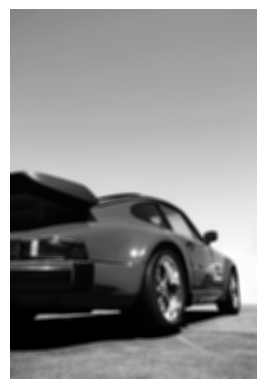

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


image1=np.array(img)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image = np.array(gray)


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh,kw =kernel.shape
    h =  img.shape[0] -kh + 1
    w =img.shape[1]- kw + 1

    out=np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch =img[i:i+kh,j:j+kw]
            out[i,j] = np.sum(patch*kernel)

    return out


def average_blur_gray(img,ksize):
    pad = ksize//2
    padded_image =np.pad(img, pad_width=pad, mode='reflect')

    kernel = np.ones((ksize,ksize),dtype=float) /(ksize*ksize)

    out = convolve(padded_image,kernel)
    return out



blurred = average_blur_gray(image, 8)
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()


FOR red channel

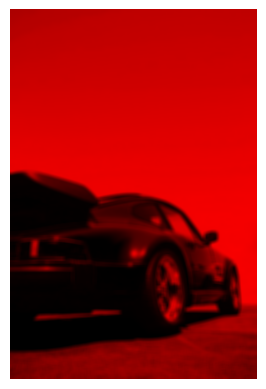

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)

red = image1[:, :, 2]

def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def average_blur_gray(img, ksize):
    pad = ksize // 2
    padded_image = np.pad(img, pad_width=pad, mode='reflect')

    kernel = np.ones((ksize, ksize), dtype=float) / (ksize * ksize)

    out = convolve(padded_image, kernel)
    return out


blurred_red = average_blur_gray(red, 8)

h, w = image1.shape[:2]
blurred_red = blurred_red[:h, :w]

red_tinted_blur = np.zeros_like(image1)
red_tinted_blur[:, :, 2] = blurred_red

plt.imshow(cv2.cvtColor(red_tinted_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


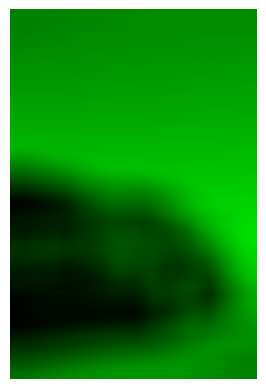

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)

green = image1[:, :, 1]

def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def average_blur_gray(img, ksize):
    pad = ksize // 2
    padded_image = np.pad(img, pad_width=pad, mode='reflect')

    kernel = np.ones((ksize, ksize), dtype=float) / (ksize * ksize)

    out = convolve(padded_image, kernel)
    return out


blurred_green = average_blur_gray(green, 90)

h, w = image1.shape[:2]
blurred_green = blurred_green[:h, :w]

red_tinted_blur = np.zeros_like(image1)
red_tinted_blur[:, :, 1] = blurred_green

plt.imshow(cv2.cvtColor(red_tinted_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


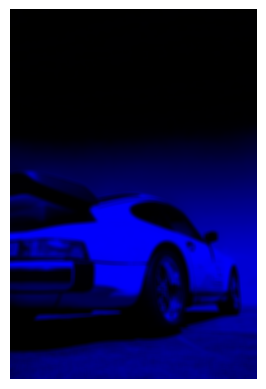

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)

blue = image1[:, :, 0]

def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def average_blur_gray(img, ksize):
    pad = ksize // 2
    padded_image = np.pad(img, pad_width=pad, mode='reflect')

    kernel = np.ones((ksize, ksize), dtype=float) / (ksize * ksize)

    out = convolve(padded_image, kernel)
    return out


blurred_blue = average_blur_gray(blue, 8)

h, w = image1.shape[:2]
blurred_blue = blurred_blue[:h, :w]

red_tinted_blur = np.zeros_like(image1)
red_tinted_blur[:, :, 0] = blurred_blue

plt.imshow(cv2.cvtColor(red_tinted_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Gaussian formula used without 1/2(pie)(sigma)

In [51]:
import numpy as np

def gaussian_kernel(ksize, sigma):
    assert ksize % 2 == 1, "ksize must be odd"

    half = ksize // 2
    x, y = np.meshgrid(
        np.arange(-half, half + 1),
        np.arange(-half, half + 1)
    )

    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()

    return kernel



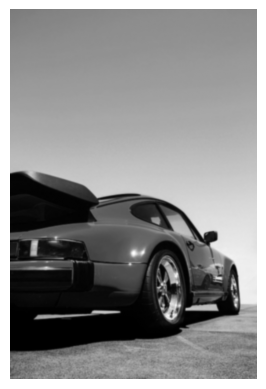

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image = np.array(gray)


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def gaussian_kernel(ksize, sigma):
    half = ksize // 2
    x, y = np.meshgrid(
        np.arange(-half, half + 1),
        np.arange(-half, half + 1)
    )

    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()
    return kernel


def gaussian_blur_gray(img, ksize, sigma):
    pad = ksize // 2
    padded_image = np.pad(img, pad_width=pad, mode='reflect')

    kernel = gaussian_kernel(ksize, sigma)

    out = convolve(padded_image, kernel)
    return out


blurred = gaussian_blur_gray(image, ksize=9, sigma=1.0)

plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()


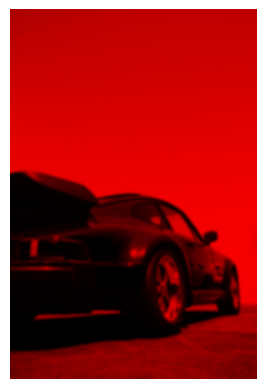

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)

red = image1[:, :, 2]


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def gaussian_kernel(ksize, sigma):
    half = ksize // 2
    x, y = np.meshgrid(
        np.arange(-half, half + 1),
        np.arange(-half, half + 1)
    )

    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel


def gaussian_blur_channel(channel, ksize, sigma):
    pad = ksize // 2
    padded = np.pad(channel, pad_width=pad, mode='reflect')

    kernel = gaussian_kernel(ksize, sigma)
    blurred = convolve(padded, kernel)

    return blurred


blurred_red = gaussian_blur_channel(red, ksize=10, sigma=2.0)

h, w = image1.shape[:2]
blurred_red = blurred_red[:h, :w]

red_tinted_blur = np.zeros_like(image1)
red_tinted_blur[:, :, 2] = blurred_red

plt.imshow(cv2.cvtColor(red_tinted_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [54]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

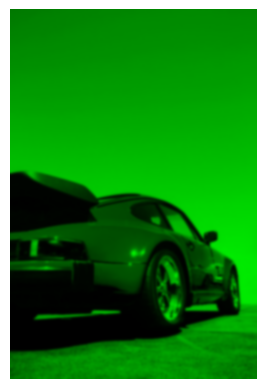

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)

green = image1[:, :, 1]


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def gaussian_kernel(ksize, sigma):
    half = ksize // 2
    x, y = np.meshgrid(
        np.arange(-half, half + 1),
        np.arange(-half, half + 1)
    )

    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel


def gaussian_blur_channel(channel, ksize, sigma):
    pad = ksize // 2
    padded = np.pad(channel, pad_width=pad, mode='reflect')

    kernel = gaussian_kernel(ksize, sigma)
    blurred = convolve(padded, kernel)

    return blurred


blurred_green = gaussian_blur_channel(green, ksize=20, sigma=2.0)

h, w = image1.shape[:2]
blurred_green = blurred_green[:h, :w]

green_blur = np.zeros_like(image1)
green_blur[:, :, 1] = blurred_green

plt.imshow(cv2.cvtColor(green_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


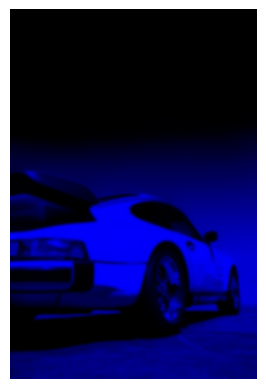

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)

blue = image1[:, :, 0]


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def gaussian_kernel(ksize, sigma):
    half = ksize // 2
    x, y = np.meshgrid(
        np.arange(-half, half + 1),
        np.arange(-half, half + 1)
    )

    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel


def gaussian_blur_channel(channel, ksize, sigma):
    pad = ksize // 2
    padded = np.pad(channel, pad_width=pad, mode='reflect')

    kernel = gaussian_kernel(ksize, sigma)
    blurred = convolve(padded, kernel)

    return blurred


blurred_blue = gaussian_blur_channel(blue, ksize=30, sigma=2.0)

h, w = image1.shape[:2]
blurred_blue = blurred_blue[:h, :w]

blue_blur = np.zeros_like(image1)
blue_blur[:, :, 0] = blurred_blue

plt.imshow(cv2.cvtColor(blue_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [57]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

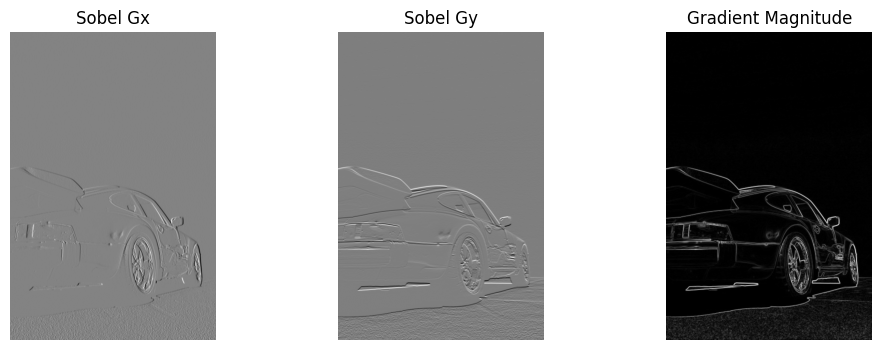

In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image1 = np.array(img)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image = gray.astype(float)


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
], dtype=float)

sobel_y = np.array([
    [-1,-2,-1],
    [ 0,0,0],
    [ 1,2,1]
], dtype=float)


padded = np.pad(image, pad_width=1, mode='reflect')

Gx = convolve(padded, sobel_x)
Gy = convolve(padded, sobel_y)


gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(Gx, cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(Gy, cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [59]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

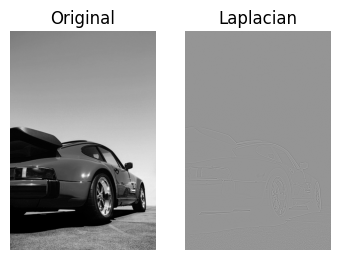

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image1 = np.array(img)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img_gray = gray.astype(float)


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


laplacian_kernel = np.array([
    [0,1,0],[1,-4,1],[0, 1,0]]
, dtype=float)


padded_img = np.pad(img_gray, pad_width=1, mode='reflect')

lap = convolve(padded_img, laplacian_kernel)

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(lap, cmap='gray')
plt.title("Laplacian")
plt.axis("off")



plt.show()


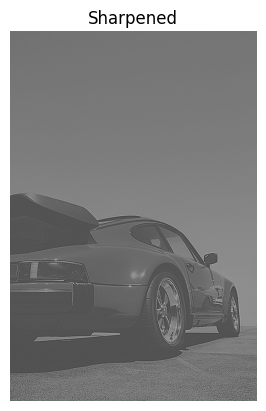

In [61]:

alpha = 0.7

sharp = img_gray - alpha * lap
plt.imshow(sharp, cmap='gray')
plt.title("Sharpened")
plt.axis("off")
plt.show()

(np.float64(-0.5), np.float64(426.5), np.float64(639.5), np.float64(-0.5))

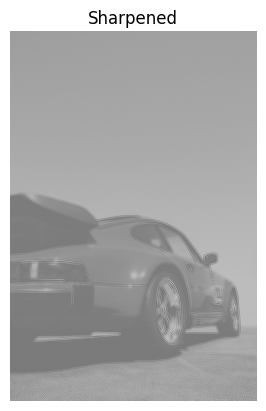

In [62]:
alpha=1
sharp=img_gray+alpha*lap
plt.imshow(sharp, cmap='gray')
plt.title("Sharpened")
plt.axis("off")

(np.float64(-0.5), np.float64(426.5), np.float64(639.5), np.float64(-0.5))

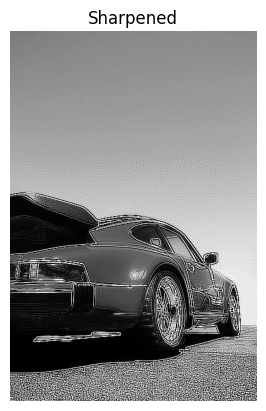

In [63]:
img_gray_u8 = gray.astype(np.uint8)
lap_cv = cv2.Laplacian(img_gray_u8, cv2.CV_32F, ksize=3)

sharp_cv = img_gray_u8.astype(np.float32) + lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)
plt.imshow(sharp_cv, cmap='gray')
plt.title("Sharpened")
plt.axis("off")

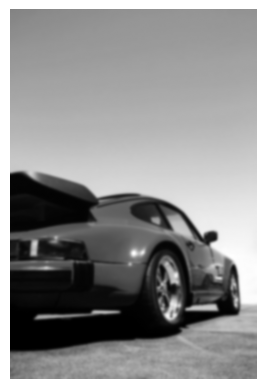

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image1 = np.array(img)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image = np.array(gray)


def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    h = img.shape[0] - kh + 1
    w = img.shape[1] - kw + 1

    out = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            patch = img[i:i+kh, j:j+kw]
            out[i, j] = np.sum(patch * kernel)

    return out


def gaussian_kernel(ksize, sigma):
    half = ksize // 2
    x, y = np.meshgrid(np.arange(-half, half + 1),np.arange(-half, half + 1))
    kernel = (1/2*3.14*sigma)*np.exp(-(x**2+y**2) /(2*sigma**2))
    kernel = kernel / kernel.sum()
    return kernel


def gaussian_blur_gray(img, ksize, sigma):
    pad = ksize // 2
    padded_image = np.pad(img, pad_width=pad, mode='reflect')
    kernel = gaussian_kernel(ksize, sigma)
    out = convolve(padded_image, kernel)
    return out
blurred = gaussian_blur_gray(image, ksize=19, sigma=2.0)
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()


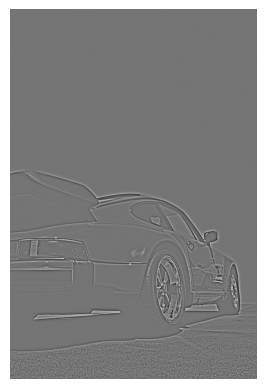

In [65]:
mask=image-blurred
plt.imshow(mask, cmap='gray')
plt.axis("off")
plt.show()

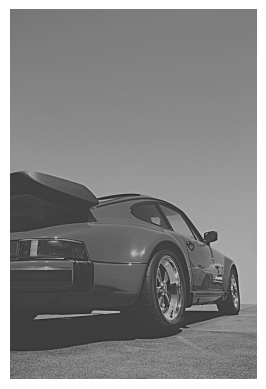

In [66]:
sharp=image+alpha*mask
plt.imshow(sharp, cmap='gray')
plt.axis("off")
plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [67]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

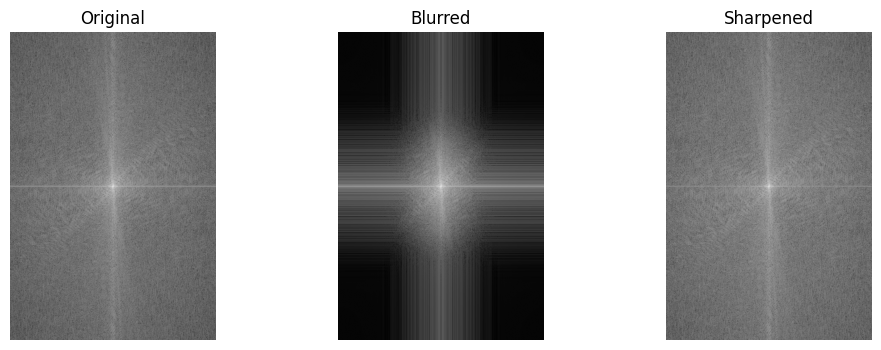

In [68]:
def magnitude_spectrum(img):
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude = 20*np.log(1 + np.abs(fft_shift))
    return magnitude
out1=magnitude_spectrum(gray)
out2=magnitude_spectrum(blurred)
out3=magnitude_spectrum(sharp)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(out1, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(out2, cmap='gray')
plt.title("Blurred")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(out3, cmap='gray')
plt.title("Sharpened")
plt.axis("off")

plt.show()

for blurred image
center becomes brighter and more concentrated
edges become darker
Increasing sigma act  stronger suppression of high frequencies
This confirms gaussian blur acts as a low pass filter
for unsharp masking outer regions become brighter as alpha increases



### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

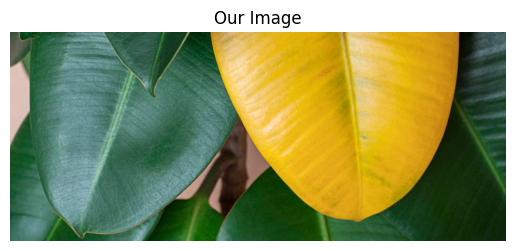

In [69]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [79]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image=np.array(img_part5)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)

R = img[:, :, 0]
G = img[:, :, 1]
RG_diff = R - G
kernel =  np.array([[-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]])
def convolve(img, kernel):
    kernel = kernel[::-1, ::-1]
    kh, kw = kernel.shape
    pad = kw // 2
    padded = np.pad(img, ((0,0),(pad,pad)), mode='reflect')
    out = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            patch = padded[i, j:j+kw]
            out[i, j] = np.sum(patch * kernel)
    return out

edges = np.abs(convolve(RG_diff, kernel))
yellow_edges = np.zeros_like(edges, dtype=np.uint8)
yellow_edges[edges > 35] = 255

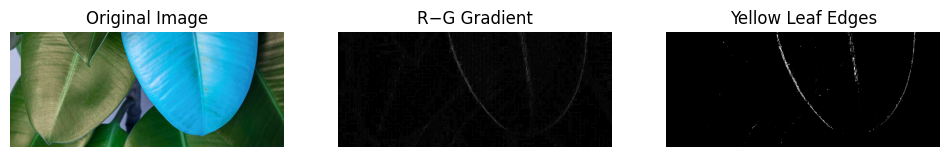

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img.astype(np.uint8))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title("R−G Gradient")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(yellow_edges, cmap='gray')
plt.title("Yellow Leaf Edges")
plt.axis("off")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
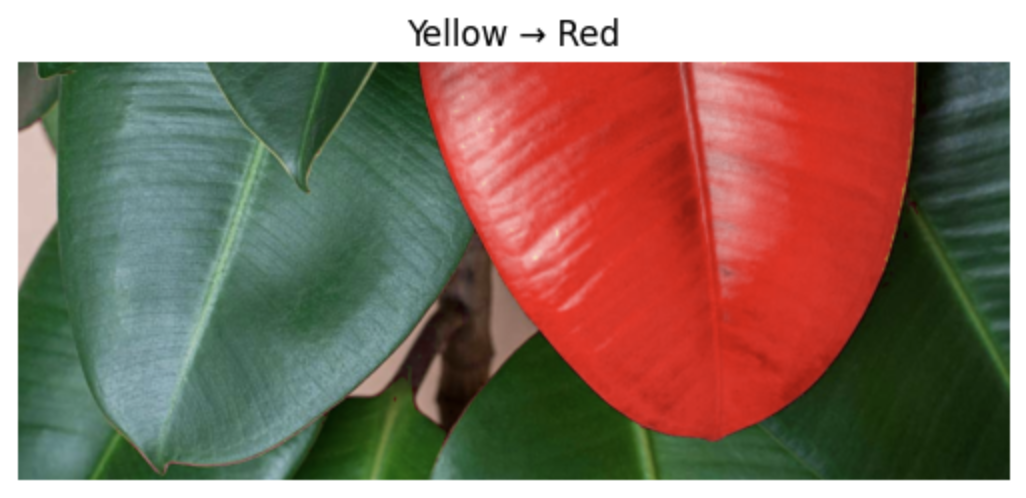

Also, we can change to a less brighter colour
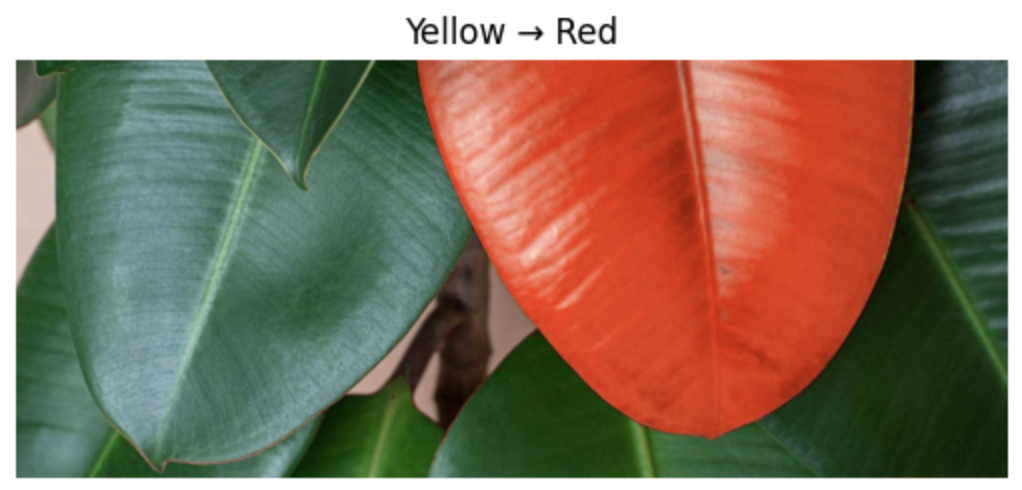

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.